In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import matplotlib.style as style
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Display all the rows and columns when displaying the output
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
#store application_data.csv data in dataframe named df_current
df_current=pd.read_csv(r"C:\path\application_data.csv")
#store previous_application.csv data in dataframe named df_prev
df_prev=pd.read_csv(r"C:\path\previous_application.csv")


# 1) Data Understanding

In [2]:
#metadata of df_current
print(df_current.shape)
df_current.describe()

(307511, 122)


SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count   49999.000000  49999.000000  49999.000000      4.999900e+04   
mean   129013.210584      0.080522      0.419848      1.707676e+05   
std     16690.512048      0.272102      0.724039      5.318191e+05   
min    100002.000000      0.000000      0.000000      2.565000e+04   
25%    114570.500000      0.000000      0.000000      1.125000e+05   
50%    129076.000000      0.000000      0.000000      1.458000e+05   
75%    143438.500000      0.000000      1.000000      2.025000e+05   
max    157875.000000      1.000000     11.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  4.999900e+04   49998.000000     4.996100e+04   
mean   5.997006e+05   27107.377355     5.390600e+05   
std    4.024154e+05   14562.944435     3.698533e+05   
min    4.500000e+04    2052.000000     4.500000e+04   
25%    2.700000e+05   16456.500000     2.385000e+05   
50%    5.147775e+05   24939.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                49999.000000  49999.000000   49999.000000   
mean                     0.020798 -16022.042081   63219.424488   
std                      0.013761   4361.400270  140794.605668   
min                      0.000533 -25184.000000  -17531.000000   
25%                      0.010006 -19644.000000   -2786.000000   
50%                      0.018850 -15731.000000   -1221.000000   
75%                      0.028663 -12378.500000    -292.000000   
max                      0.072508  -7680.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count       49999.000000     49999.000000  274027.000000  256490.000000   
mean        -4977.282666     -2996.797176       1.230693       0.606041   
std          3525.548305      1509.235410       4.069039       0.261062   
min        -22392.000000     -6232.000000       0.000000       0.000000   
25%         -7463.500000     -4297.000000       0.408173       0.415347   
50%         -4490.000000     -3261.000000       0.580628       0.600658   
75%         -1998.000000     -1722.000000       0.681488       0.771362   
max             0.000000         0.000000      65.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   176835.000000    156767.000000     181898.000000  136262.000000   
mean         0.316456         0.123721          0.983257       0.578374   
std          0.387817         0.241217          0.056782       0.366232   
min          0.000000         0.000000          0.000000       0.000000   
25%          0.061900         0.000000          0.978600       0.000000   
50%          0.111300         0.059600          0.985600       0.721200   
75%          0.405200         0.107600          1.000000       0.823200   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  127606.000000    177877.000000         179366.000000   
mean        0.048926         0.714365              0.735228   
std         0.155199         1.027872              0.869934   
min         0.000000         0.000000              0.000000   
25%         0.000000         0.103400              0.166700   
50%         0.006600         0.172400              0.333300   
75%         0.033300         1.000000              1.000000   
max         1.000000        13.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                132763.000000            131538.000000   
mean                      0.909368                 4.643817   
std                       0.933197                 6.138776   
min                       0.000000                 0.000000   
25%                       0.208300                 0.

In [3]:
print("307511-49999 = ",307511-49999)
print("max(SK_ID_CURR) - min(SK_ID_CURR) = ",max(df_current['SK_ID_CURR'])-min(df_current['SK_ID_CURR']))
print("Last row of df_current = ",df_current.iloc[-1])

307511-49999 =  257512
max(SK_ID_CURR) - min(SK_ID_CURR) =  57873.0
Last row of df_current =  SK_ID_CURR                                 NaN
TARGET                                     NaN
NAME_CONTRACT_TYPE                         NaN
CODE_GENDER                                NaN
FLAG_OWN_CAR                               NaN
FLAG_OWN_REALTY                            NaN
CNT_CHILDREN                               NaN
AMT_INCOME_TOTAL                           NaN
AMT_CREDIT                                 NaN
AMT_ANNUITY                                NaN
AMT_GOODS_PRICE                            NaN
NAME_TYPE_SUITE                            NaN
NAME_INCOME_TYPE                           NaN
NAME_EDUCATION_TYPE                        NaN
NAME_FAMILY_STATUS                         NaN
NAME_HOUSING_TYPE                          NaN
REGION_POPULATION_RELATIVE                 NaN
DAYS_BIRTH                                 NaN
DAYS_EMPLOYED                              NaN
DAYS_REGISTRA

#based on above results, it is seen that for 257512 rows client ID column is null

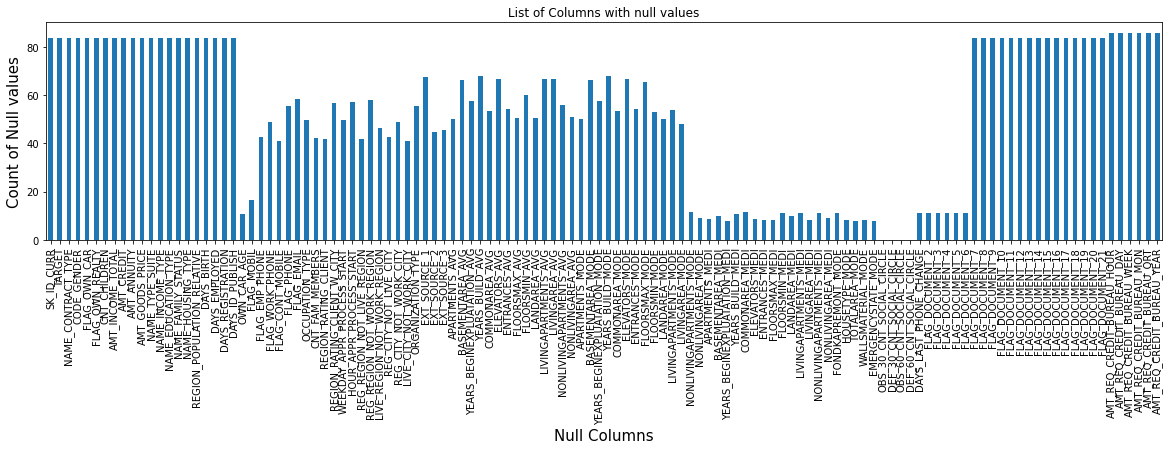

Null Value percentage of columns
122


In [4]:
#plot columns with null values
cols=round((df_current.isnull().sum()/len(df_current.index))*100,2)
null_cols=cols[cols>0]
plt.figure(figsize=(20,4))
null_cols.plot(kind="bar")                           
plt.title("List of Columns with null values") 
plt.xlabel("Null Columns",fontdict={"fontsize":15,"fontweight":5})                  
plt.ylabel("Count of Null values",fontdict={"fontsize":15,"fontweight":5})
plt.show()
print("Null Value percentage of columns")
print(len(null_cols))

#from the above graph, it is seen all the columns have null values, columns like ID, TARGET, other columns related to client information have more than 80% null values, we can delete or impute these columns, so we will delete the rows where CLient ID is null for this analysis

In [5]:
#drop rows where ID Column is null
df_current = df_current.dropna(axis=0, subset=['SK_ID_CURR'])
print(df_current.shape)

(49999, 122)


In [6]:
df_current.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0    100002.0     1.0         Cash loans           M            N   
1    100003.0     0.0         Cash loans           F            N   
2    100004.0     0.0    Revolving loans           M            Y   
3    100006.0     0.0         Cash loans           F            N   
4    100007.0     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y           0.0          202500.0    406597.5      24700.5   
1               N           0.0          270000.0   1293502.5      35698.5   
2               Y           0.0           67500.0    135000.0       6750.0   
3               Y           0.0          135000.0    312682.5      29686.5   
4               Y           0.0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801     -9461.0         -637.0            -3648.0   
1                    0.003541    -16765.0        -1188.0            -1186.0   
2                    0.010032    -19046.0         -225.0            -4260.0   
3                    0.008019    -19005.0        -3039.0            -9833.0   
4                    0.028663    -19932.0        -3038.0            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0          -2120.0          NaN         1.0             1.0              0.0   
1           -291.0          NaN         1.0             1.0              0.0   
2          -2531.0         26.0         1.0             1.0              1.0   
3          -2437.0          NaN         1.0             1.0              0.0   
4          -3458.0          NaN         1.0             1.0              0.0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0               1.0         1.0         0.0        Laborers              1.0   
1               1.0         1.0         0.0      Core staff              2.0   
2               1.0         1.0         0.0        Laborers              1.0   
3               1.0         0.0         0.0        Laborers              2.0   
4               1.0         0.0         0.0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                   2.0                          2.0   
1                   1.0                          1.0   
2                   2.0                          2.0   
3                   2.0                          2.0   
4                   2.0                          2.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                     10.0   
1                     MONDAY                     11.0   
2                     MONDAY                      9.0   
3                  WEDNESDAY                     17.0   
4                   THURSDAY                     11.0   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                        

In [7]:
df_current.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49998
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    float64
 1    TARGET                        float64
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  float64
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    float64
 18   DAYS

# 2 a) Identify the missing data from current application file and use appropriate method to deal with it.

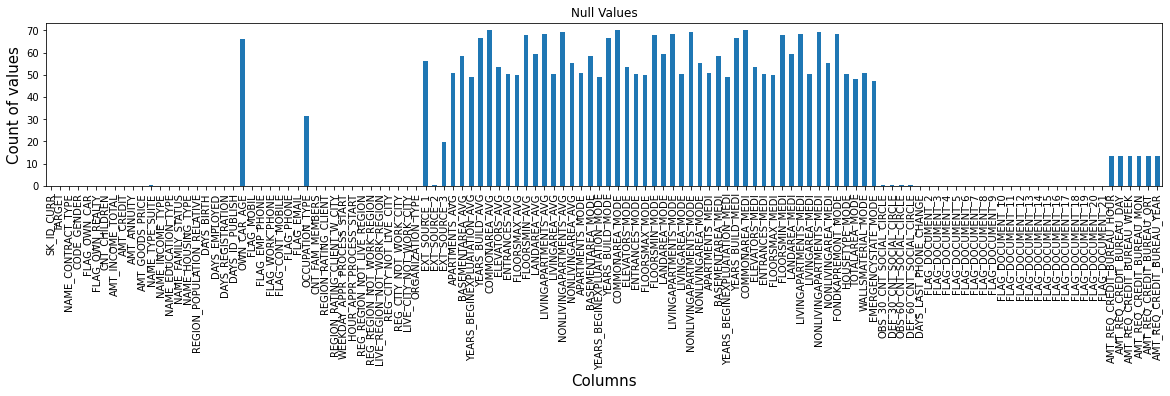

122


In [8]:
#plot columns to check null values
cols=round((df_current.isnull().sum()/len(df_current.index))*100,2)
null_cols=cols
plt.figure(figsize=(20,3))
null_cols.plot(kind="bar")                           
plt.title("Null Values") 
plt.xlabel("Columns",fontdict={"fontsize":15,"fontweight":5})                  
plt.ylabel("Count of values",fontdict={"fontsize":15,"fontweight":5})
plt.show()
print(len(null_cols))

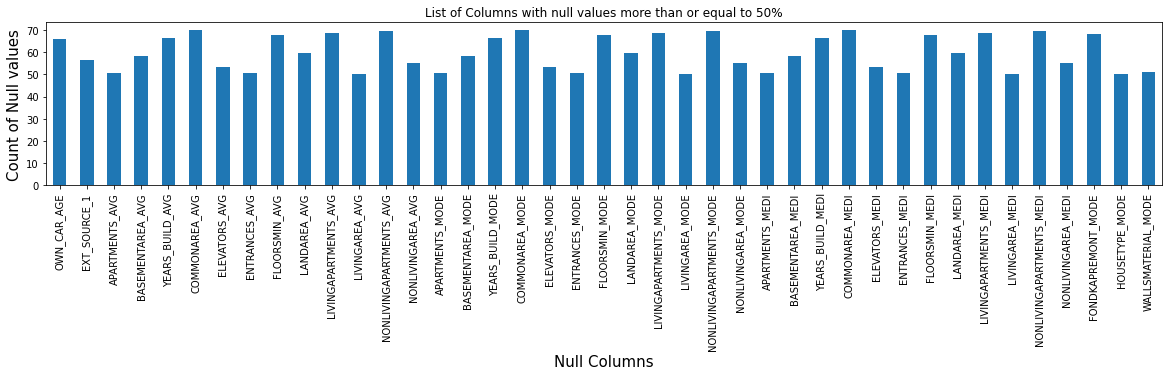

50% and more null Value percentage of columns
41


In [9]:
#plot columns with more than 50% null values
cols=round((df_current.isnull().sum()/len(df_current.index))*100,2)
null_cols=cols[cols>=50]
plt.figure(figsize=(20,3))
null_cols.plot(kind="bar")                           
plt.title("List of Columns with null values more than or equal to 50%") 
plt.xlabel("Null Columns",fontdict={"fontsize":15,"fontweight":5})                  
plt.ylabel("Count of Null values",fontdict={"fontsize":15,"fontweight":5})
plt.show()
print("50% and more null Value percentage of columns")
print(len(null_cols))

In [10]:
#drop columns with more than 50% null values
null_cols=round((df_current.isnull().sum()/len(df_current.index))*100,2)
df_current.drop(labels =(null_cols[null_cols>=50].index), axis=1, inplace=True)
df_current.shape
df_current.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49998
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    49999 non-null  float64
 1   TARGET                        49999 non-null  float64
 2   NAME_CONTRACT_TYPE            49999 non-null  object 
 3   CODE_GENDER                   49999 non-null  object 
 4   FLAG_OWN_CAR                  49999 non-null  object 
 5   FLAG_OWN_REALTY               49999 non-null  object 
 6   CNT_CHILDREN                  49999 non-null  float64
 7   AMT_INCOME_TOTAL              49999 non-null  float64
 8   AMT_CREDIT                    49999 non-null  float64
 9   AMT_ANNUITY                   49998 non-null  float64
 10  AMT_GOODS_PRICE               49961 non-null  float64
 11  NAME_TYPE_SUITE               49807 non-null  object 
 12  NAME_INCOME_TYPE              49999 non-null  object 
 13  N

In [11]:
#correct the datatypes
df_current=df_current.convert_dtypes()
df_current.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637              -3648   
1                    0.003541      -16765          -1188              -1186   
2                    0.010032      -19046           -225              -4260   
3                    0.008019      -19005          -3039              -9833   
4                    0.028663      -19932          -3038              -4311   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers                1   
1                 1           1           0      Core staff                2   
2                 1           1           0        Laborers                1   
3                 1           0           0        Laborers                2   
4                 1           0           0      Core staff                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [12]:
df_current.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49998
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    49999 non-null  Int64  
 1   TARGET                        49999 non-null  Int64  
 2   NAME_CONTRACT_TYPE            49999 non-null  string 
 3   CODE_GENDER                   49999 non-null  string 
 4   FLAG_OWN_CAR                  49999 non-null  string 
 5   FLAG_OWN_REALTY               49999 non-null  string 
 6   CNT_CHILDREN                  49999 non-null  Int64  
 7   AMT_INCOME_TOTAL              49999 non-null  Float64
 8   AMT_CREDIT                    49999 non-null  Float64
 9   AMT_ANNUITY                   49998 non-null  Float64
 10  AMT_GOODS_PRICE               49961 non-null  Float64
 11  NAME_TYPE_SUITE               49807 non-null  string 
 12  NAME_INCOME_TYPE              49999 non-null  string 
 13  N

In [13]:
#storing columns relevant for analysis based on the column_description.csv in seperate dataframe
relevant=['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',
          'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
          'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','OCCUPATION_TYPE','CNT_FAM_MEMBERS',
          'ORGANIZATION_TYPE'
]

df_app=df_current[relevant]
df_app.head()
print(len(relevant))
print(len(df_current.columns))

20
81


In [14]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS       ORGANIZATION_TYPE  
0        Laborers                1  Business Entity Type 3  
1      Core staff                2                  School  
2        Laborers                1              Government  
3        Laborers                2  Business Entity Type 3  
4      Core staff                1                Religion

In [15]:
#find the count percentage values in column having more than 0 null values
null_cols=(df_app.isnull().sum()/len(df_app.index))*100
null_cols[null_cols>0.0]

AMT_ANNUITY         0.002000
AMT_GOODS_PRICE     0.076002
OCCUPATION_TYPE    31.308626
CNT_FAM_MEMBERS     0.002000
dtype: float64

In [16]:
numcol=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']

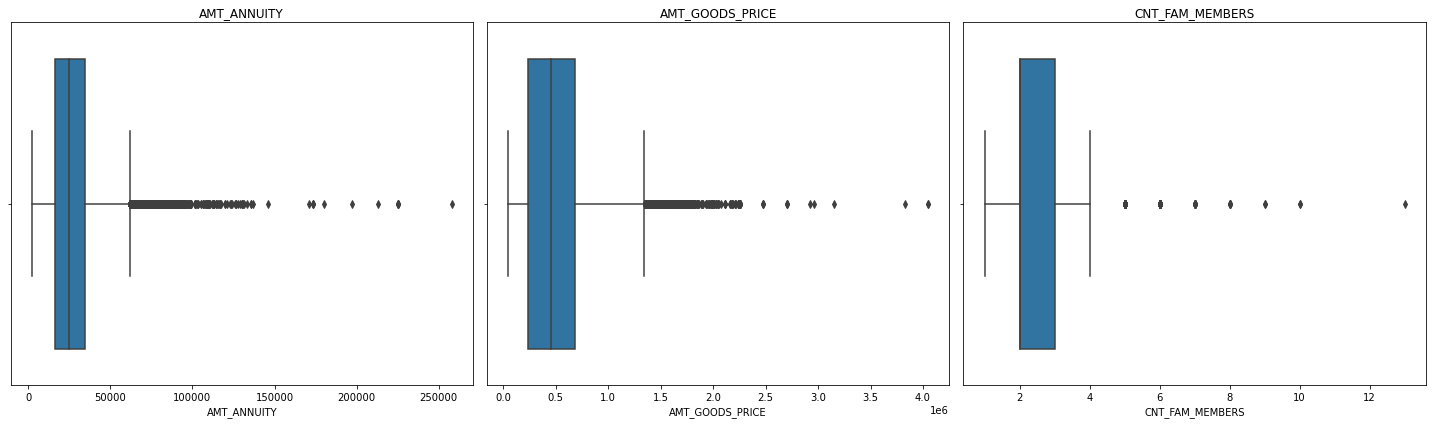

In [17]:
#plot boxplots to detect outliers
plt.figure(figsize=(20,6))

for i in enumerate(numcol):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x=df_app[i[1]])
    plt.title(i[1]) 
    plt.tight_layout()

In [18]:
#Imputing with median, as the columns have huge outliers
#calculating the median of numerical columns with null values
Amt_Annuity_median = round(df_app['AMT_ANNUITY'].median(),2)
AMT_GOODS_PRICE = round(df_app['AMT_GOODS_PRICE'].median(),2)
CNT_FAM_MEMBERS = round(df_app['CNT_FAM_MEMBERS'].median(),2)

#imputing the null values with median 
df_app['AMT_ANNUITY'].fillna(Amt_Annuity_median, inplace=True)
df_app['AMT_GOODS_PRICE'].fillna(AMT_GOODS_PRICE, inplace=True)
df_app['CNT_FAM_MEMBERS'].fillna(CNT_FAM_MEMBERS, inplace=True)

In [19]:
df_app['OCCUPATION_TYPE']=df_app['OCCUPATION_TYPE'].fillna('UNKNOWN')

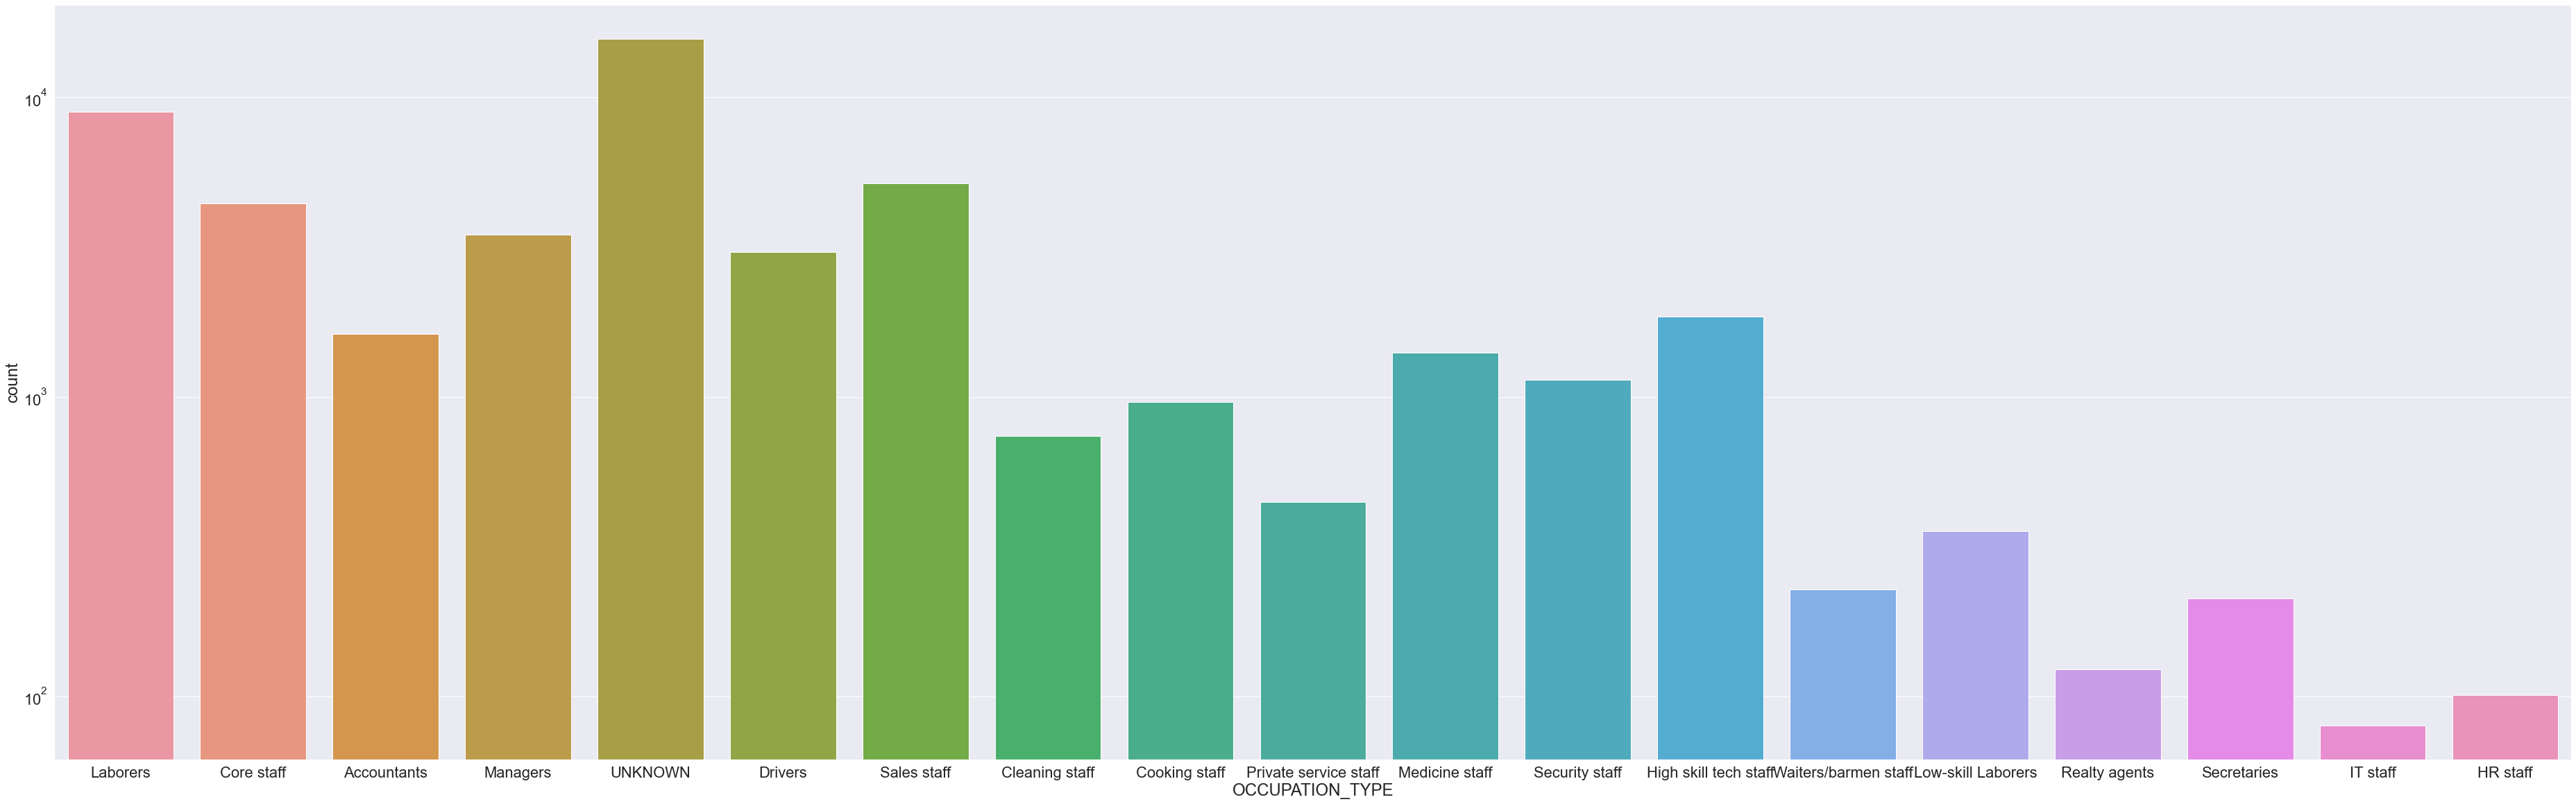

In [20]:
plt.figure(figsize=(65,20))
sns.set(font_scale=2)
sns.countplot(data=df_app,x='OCCUPATION_TYPE')
plt.yscale("log")
plt.show()

In [21]:
#comparing occupation type with organization type and income type to find correlation if any:
df_app[['ORGANIZATION_TYPE','NAME_INCOME_TYPE','OCCUPATION_TYPE']].head(40)

ORGANIZATION_TYPE      NAME_INCOME_TYPE        OCCUPATION_TYPE
0   Business Entity Type 3               Working               Laborers
1                   School         State servant             Core staff
2               Government               Working               Laborers
3   Business Entity Type 3               Working               Laborers
4                 Religion               Working             Core staff
5                    Other         State servant               Laborers
6   Business Entity Type 3  Commercial associate            Accountants
7                    Other         State servant               Managers
8                      XNA             Pensioner                UNKNOWN
9              Electricity               Working               Laborers
10                Medicine               Working             Core staff
11                     XNA             Pensioner                UNKNOWN
12  Business Entity Type 2               Working               Laborers
13           Self-employed               Working                Drivers
14       Transport: type 2               Working               Laborers
15  Business Entity Type 2               Working               Laborers
16              Government               Working                Drivers
17            Construction               Working               Laborers
18                 Housing               Working               Laborers
19            Kindergarten         State servant             Core staff
20           Self-employed               Working               Laborers
21           Trade: type 7  Commercial associate            Sales staff
22           Self-employed               Working            Sales staff
23                     XNA             Pensioner                UNKNOWN
24  Business Entity Type 3               Working                Drivers
25  Business Entity Type 3               Working         Cleaning staff
26  Business Entity Type 3               Working          Cooking staff
27       Industry: type 11               Working               Laborers
28                Military         State servant                UNKNOWN
29  Business Entity Type 3               Working               Laborers
30  Business Entity Type 3  Commercial associate                UNKNOWN
31                Services               Working  Private service staff
32  Business Entity Type 2               Working               Laborers
33           Self-employed  Commercial associate                Drivers
34     Security Ministries         State servant             Core staff
35           Self-employed               Working            Sales staff
36                   Other  Commercial associate  Private service staff
37       Transport: type 4               Working                Drivers
38                     XNA             Pensioner                UNKNOWN
39  Business Entity Type 3               Working               Managers

# The above table states for most unknown values in occupation type, income type is pensioner and organization type is xna, to analyse this further, we extract this table in csv file

In [22]:
#export to csv
#df_app[['ORGANIZATION_TYPE','NAME_INCOME_TYPE','OCCUPATION_TYPE']].to_csv(r"C:\path\occupationtype.csv")

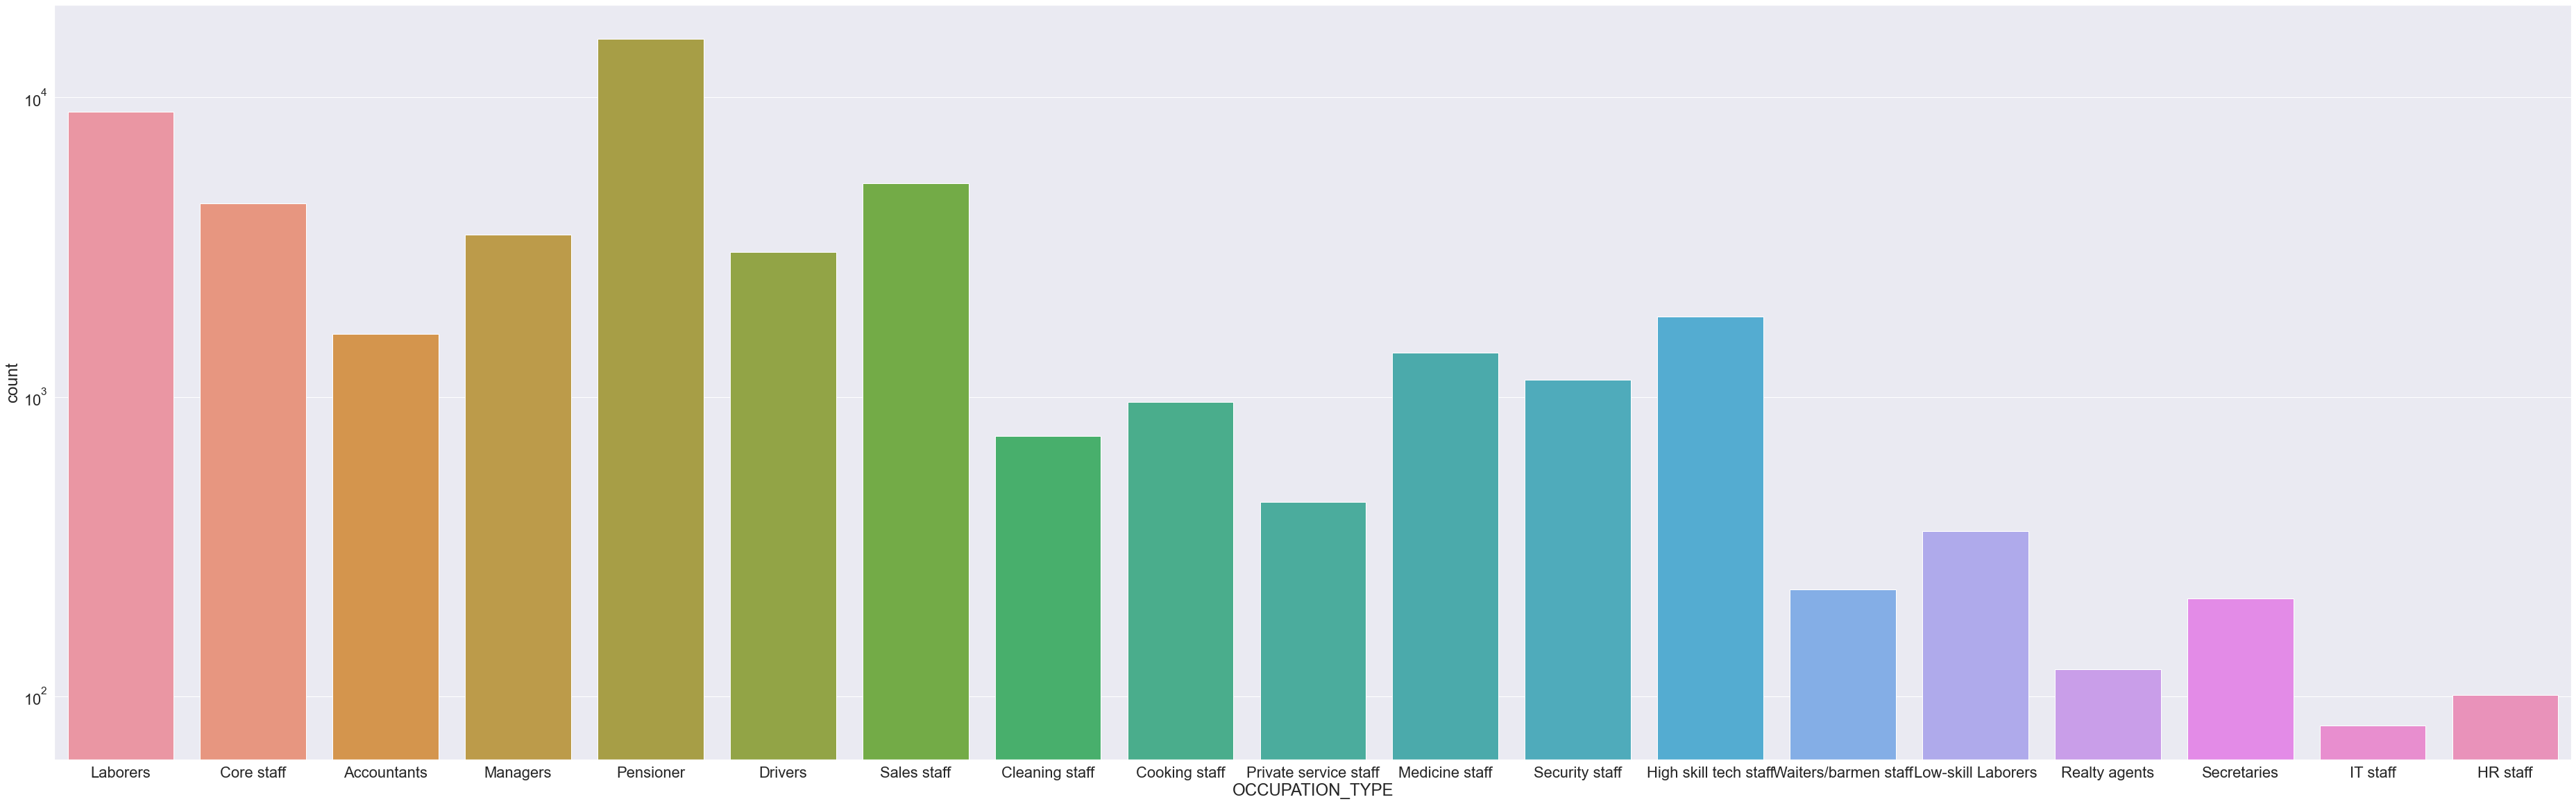

In [23]:
#based on the output from csv file, we can substitute null values in occupation type with pensioner
df_app['OCCUPATION_TYPE']=df_app['OCCUPATION_TYPE'].replace('UNKNOWN','Pensioner')
plt.figure(figsize=(65,20))
sns.set(font_scale=2)
sns.countplot(data=df_app,x='OCCUPATION_TYPE')
plt.yscale("log")
plt.show()

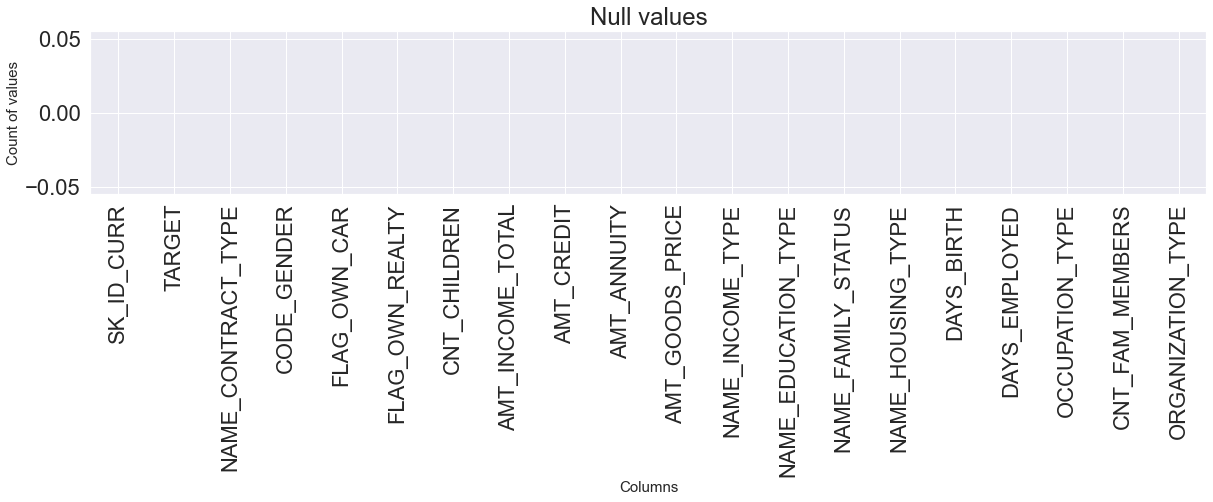

In [24]:
#plot columns to check null values
cols=round((df_app.isnull().sum()/len(df_app.index))*100,2)
null_cols=cols
plt.figure(figsize=(20,3))
null_cols.plot(kind="bar")                           
plt.title("Null values") 
plt.xlabel("Columns",fontdict={"fontsize":15,"fontweight":5})                  
plt.ylabel("Count of values",fontdict={"fontsize":15,"fontweight":5})
plt.show()

In [25]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS       ORGANIZATION_TYPE  
0        Laborers                1  Business Entity Type 3  
1      Core staff                2                  School  
2        Laborers                1              Government  
3        Laborers                2  Business Entity Type 3  
4      Core staff                1                Religion

In [26]:
print("Negative values in DAYS_BIRTH column: ",len(df_app[df_app['DAYS_BIRTH']<0]))
print("Positive values in DAYS_BIRTH column: ",len(df_app[df_app['DAYS_BIRTH']>0]))
print("Negative values in DAYS_EMPLOYED column: ",len(df_app[df_app['DAYS_EMPLOYED']<0]))
print("Positive values in DAYS_EMPLOYED column: ",len(df_app[df_app['DAYS_EMPLOYED']>0]))

Negative values in DAYS_BIRTH column:  49999
Positive values in DAYS_BIRTH column:  0
Negative values in DAYS_EMPLOYED column:  41074
Positive values in DAYS_EMPLOYED column:  8924


In [27]:
#convert negative values to positive as days count can't be negative
df_app['DAYS_BIRTH']=abs(df_app['DAYS_BIRTH'])
df_app['DAYS_EMPLOYED']=abs(df_app['DAYS_EMPLOYED'])

In [28]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment        9461            637   
1               Married  House / apartment       16765           1188   
2  Single / not married  House / apartment       19046            225   
3        Civil marriage  House / apartment       19005           3039   
4  Single / not married  House / apartment       19932           3038   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS       ORGANIZATION_TYPE  
0        Laborers                1  Business Entity Type 3  
1      Core staff                2                  School  
2        Laborers                1              Government  
3        Laborers                2  Business Entity Type 3  
4      Core staff                1                Religion

# 2 b)Identify the missing data from previous application file and use appropriate method to deal with it.

In [29]:
#metadata of df_prev
print(df_prev.shape)
df_prev.describe()

(49999, 37)


SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  4.999900e+04   49999.000000   39407.000000     4.999900e+04   
mean   1.922254e+06  278983.187604   15482.596847     1.688925e+05   
std    5.351980e+05  102780.124434   14530.971854     2.822035e+05   
min    1.000001e+06  100007.000000       0.000000     0.000000e+00   
25%    1.457920e+06  189919.500000    6122.835000     2.204550e+04   
50%    1.920889e+06  279264.000000   10879.920000     7.155000e+04   
75%    2.388632e+06  368527.500000   19669.140000     1.800000e+05   
max    2.845367e+06  456254.000000  234478.395000     3.826372e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  4.999900e+04      2.480100e+04     3.925500e+04   
mean   1.885429e+05      6.557571e+03     2.151414e+05   
std    3.084736e+05      1.744458e+04     3.024993e+05   
min    0.000000e+00      0.000000e+00     0.000000e+00   
25%    2.605500e+04      0.000000e+00     4.941000e+04   
50%    7.890750e+04      1.566000e+03     1.040175e+05   
75%    1.981058e+05      7.875000e+03     2.250000e+05   
max    4.104351e+06      1.035000e+06     3.826372e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             49999.000000            49999.000000       24801.000000   
mean                 12.478330                0.996500           0.079083   
std                   3.333012                0.059058           0.107658   
min                   0.000000                0.000000           0.000000   
25%                  10.000000                1.000000           0.000000   
50%                  12.000000                1.000000           0.049732   
75%                  15.000000                1.000000           0.108909   
max                  23.000000                1.000000           0.944776   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count             165.000000                165.000000   49999.000000   
mean                0.194799                  0.787674    -900.112622   
std                 0.088866                  0.091985     786.531303   
min                 0.059135                  0.424419   -2922.000000   
25%                 0.160716                  0.715645   -1335.000000   
50%                 0.189136                  0.835095    -599.000000   
75%                 0.193330                  0.852537    -292.000000   
max                 0.696178                  0.867336      -2.000000   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      4.999900e+04  39407.000000        30839.000000    30839.000000   
mean       4.016558e+02     15.555891       344485.142806    14217.240150   
std        1.793772e+04     13.985174        84683.650627    73348.984383   
min       -1.000000e+00      0.000000        -2910.000000    -2891.000000   
25%       -1.000000e+00      6.000000       365243.000000    -1642.000000   
50%        1.000000e+01     12.000000       365243.000000     -822.000000   
75%        1.000000e+02     18.000000       365243.000000     -404.000000   
max        4.000000e+06     60.000000       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count               30839.000000   30839.000000      30839.000000   
mean                31528.148611   76724.982101      81666.162586   
std                103691.881189  149757.893751     153101.159809   
min                 -2800.000000   -2850.000000      -2844.000000   
25%                 -1270.000000   -1337.000000      -1293.000000   
50%                  -366.000000    -536.000000       -500.000000   
75%                   113.000000     -71.000000        -45.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count               30839.000000  
mean                    0.322352  
std                     0.467384  
min                     0.000000  
25%         

In [30]:
print("max(SK_ID_CURR) - min(SK_ID_CURR) = ",max(df_prev['SK_ID_CURR'])-min(df_prev['SK_ID_CURR']))
print("Last row of df_current = ",df_prev.iloc[-1])

max(SK_ID_CURR) - min(SK_ID_CURR) =  356247
Last row of df_current =  SK_ID_PREV                                     1979352
SK_ID_CURR                                      363244
NAME_CONTRACT_TYPE                          Cash loans
AMT_ANNUITY                                   24909.39
AMT_APPLICATION                               360000.0
AMT_CREDIT                                    409896.0
AMT_DOWN_PAYMENT                                   NaN
AMT_GOODS_PRICE                               360000.0
WEEKDAY_APPR_PROCESS_START                      FRIDAY
HOUR_APPR_PROCESS_START                             18
FLAG_LAST_APPL_PER_CONTRACT                          Y
NFLAG_LAST_APPL_IN_DAY                               1
RATE_DOWN_PAYMENT                                  NaN
RATE_INTEREST_PRIMARY                              NaN
RATE_INTEREST_PRIVILEGED                           NaN
NAME_CASH_LOAN_PURPOSE                             XNA
NAME_CONTRACT_STATUS                           Ref

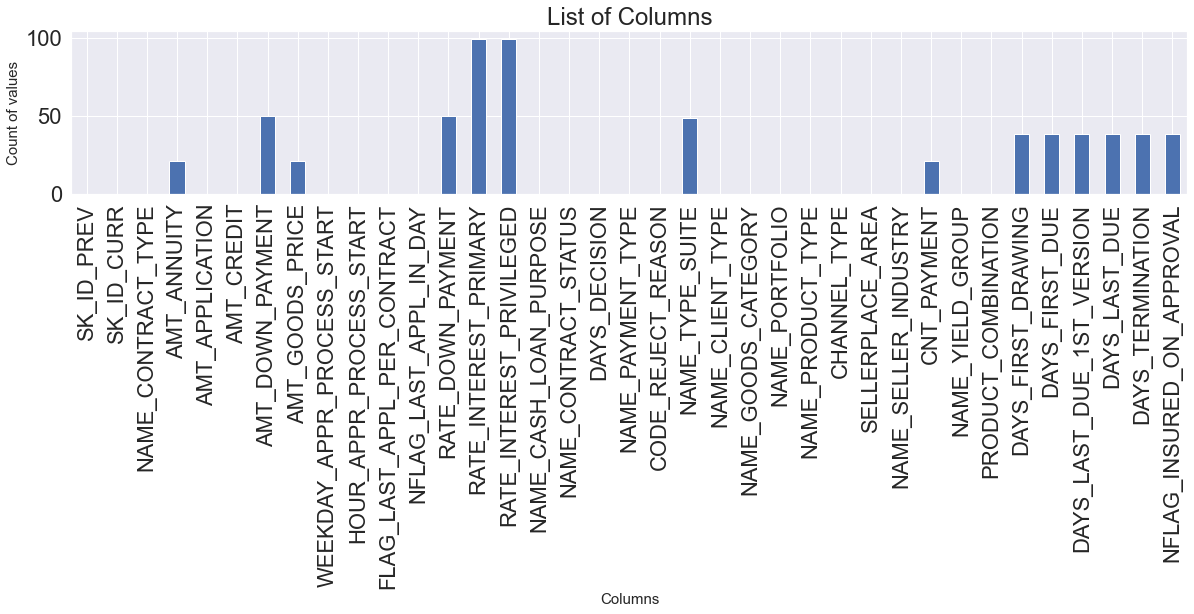

37


In [31]:
#plot columns to check null values
cols=round((df_prev.isnull().sum()/len(df_prev.index))*100,2)
null_cols=cols
plt.figure(figsize=(20,3))
null_cols.plot(kind="bar")                           
plt.title("List of Columns") 
plt.xlabel("Columns",fontdict={"fontsize":15,"fontweight":5})                  
plt.ylabel("Count of values",fontdict={"fontsize":15,"fontweight":5})
plt.show()
print(len(null_cols))

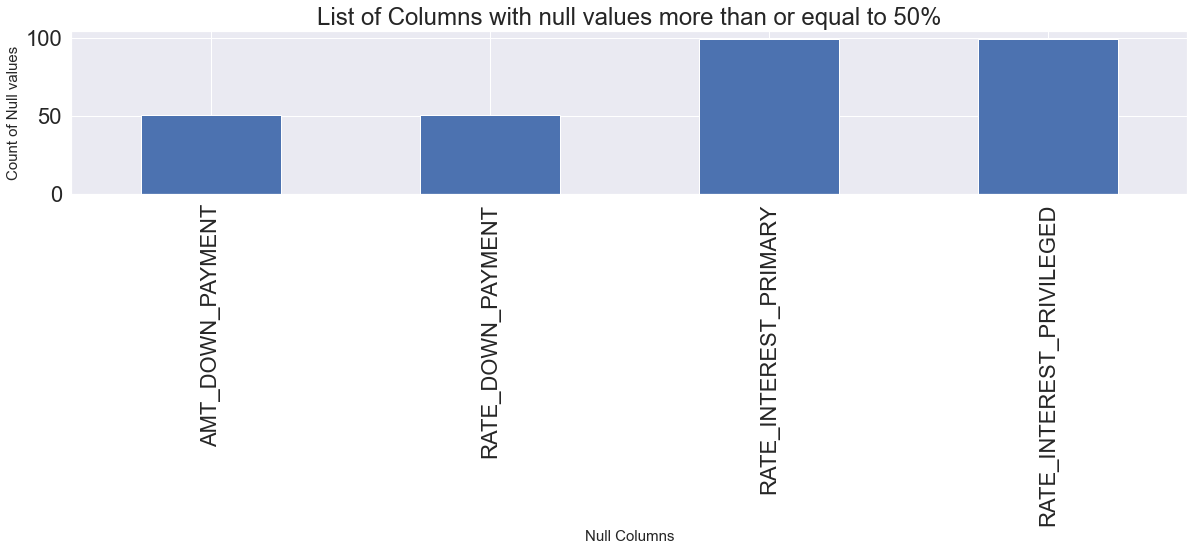

50% and more null Value percentage of columns
4


In [32]:
#plot columns with more than 50% null values
cols=round((df_prev.isnull().sum()/len(df_prev.index))*100,2)
null_cols=cols[cols>=50]
plt.figure(figsize=(20,3))
null_cols.plot(kind="bar")                           
plt.title("List of Columns with null values more than or equal to 50%") 
plt.xlabel("Null Columns",fontdict={"fontsize":15,"fontweight":5})                  
plt.ylabel("Count of Null values",fontdict={"fontsize":15,"fontweight":5})
plt.show()
print("50% and more null Value percentage of columns")
print(len(null_cols))

In [33]:
#drop columns with more than 50% null values
null_cols=round((df_prev.isnull().sum()/len(df_prev.index))*100,2)
df_prev.drop(labels =(null_cols[null_cols>=50].index), axis=1, inplace=True)
df_prev.shape
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   49999 non-null  int64  
 1   SK_ID_CURR                   49999 non-null  int64  
 2   NAME_CONTRACT_TYPE           49999 non-null  object 
 3   AMT_ANNUITY                  39407 non-null  float64
 4   AMT_APPLICATION              49999 non-null  float64
 5   AMT_CREDIT                   49999 non-null  float64
 6   AMT_GOODS_PRICE              39255 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   49999 non-null  object 
 8   HOUR_APPR_PROCESS_START      49999 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  49999 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       49999 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       49999 non-null  object 
 12  NAME_CONTRACT_STATUS         49999 non-null  object 
 13  DAYS_DECISION   

In [34]:
#storing columns relevant for analysis based on the column_description.csv in seperate dataframe
prerel=['SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
          'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE',
          'NAME_GOODS_CATEGORY','CHANNEL_TYPE','CNT_PAYMENT','NAME_YIELD_GROUP'

]

df_pre=df_prev[prerel]
df_pre.head()
print(len(prerel))
print(len(df_prev.columns))

14
33


In [35]:
#correct the datatypes
df_pre=df_pre.convert_dtypes()
df_pre.head()

SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0      271877     Consumer loans      1730.43          17145.0     17145.0   
1      108129         Cash loans    25188.615         607500.0    679671.0   
2      122040         Cash loans    15060.735         112500.0    136444.5   
3      176158         Cash loans    47041.335         450000.0    470790.0   
4      202054         Cash loans    31924.395         337500.0    404055.0   

   AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0          17145.0                    XAP             Approved   
1         607500.0                    XNA             Approved   
2         112500.0                    XNA             Approved   
3         450000.0                    XNA             Approved   
4         337500.0                Repairs              Refused   

       NAME_PAYMENT_TYPE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0  Cash through the bank         Repeater              Mobile   
1                    XNA         Repeater                 XNA   
2  Cash through the bank         Repeater                 XNA   
3  Cash through the bank         Repeater                 XNA   
4  Cash through the bank         Repeater                 XNA   

              CHANNEL_TYPE  CNT_PAYMENT NAME_YIELD_GROUP  
0             Country-wide           12           middle  
1           Contact center           36       low_action  
2  Credit and cash offices           12             high  
3  Credit and cash offices           12           middle  
4  Credit and cash offices           24             high

In [36]:
#find the count percentage values in column having more than 0 null values
null_cols=(df_pre.isnull().sum()/len(df_pre.index))*100
null_cols[null_cols>0.0]

AMT_ANNUITY        21.184424
AMT_GOODS_PRICE    21.488430
CNT_PAYMENT        21.184424
dtype: float64

In [37]:
numcol=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_PAYMENT']

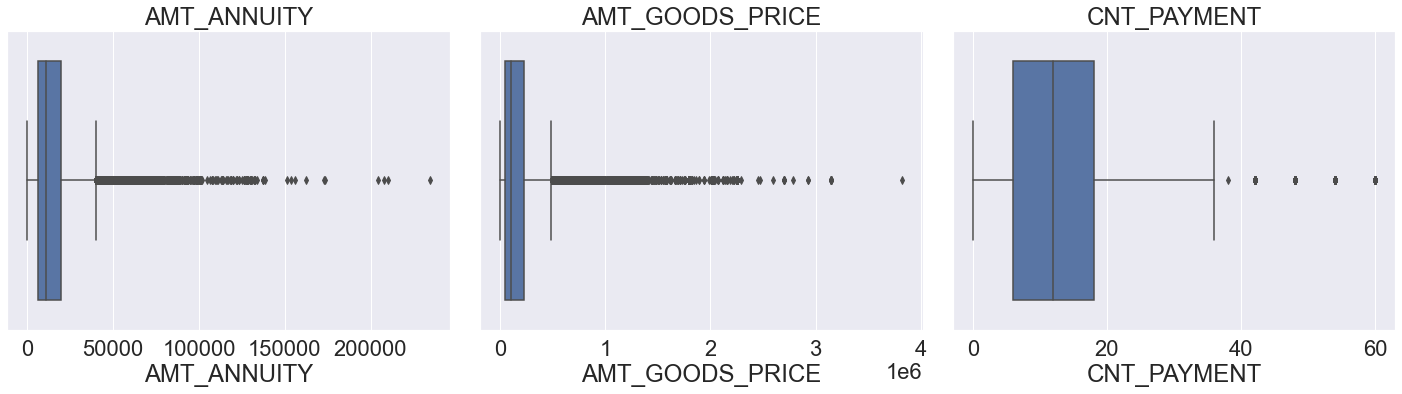

In [38]:
#plot boxplots to detect outliers
plt.figure(figsize=(20,6))

for i in enumerate(numcol):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x=df_pre[i[1]])
    plt.title(i[1]) 
    plt.tight_layout()

In [39]:
#Imputing with median, as the columns have huge outliers
#calculating the median of numerical columns with null values
Amt_Annuity_median = round(df_pre['AMT_ANNUITY'].median(),2)
AMT_GOODS_PRICE = round(df_pre['AMT_GOODS_PRICE'].median(),2)
CNT_PAYMENT = round(df_pre['CNT_PAYMENT'].median(),2)

#imputing the null values with median 
df_pre['AMT_ANNUITY'].fillna(Amt_Annuity_median, inplace=True)
df_pre['AMT_GOODS_PRICE'].fillna(AMT_GOODS_PRICE, inplace=True)
df_pre['CNT_PAYMENT'].fillna(CNT_PAYMENT, inplace=True)

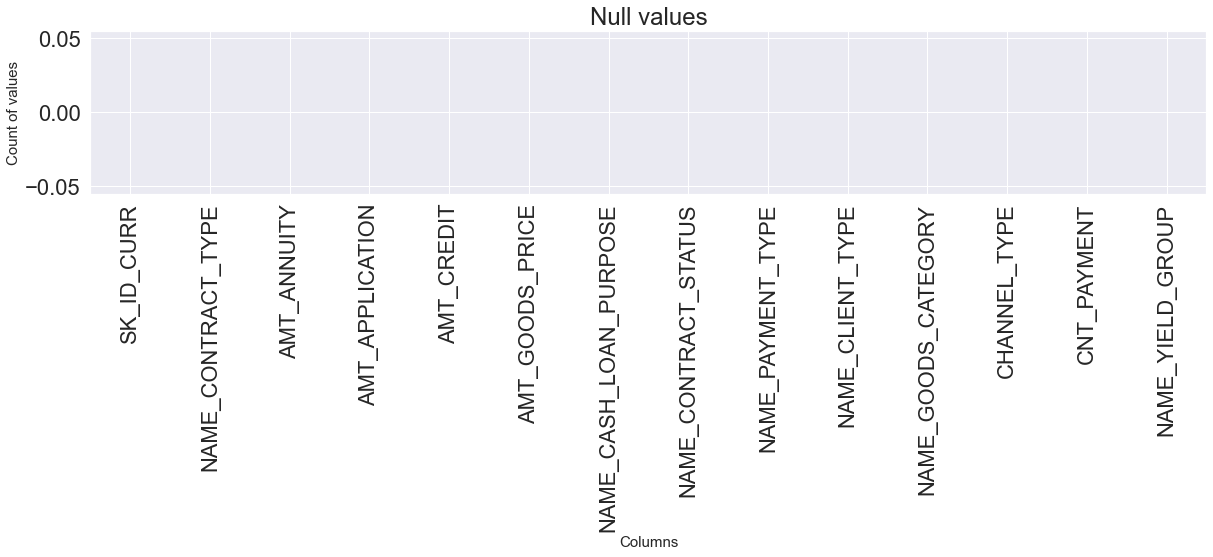

In [40]:
#plot columns to check null values
cols=round((df_pre.isnull().sum()/len(df_pre.index))*100,2)
null_cols=cols
plt.figure(figsize=(20,3))
null_cols.plot(kind="bar")                           
plt.title("Null values") 
plt.xlabel("Columns",fontdict={"fontsize":15,"fontweight":5})                  
plt.ylabel("Count of values",fontdict={"fontsize":15,"fontweight":5})
plt.show()

In [41]:
df_pre.head()

SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0      271877     Consumer loans      1730.43          17145.0     17145.0   
1      108129         Cash loans    25188.615         607500.0    679671.0   
2      122040         Cash loans    15060.735         112500.0    136444.5   
3      176158         Cash loans    47041.335         450000.0    470790.0   
4      202054         Cash loans    31924.395         337500.0    404055.0   

   AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0          17145.0                    XAP             Approved   
1         607500.0                    XNA             Approved   
2         112500.0                    XNA             Approved   
3         450000.0                    XNA             Approved   
4         337500.0                Repairs              Refused   

       NAME_PAYMENT_TYPE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0  Cash through the bank         Repeater              Mobile   
1                    XNA         Repeater                 XNA   
2  Cash through the bank         Repeater                 XNA   
3  Cash through the bank         Repeater                 XNA   
4  Cash through the bank         Repeater                 XNA   

              CHANNEL_TYPE  CNT_PAYMENT NAME_YIELD_GROUP  
0             Country-wide           12           middle  
1           Contact center           36       low_action  
2  Credit and cash offices           12             high  
3  Credit and cash offices           12           middle  
4  Credit and cash offices           24             high

In [42]:
print(df_app.shape)
print(df_pre.shape)

(49999, 20)
(49999, 14)


# Now that we have cleaned both dataframes we can merge it for further analysis

In [43]:
dfmerg = df_app.merge(df_pre, on=['SK_ID_CURR'], how='inner').reset_index()
dfmerg.shape

(6841, 34)

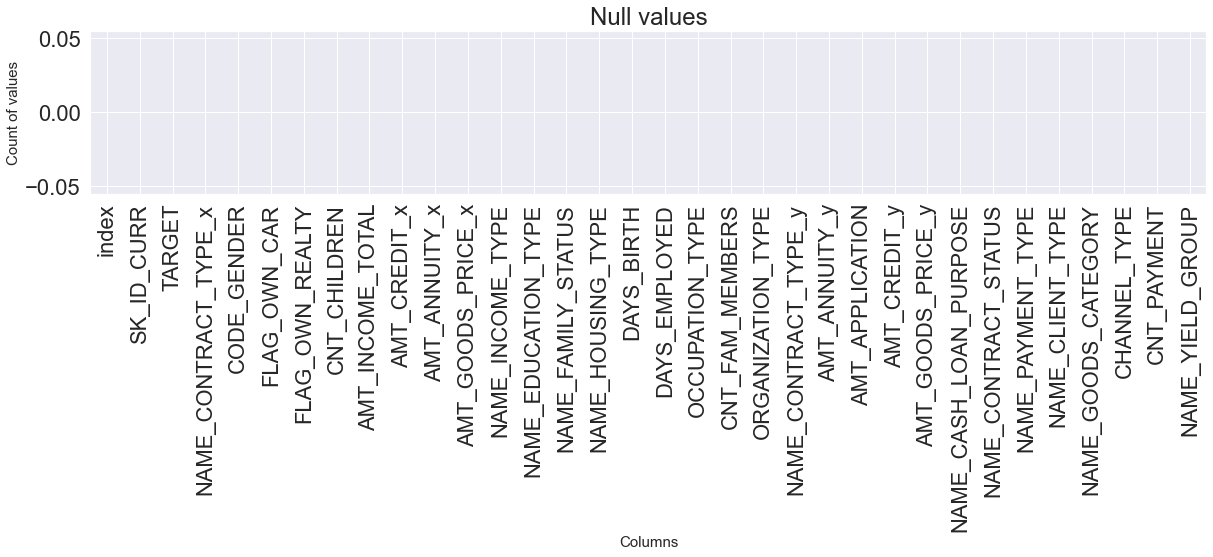

In [44]:
#plot columns to check null values
cols=round((dfmerg.isnull().sum()/len(dfmerg.index))*100,2)
null_cols=cols
plt.figure(figsize=(20,3))
null_cols.plot(kind="bar")                           
plt.title("Null values") 
plt.xlabel("Columns",fontdict={"fontsize":15,"fontweight":5})                  
plt.ylabel("Count of values",fontdict={"fontsize":15,"fontweight":5})
plt.show()

In [45]:
dfmerg.head()

index  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      0      100007       0           Cash loans           M            N   
1      1      100009       0           Cash loans           F            Y   
2      2      100012       0      Revolving loans           M            N   
3      3      100026       0           Cash loans           F            N   
4      4      100027       0           Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          121500.0      513000.0   
1               Y             1          171000.0     1560726.0   
2               Y             0          135000.0      405000.0   
3               N             1          450000.0      497520.0   
4               Y             0           83250.0      239850.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x      NAME_INCOME_TYPE  \
0        21865.5           513000.0               Working   
1        41301.0          1395000.0  Commercial associate   
2        20250.0           405000.0               Working   
3        32521.5           450000.0               Working   
4        23850.0           225000.0             Pensioner   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special               Married   Rented apartment   
4  Secondary / secondary special               Married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0       19932           3038      Core staff                1   
1       13778           3130     Accountants                3   
2       14469           2019        Laborers                1   
3       11146           4306     Sales staff                3   
4       24827         365243       Pensioner                2   

        ORGANIZATION_TYPE NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  \
0                Religion           Cash loans        16509.6   
1  Business Entity Type 3       Consumer loans        8996.76   
2             Electricity       Consumer loans       3012.075   
3           Self-employed       Consumer loans      23608.485   
4                     XNA           Cash loans      22556.475   

   AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE  \
0         180000.0      180000.0           180000.0                    XNA   
1          98239.5       98239.5            98239.5                    XAP   
2          18720.0       23697.0            18720.0                    XAP   
3         132345.0      132345.0           132345.0                    XAP   
4         225000.0      239850.0           225000.0                    XNA   

  NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE  \
0             Approved  Cash through the bank         Repeater   
1             Approved  Cash through the bank         Repeater   
2             Approved                    XNA              New   
3             Approved  Cash through the bank              New   
4              Refused  Cash through the bank         Repeater   

    NAME_GOODS_CATEGORY      CHANNEL_TYPE  CNT_PAYMENT NAME_YIELD_GROUP  
0                   XNA  Regional / Local           18             high  
1  Consumer Electronics  Regional / Local           12       low_action  
2           Audio/Video      Country-wide           12             high  
3             Computers      Country-wide            6       low_normal  
4                   XNA   AP+ (Cash loan)           12       low_normal

# 3) Identify outliers

In [46]:
# seperating categorical and numerical columns
obj_cols = set(dfmerg.columns) - set(dfmerg.describe().columns)
object_dt = list(obj_cols)
num_col=set(dfmerg.describe().columns)
num_dt=list(num_col)
num_dt.remove('index')
num_dt.remove('SK_ID_CURR')
num_dt.remove('TARGET')
num_dt

['AMT_INCOME_TOTAL',
 'AMT_GOODS_PRICE_x',
 'AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'CNT_FAM_MEMBERS',
 'CNT_PAYMENT',
 'AMT_CREDIT_y',
 'AMT_GOODS_PRICE_y',
 'AMT_CREDIT_x',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY_x',
 'CNT_CHILDREN']

In [47]:
len(num_dt)

13

In [48]:
#rearrange columns for better visual representation
num_dt=['AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y','AMT_CREDIT_x','AMT_CREDIT_y','AMT_ANNUITY_x','AMT_ANNUITY_y',
 'AMT_INCOME_TOTAL','AMT_APPLICATION','CNT_FAM_MEMBERS', 'CNT_CHILDREN',
'DAYS_BIRTH','DAYS_EMPLOYED', 'CNT_PAYMENT']

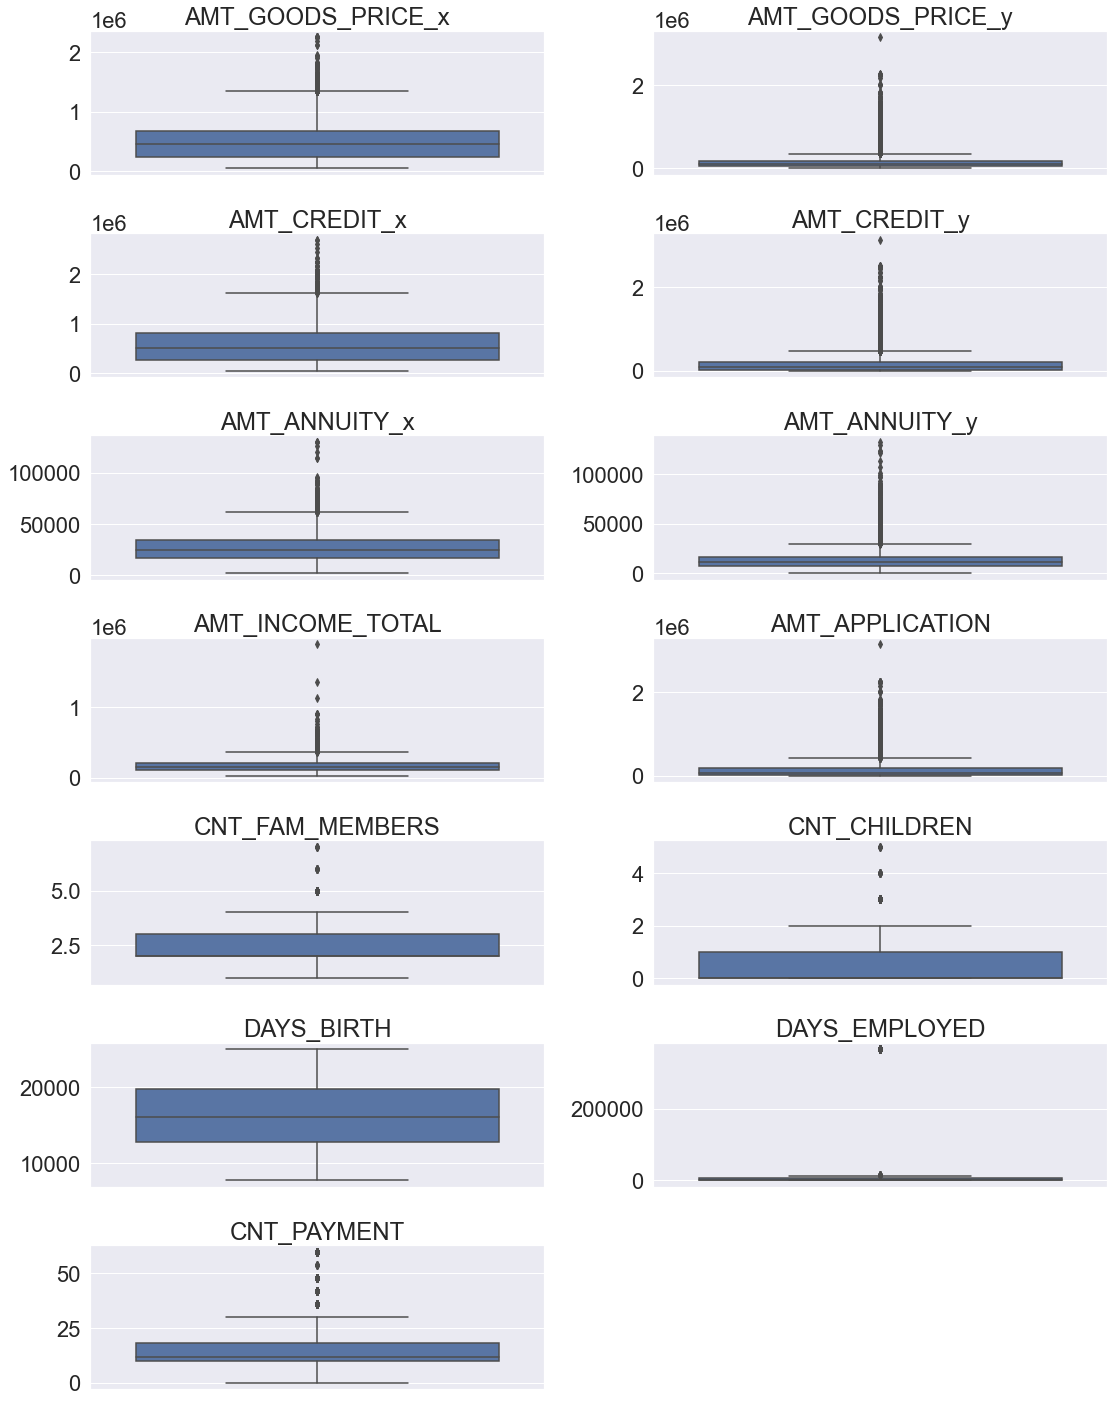

In [49]:
#plot boxplots to detect outliers
plt.figure(figsize=(16,20))

for i in enumerate(num_dt):
    plt.subplot(7,2,i[0]+1)
    sns.boxplot(y=dfmerg[i[1]])
    plt.title(i[1]) 
    plt.tight_layout()
    plt.ylabel("")

In [50]:
#binning columns having continuous variables for further analysis

In [51]:
dfmerg[['AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y','AMT_CREDIT_x','AMT_CREDIT_y','AMT_ANNUITY_x','AMT_ANNUITY_y',
 'AMT_INCOME_TOTAL','AMT_APPLICATION']].agg(['min','median','max'])

AMT_GOODS_PRICE_x  AMT_GOODS_PRICE_y  AMT_CREDIT_x  AMT_CREDIT_y  \
min               45000.0                0.0       45000.0           0.0   
median           450000.0           104017.5      500566.5       81436.5   
max             2250000.0          3150000.0     2695500.0     3150000.0   

        AMT_ANNUITY_x  AMT_ANNUITY_y  AMT_INCOME_TOTAL  AMT_APPLICATION  
min            2052.0           0.00           29250.0              0.0  
median        24876.0       10879.92          157500.0          73462.5  
max          130180.5      132861.51         1890000.0        3150000.0

In [52]:
dfmerg[['AMT_GOODS_PRICE_x', 'AMT_GOODS_PRICE_y','AMT_CREDIT_x','AMT_CREDIT_y','AMT_ANNUITY_x','AMT_ANNUITY_y',
 'AMT_INCOME_TOTAL','AMT_APPLICATION']].quantile([0.1,0.25,0.4,0.5,0.75,0.8,0.9,0.99])

AMT_GOODS_PRICE_x  AMT_GOODS_PRICE_y  AMT_CREDIT_x  AMT_CREDIT_y  \
0.10           166500.0            33210.0      180000.0           0.0   
0.25           234000.0            62955.0      270000.0       26932.5   
0.40           360000.0           104017.5      417024.0       53689.5   
0.50           450000.0           104017.5      500566.5       81436.5   
0.75           679500.0           180000.0      808650.0      202500.0   
0.80           810000.0           225000.0      900000.0      254700.0   
0.90          1039500.0           450000.0     1129500.0      512370.0   
0.99          1665000.0          1350000.0     1786969.8     1477278.0   

      AMT_ANNUITY_x  AMT_ANNUITY_y  AMT_INCOME_TOTAL  AMT_APPLICATION  
0.10        11101.5        4195.71           85500.0              0.0  
0.25        16456.5       7011.675          112500.0          22495.5  
0.40        21892.5       10879.92          135000.0          47047.5  
0.50        24876.0       10879.92          157500.0          73462.5  
0.75        34488.0       16227.54          211500.0         180000.0  
0.80        37408.5      19278.765          225000.0         225000.0  
0.90        45949.5        29250.0          270000.0         450000.0  
0.99        69594.3      65381.103          450000.0        1350000.0

In [53]:
bin1 = [0, 150000, 300000, 450000, 600000, 750000, 900000, 1200000, 1700000, 2250000]
rng1 = ['0-150K', '150K-300K', '300K-450K', '450K-600K', '600K-750K','750K-900K','900K-12L','12L-17L', 'Above 17L']
dfmerg["AMT_GOODS_PRICE_x_RNG"] = pd.cut(dfmerg["AMT_GOODS_PRICE_x"], bin1 , labels = rng1)

bin2 = [0, 30000, 60000, 90000, 120000, 180000, 240000, 450000, 1400000, 3150000]
rng2 = ['0-30K', '30K-60K', '60K-90K', '90K-120K', '120K-180K','180K-240K','240K-450K','450K-14L', 'Above 14L']
dfmerg["AMT_GOODS_PRICE_y_RNG"] = pd.cut(dfmerg["AMT_GOODS_PRICE_y"], bin2 , labels = rng2)

bin3 = [0, 180000, 270000, 450000, 600000, 750000, 900000, 1200000, 1800000, 2695500]
rng3 = ['0-180K', '180K-270K', '270K-450K', '450K-600K', '600K-750K','750K-900K','900K-12L','12L-18L', 'Above 18L']
dfmerg["AMT_CREDIT_x_RNG"] = pd.cut(dfmerg["AMT_CREDIT_x"], bin3 , labels = rng3)

bin4 = [0, 30000, 60000, 90000, 120000, 180000, 240000, 450000, 1500000, 3150000]
rng4 = ['0-30K', '30K-60K', '60K-90K', '90K-120K', '120K-180K','180K-240K','240K-450K','450K-15L', 'Above 15L']
dfmerg["AMT_CREDIT_y_RNG"] = pd.cut(dfmerg["AMT_CREDIT_y"], bin4 , labels = rng4)

bin5 = [0, 12000, 24000, 36000, 48000, 70000, 130181]
rng5 = ['0-12K', '12K-24K', '24K-36K', '36K-48K', '48K-70K','Above 70K']
dfmerg["AMT_ANNUITY_x_RNG"] = pd.cut(dfmerg["AMT_ANNUITY_x"], bin5 , labels = rng5)

bin6 = [0, 7000, 14000, 21000, 28000, 66000, 132862]
rng6 = ['0-7K', '7K-14K', '14K-21K', '21K-28K', '28K-66K','Above 66K']
dfmerg["AMT_ANNUITY_y_RNG"] = pd.cut(dfmerg["AMT_ANNUITY_y"], bin6 , labels = rng6)

bin7 = [0, 86000, 115000, 186000, 225000, 286000, 450000, 1890000]
rng7 = ['0-86K', '86K-115K', '115K-186K', '186K-225K', '225K-286K','286K-450K','Above 450K']
dfmerg["AMT_INCOME_TOTAL_RNG"] = pd.cut(dfmerg["AMT_INCOME_TOTAL"], bin7 , labels = rng7)

bin8 = [0, 25000, 50000, 100000, 150000, 300000, 450000, 1400000, 3150000]
rng8 = ['0-25K', '25K-50K', '50K-100K', '100K-150K', '150K-300K','300K-450K','450K-14L','Above 14L']
dfmerg["AMT_APPLICATION_RNG"] = pd.cut(dfmerg["AMT_APPLICATION"], bin8 , labels = rng8)

In [54]:
#converting days columns to years for better analysis
dfmerg['AGE_YEARS']=(dfmerg['DAYS_BIRTH']/365).astype(int) 
dfmerg['AGE_YEARS'].unique()

array([54, 37, 39, 30, 68, 41, 47, 50, 21, 33, 53, 51, 46, 65, 45, 38, 48,
       35, 32, 40, 26, 59, 44, 49, 28, 58, 62, 52, 36, 43, 24, 31, 29, 25,
       56, 27, 22, 34, 55, 23, 66, 64, 67, 42, 57, 63, 60, 61])

In [55]:
dfmerg['AGE_YEARS'].agg(['min', 'median', 'max'])

min       21.0
median    43.0
max       68.0
Name: AGE_YEARS, dtype: float64

In [56]:
dfmerg['YEARS_EMPLOYED']=(dfmerg['DAYS_EMPLOYED']/365).astype(int)
dfmerg['YEARS_EMPLOYED'].unique()

array([   8,    5,   11, 1000,    7,    2,    3,    1,   13,   12,   15,
         14,    4,    0,    6,   18,   30,   10,    9,   23,   31,   22,
         21,   28,   17,   16,   20,   25,   26,   24,   27,   19,   33,
         35,   37,   34,   29,   36,   39,   44,   40,   32,   38,   41])

In [57]:
dfmerg['YEARS_EMPLOYED'].agg(['min', 'median', 'max'])

min          0.0
median       6.0
max       1000.0
Name: YEARS_EMPLOYED, dtype: float64

In [58]:
#binning age and years employed
bin_age = [0, 25, 30, 45, 60, 68]
rng_age = ['0-25', '25-30', '30-45', '45-60', 'Above 60']
dfmerg["AGE_YEARS_RNG"] = pd.cut(dfmerg["AGE_YEARS"], bin_age , labels = rng_age)

bin_emp = [0, 25, 30, 45, 60, 68]
rng_emp = ['0-25', '25-30', '30-45', '45-60', 'Above 60']
dfmerg["YEARS_EMPLOYED_RNG"] = pd.cut(dfmerg["YEARS_EMPLOYED"], bin_age , labels = rng_age)

# Analyze Data Imbalance

In [59]:
#data columns to check for imbalance for TARGET variable
#check for Target column, check values
print("Values: \n",dfmerg['TARGET'].value_counts())
print("")
#percentage of values
print("Percentage: \n",round(100*(dfmerg['TARGET'].value_counts()) / (len(dfmerg)),2))

Values: 
 0    6287
1     554
Name: TARGET, dtype: Int64

Percentage: 
 0    91.9
1     8.1
Name: TARGET, dtype: Float64


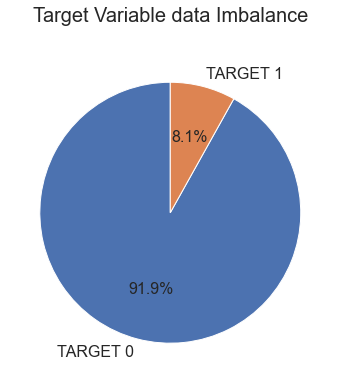

In [60]:
plt.figure(figsize = [6,6])

plt.pie(dfmerg["TARGET"].value_counts(), labels=('TARGET 0','TARGET 1'), autopct='%1.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20}, startangle=90)
# Adding and formatting title
plt.title("Target Variable data Imbalance\n", fontdict={'fontsize': 20, 'fontweight' : 20})

plt.show()

# Univariate Analysis : to understand the distribution of individual variables

In [61]:
#most of the numerical columns are binned, so analysis can be performed on categorical columns
# seperating categorical and numerical columns
obj_cols = set(dfmerg.columns) - set(dfmerg.describe().columns)
object_dt = list(obj_cols)
print(object_dt)
num_col=set(dfmerg.describe().columns)
num_dt=list(num_col)
num_dt

['CHANNEL_TYPE', 'AMT_CREDIT_y_RNG', 'NAME_CONTRACT_TYPE_y', 'NAME_GOODS_CATEGORY', 'AMT_ANNUITY_x_RNG', 'AMT_APPLICATION_RNG', 'FLAG_OWN_CAR', 'NAME_INCOME_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_FAMILY_STATUS', 'AMT_CREDIT_x_RNG', 'AMT_ANNUITY_y_RNG', 'AMT_GOODS_PRICE_x_RNG', 'CODE_GENDER', 'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE_x', 'NAME_CLIENT_TYPE', 'NAME_YIELD_GROUP', 'FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE', 'AMT_GOODS_PRICE_y_RNG', 'YEARS_EMPLOYED_RNG', 'ORGANIZATION_TYPE', 'NAME_PAYMENT_TYPE', 'AMT_INCOME_TOTAL_RNG', 'AGE_YEARS_RNG']


['AMT_INCOME_TOTAL',
 'SK_ID_CURR',
 'AMT_GOODS_PRICE_x',
 'AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AGE_YEARS',
 'CNT_FAM_MEMBERS',
 'index',
 'CNT_PAYMENT',
 'AMT_CREDIT_y',
 'YEARS_EMPLOYED',
 'AMT_GOODS_PRICE_y',
 'AMT_CREDIT_x',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'TARGET',
 'AMT_ANNUITY_x',
 'CNT_CHILDREN']

In [62]:
def count_plot(col):
    plt.figure(figsize=(20,5))
    sns.countplot(col, data=dfmerg) 
    plt.xlabel(col, fontsize= 20, fontweight="bold")
    plt.ylabel('', fontsize= 20, fontweight="bold")
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(rotation=360, fontsize=20)

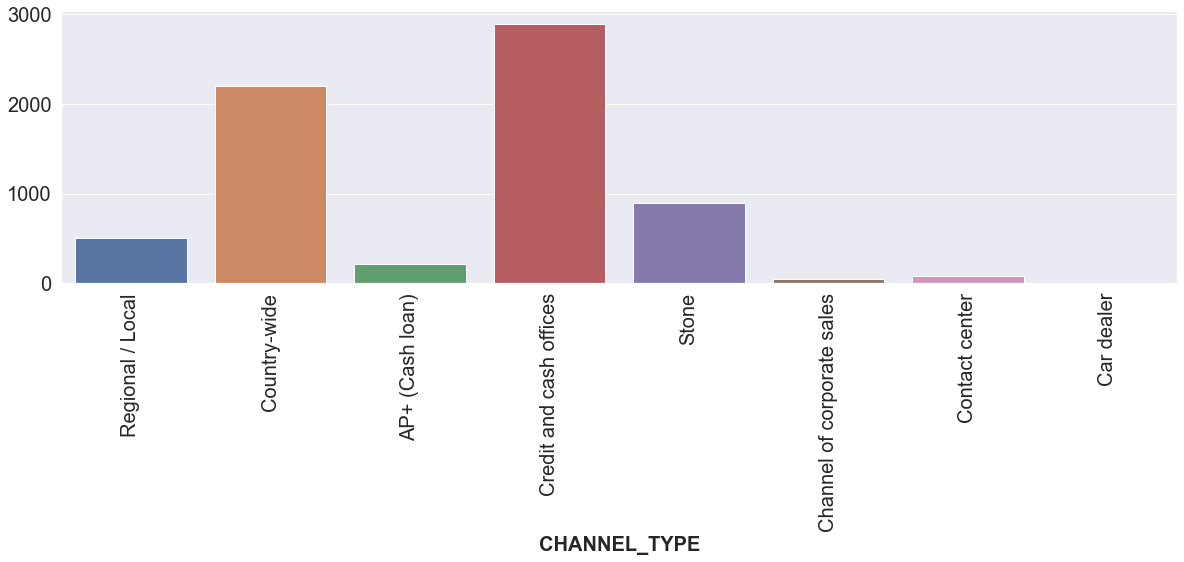

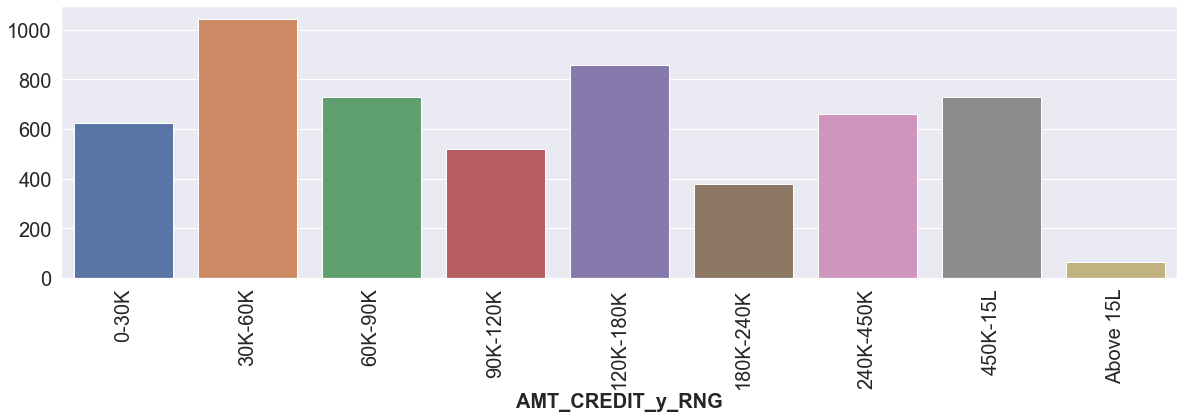

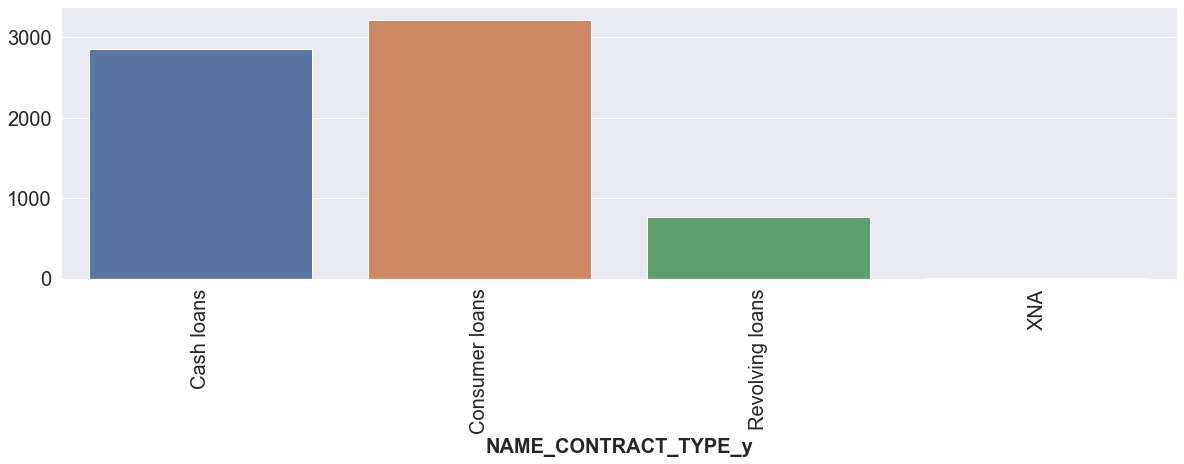

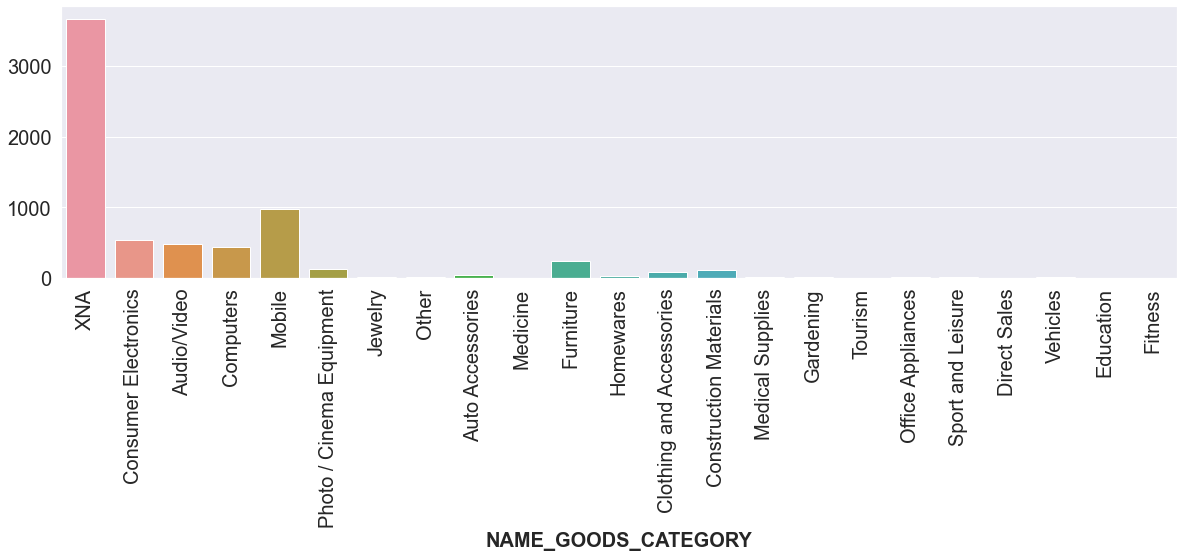

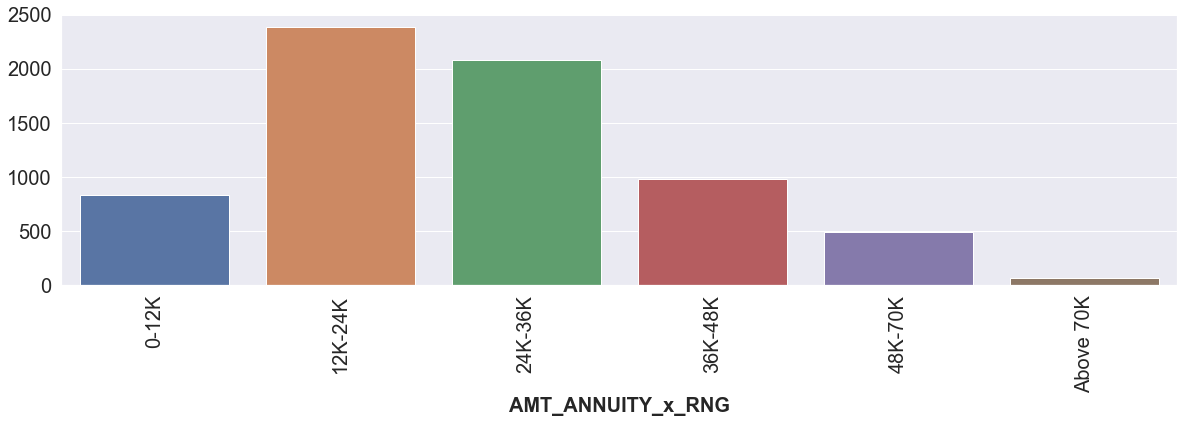

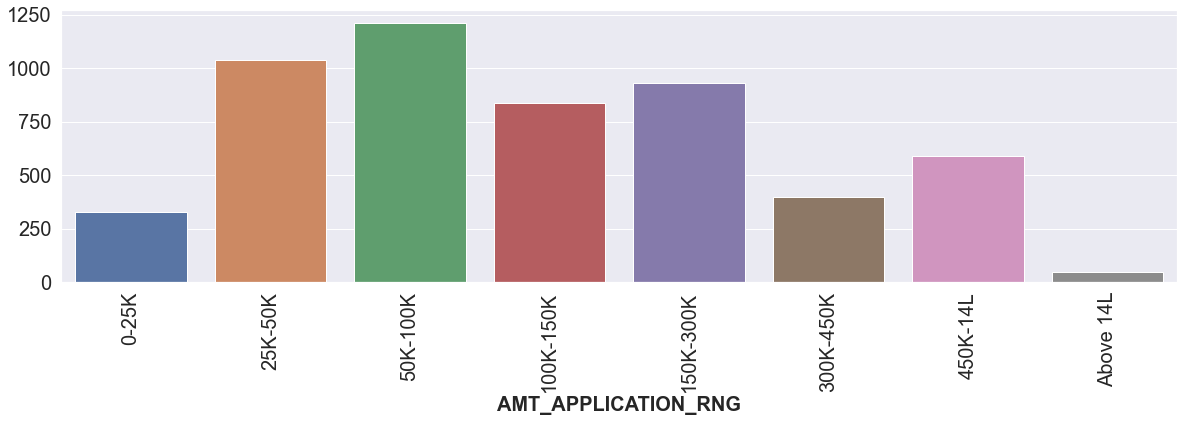

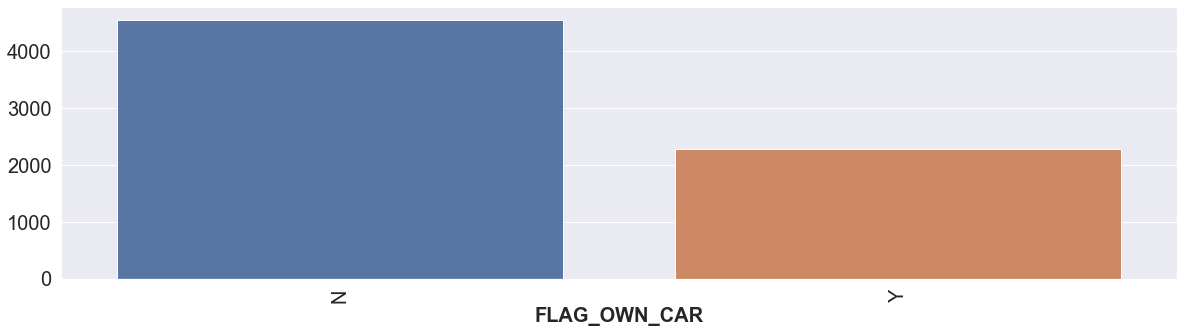

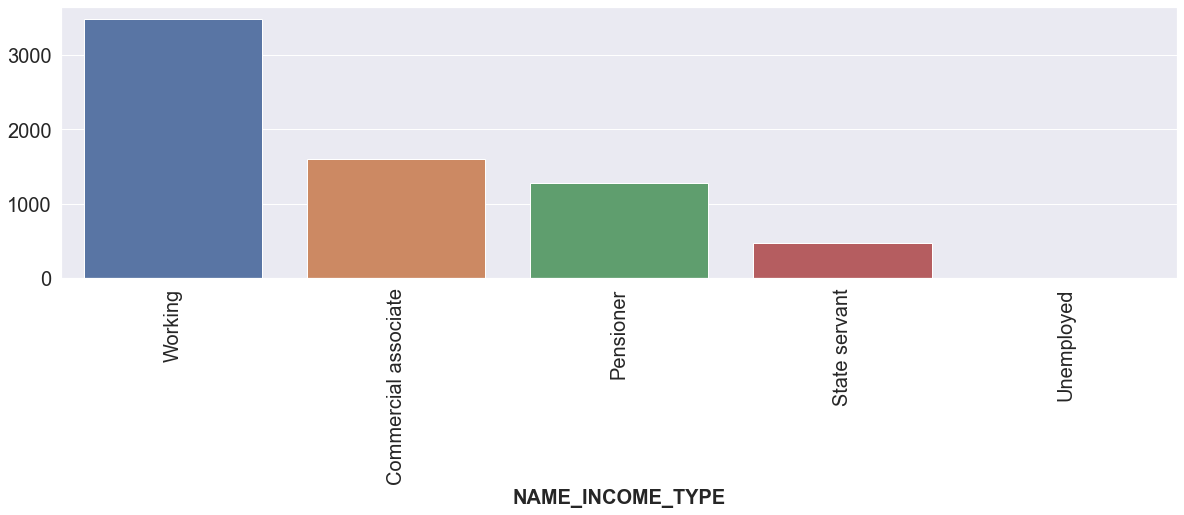

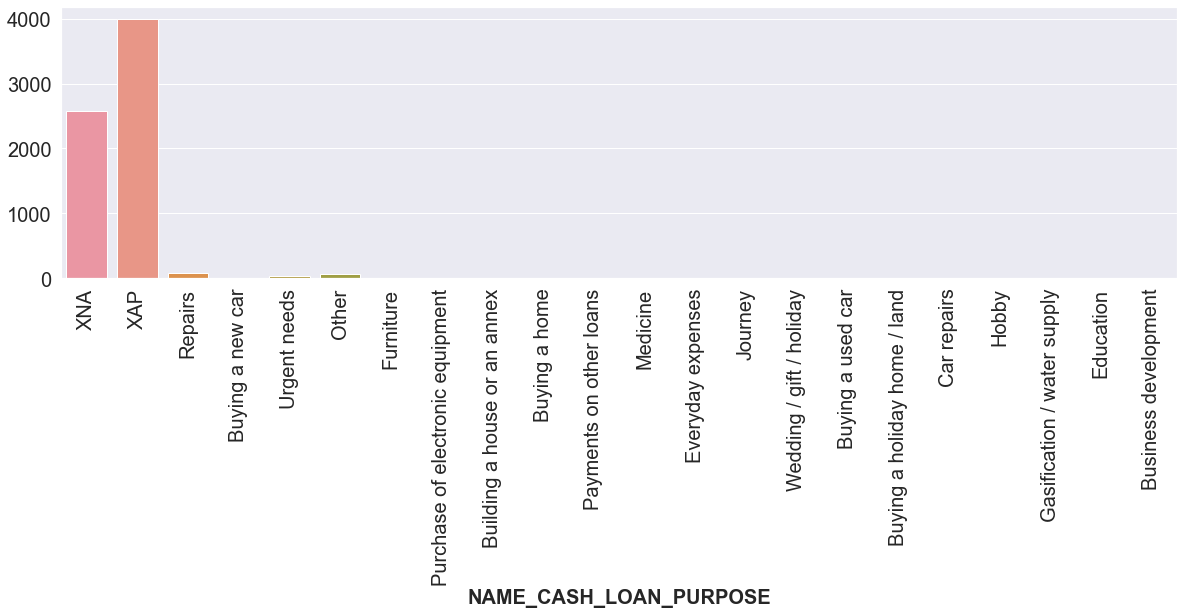

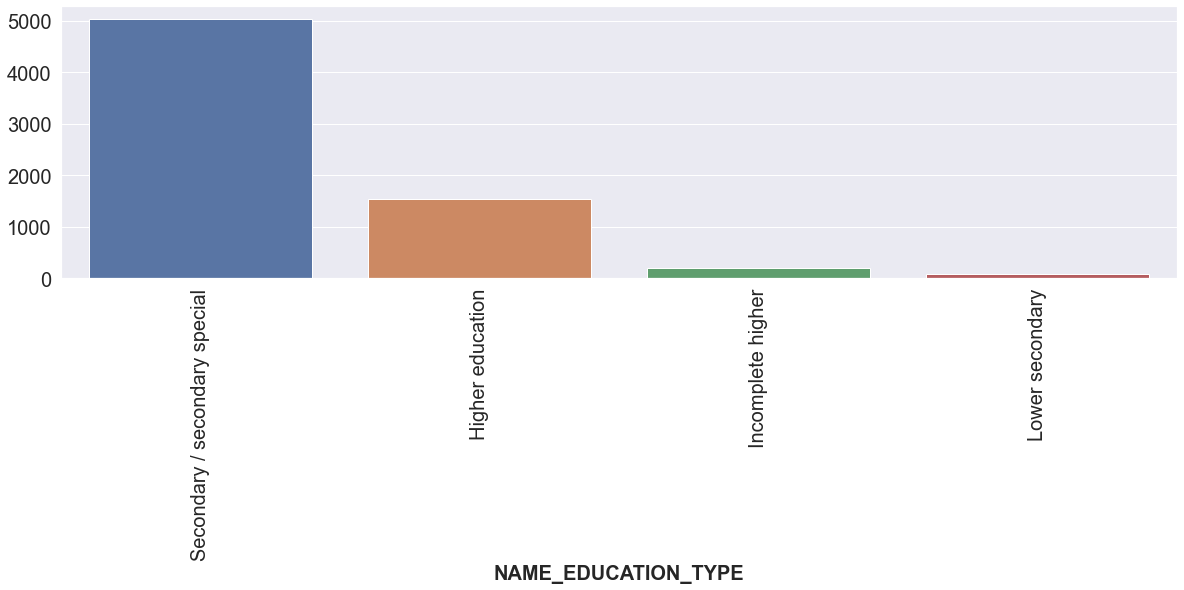

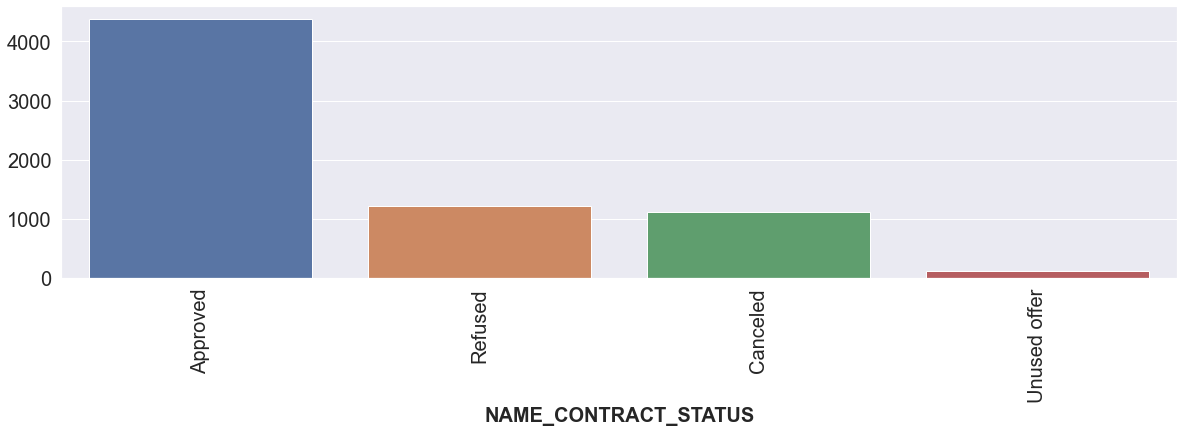

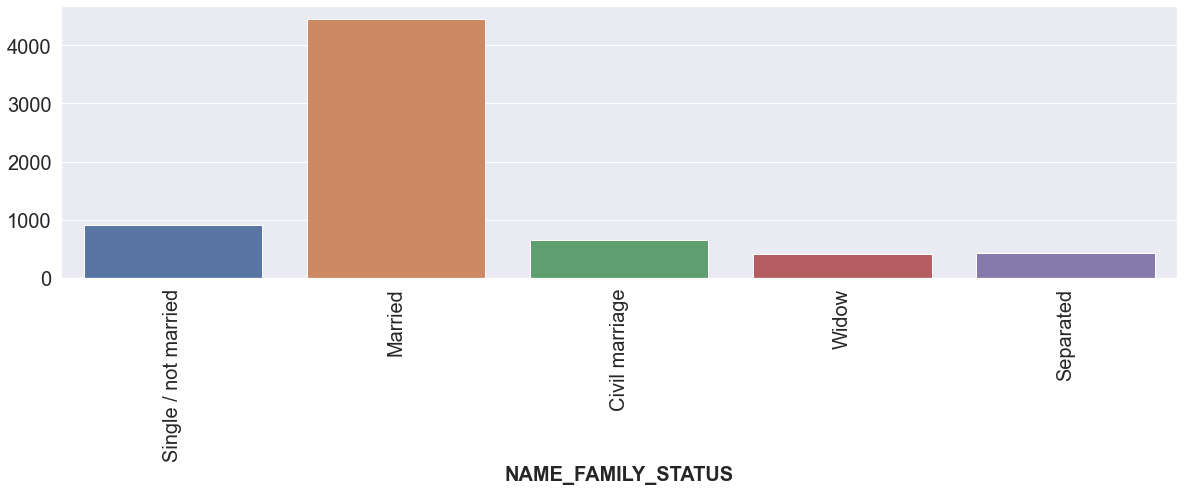

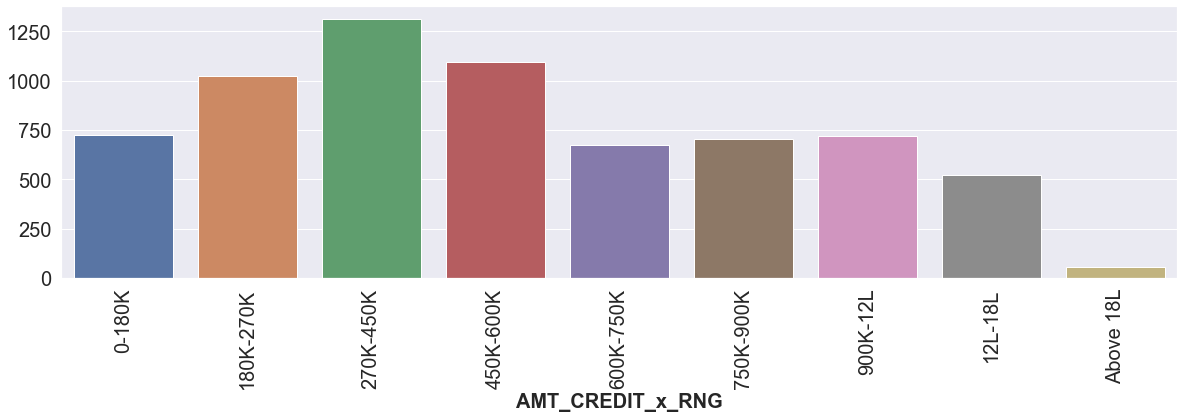

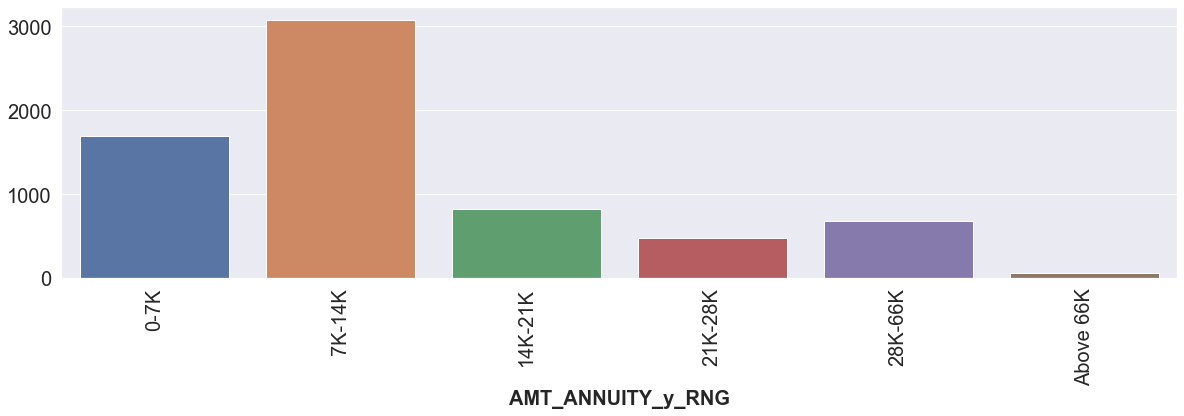

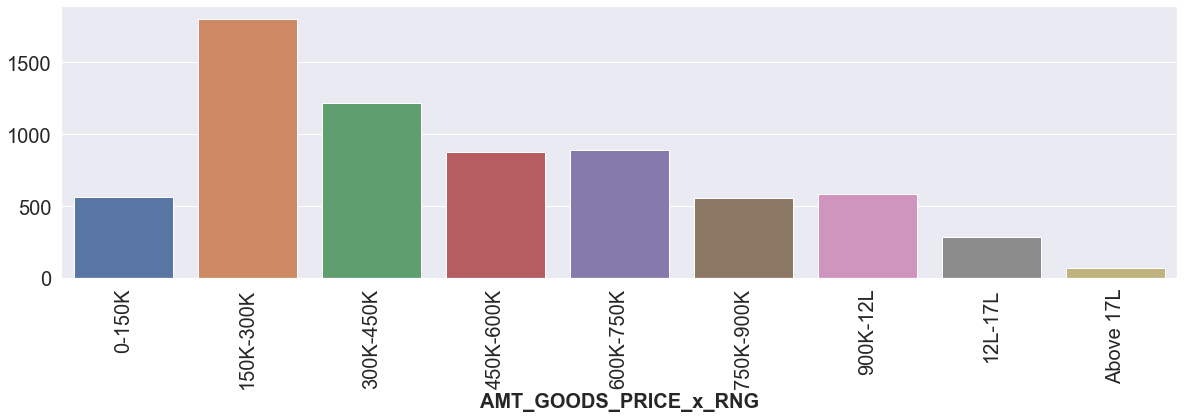

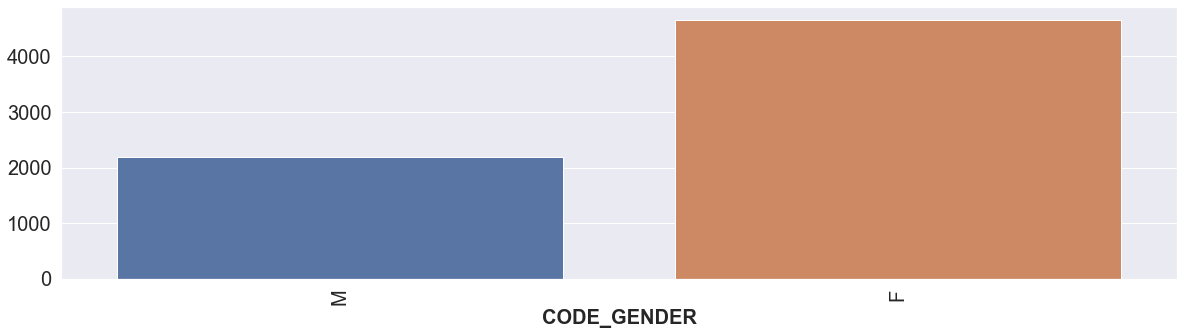

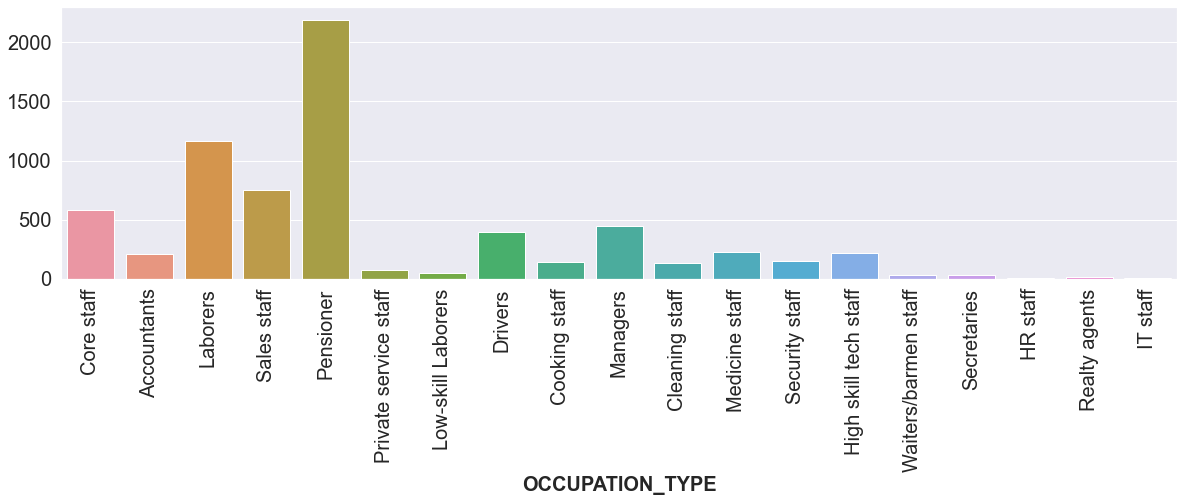

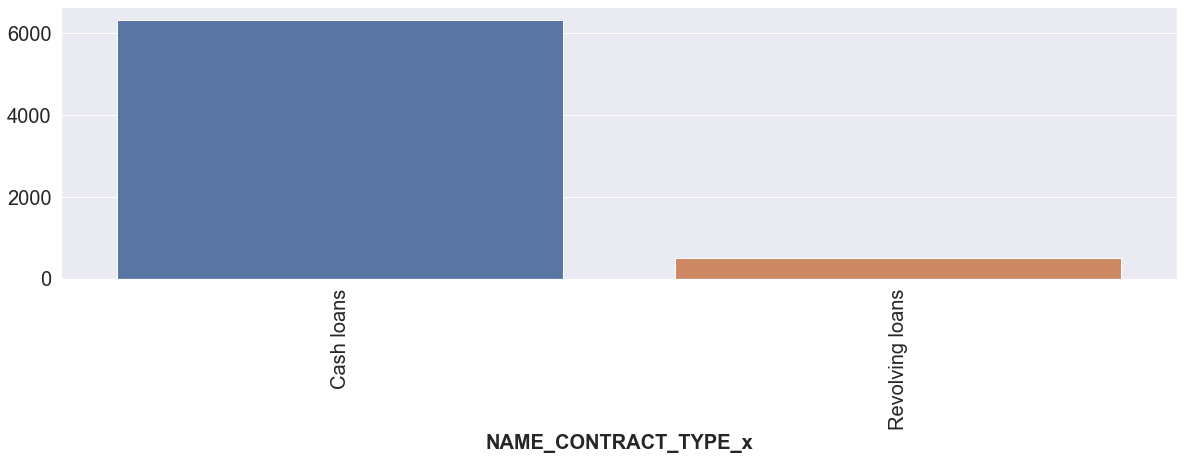

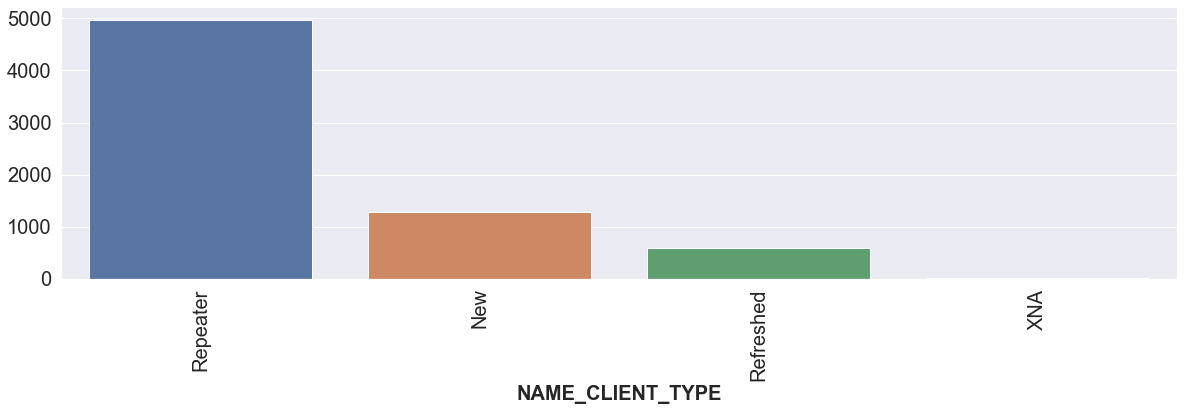

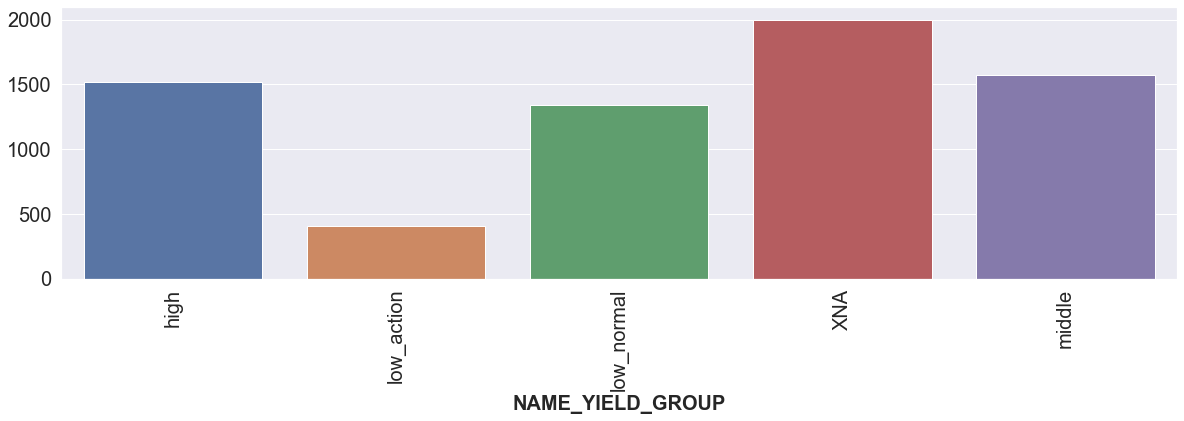

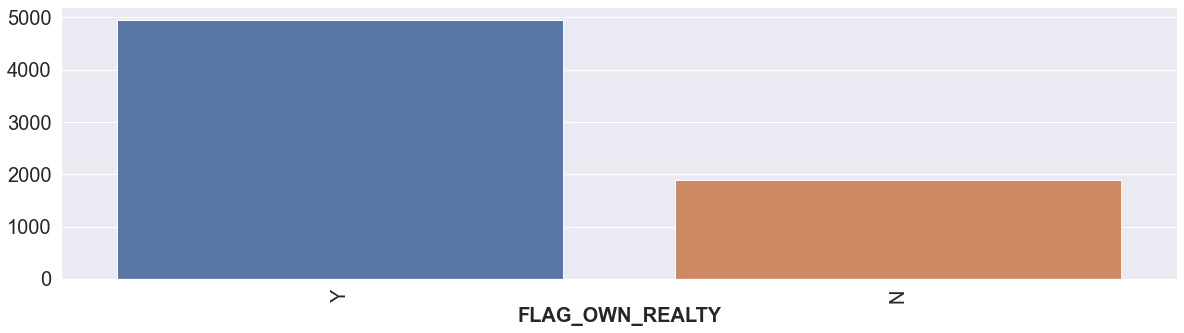

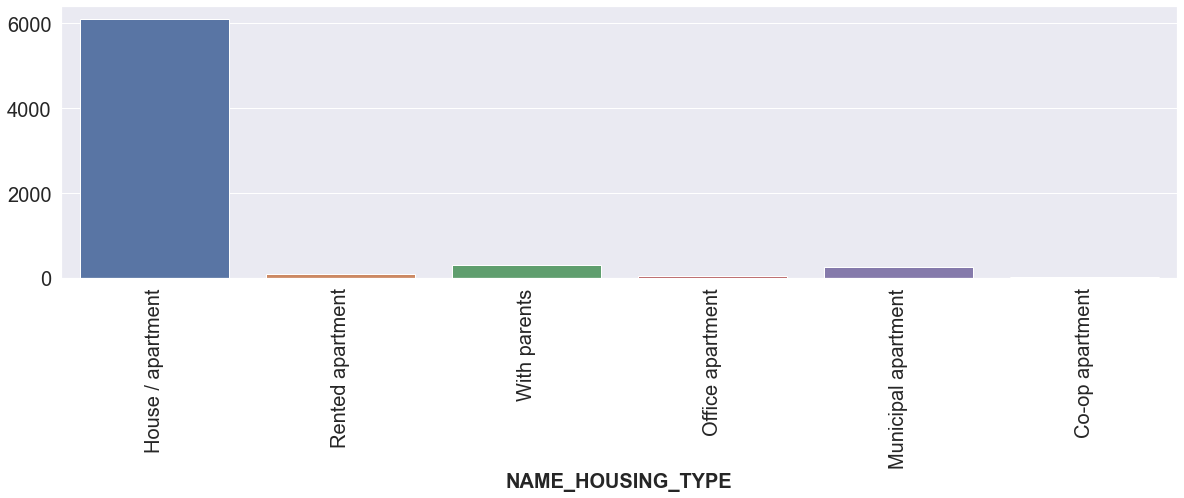

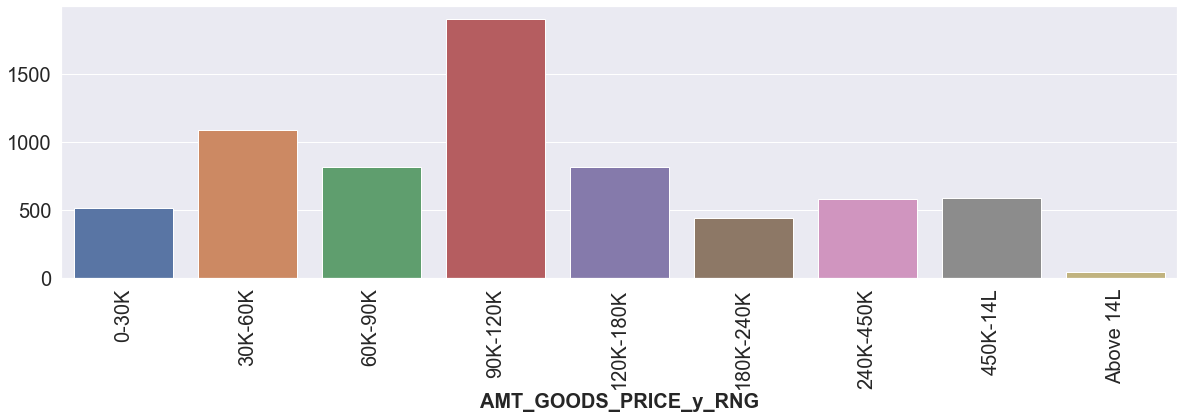

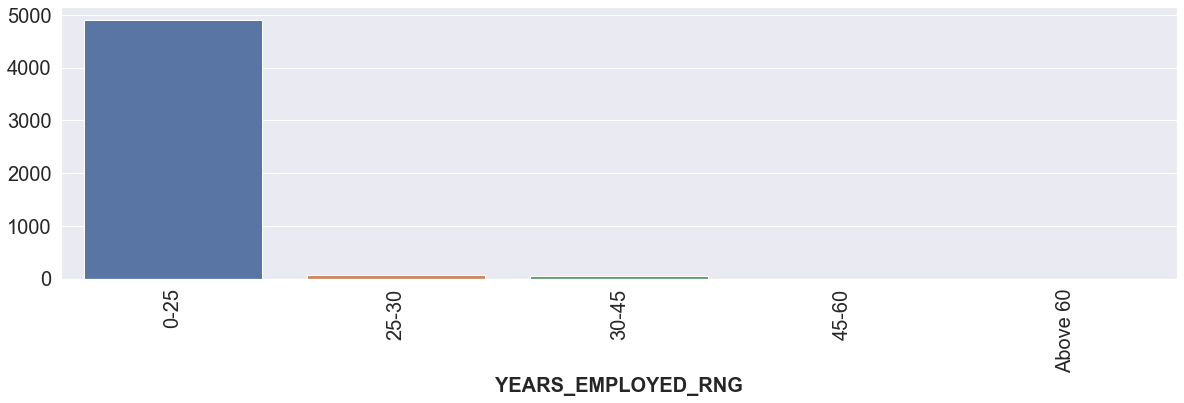

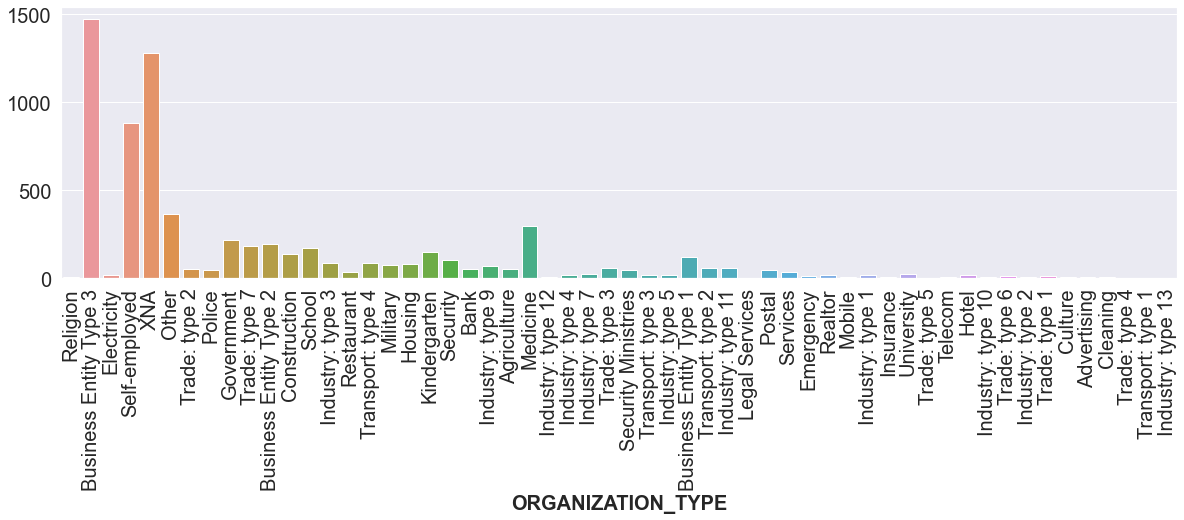

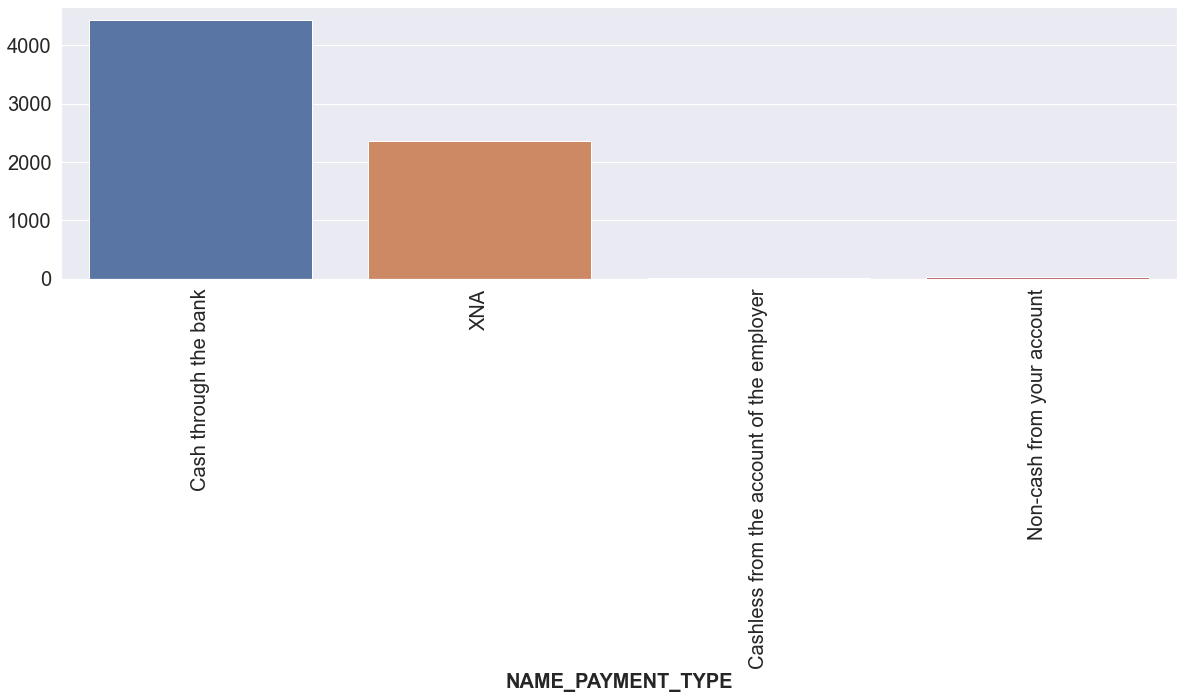

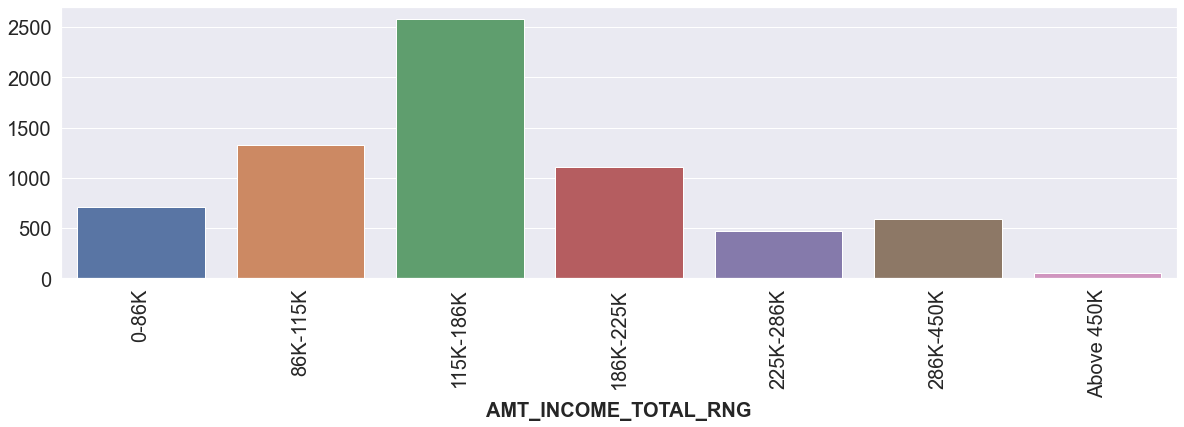

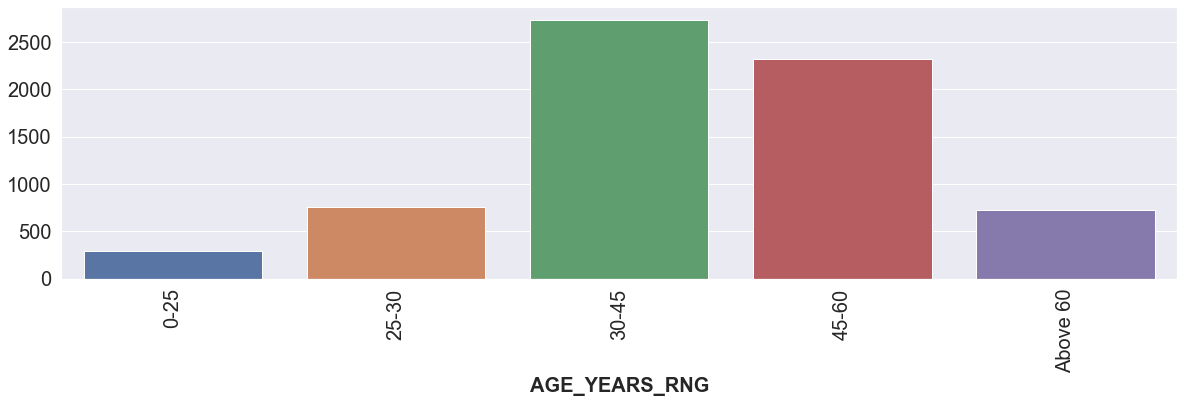

In [63]:
for i in object_dt:
    count_plot(i)

In [64]:
#divide the dataset based on target variable to seperately analyse male and female clients
target0=dfmerg[dfmerg.TARGET==0]
target1=dfmerg[dfmerg.TARGET==1]
print(target0.shape)
print(target1.shape)

(6287, 46)
(554, 46)


In [67]:
#Creating plot for Segmented Univarite Analysis
def seg_plot(col):
    plt.figure(figsize=(20,10))
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 1)
    sns.countplot(col, data=target1, hue='TARGET') 
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Payment Difficulties ', fontsize= 20, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 2)
    sns.countplot(col, data=target0, hue='TARGET')
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel("All other cases", fontsize= 20, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    plt.show()

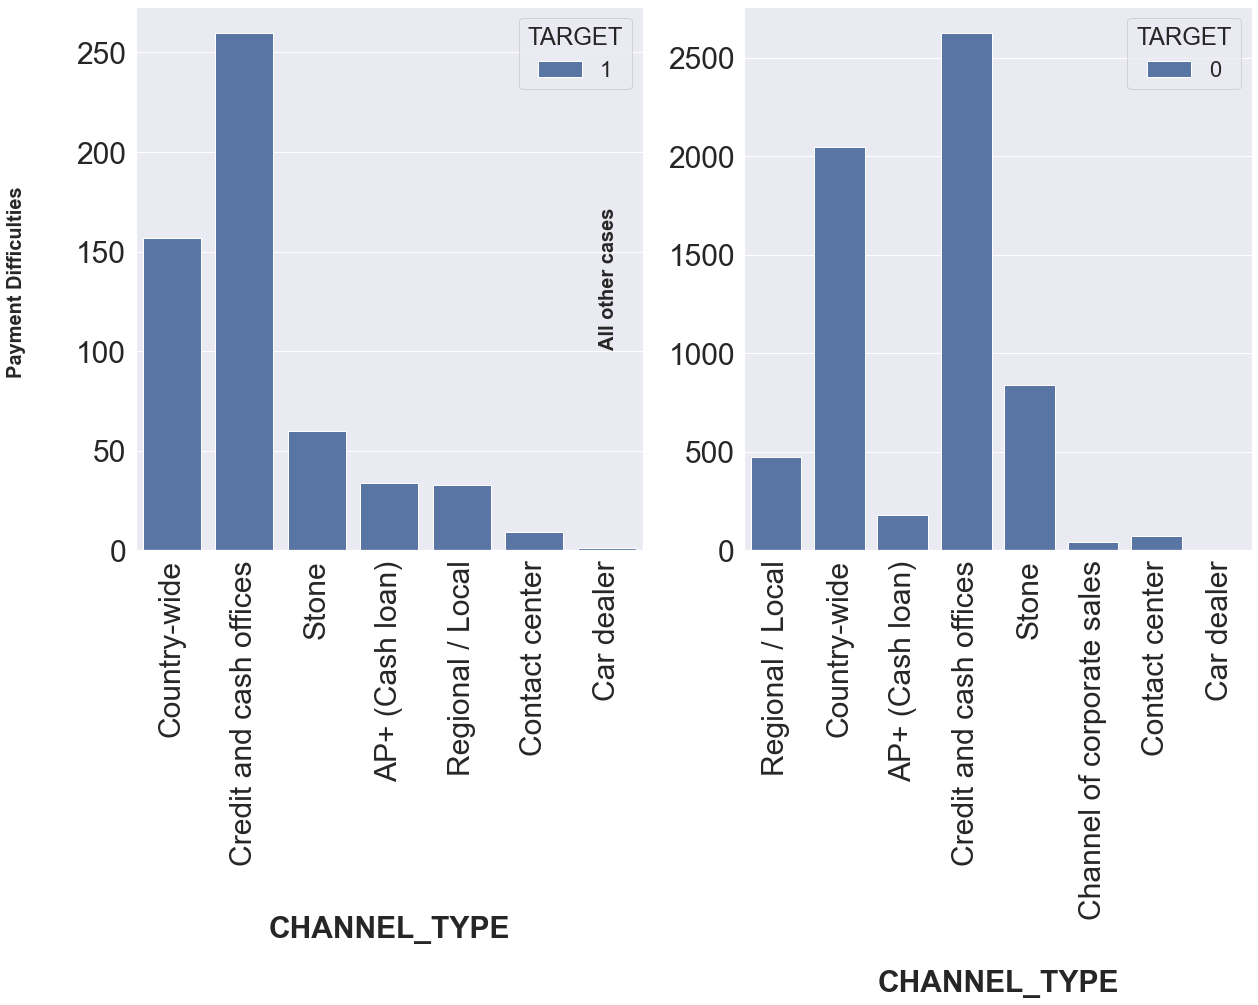

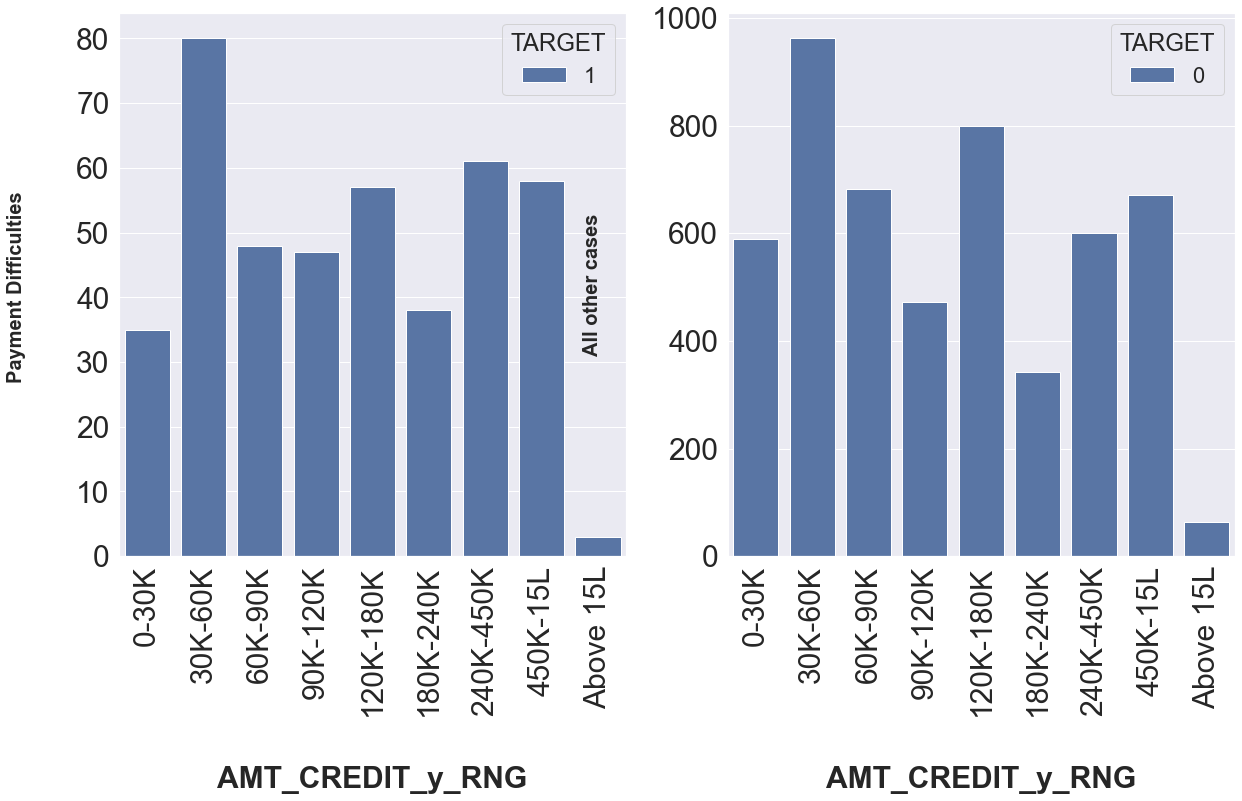

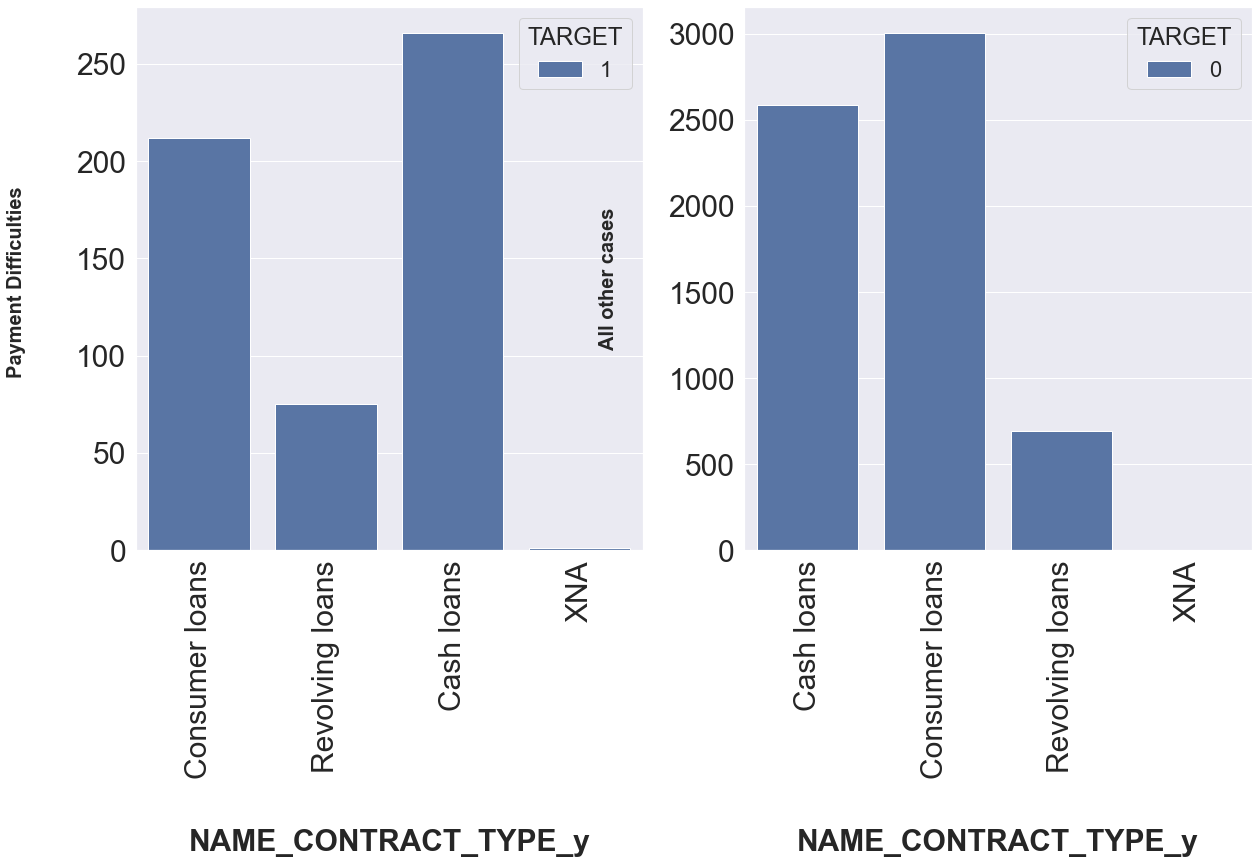

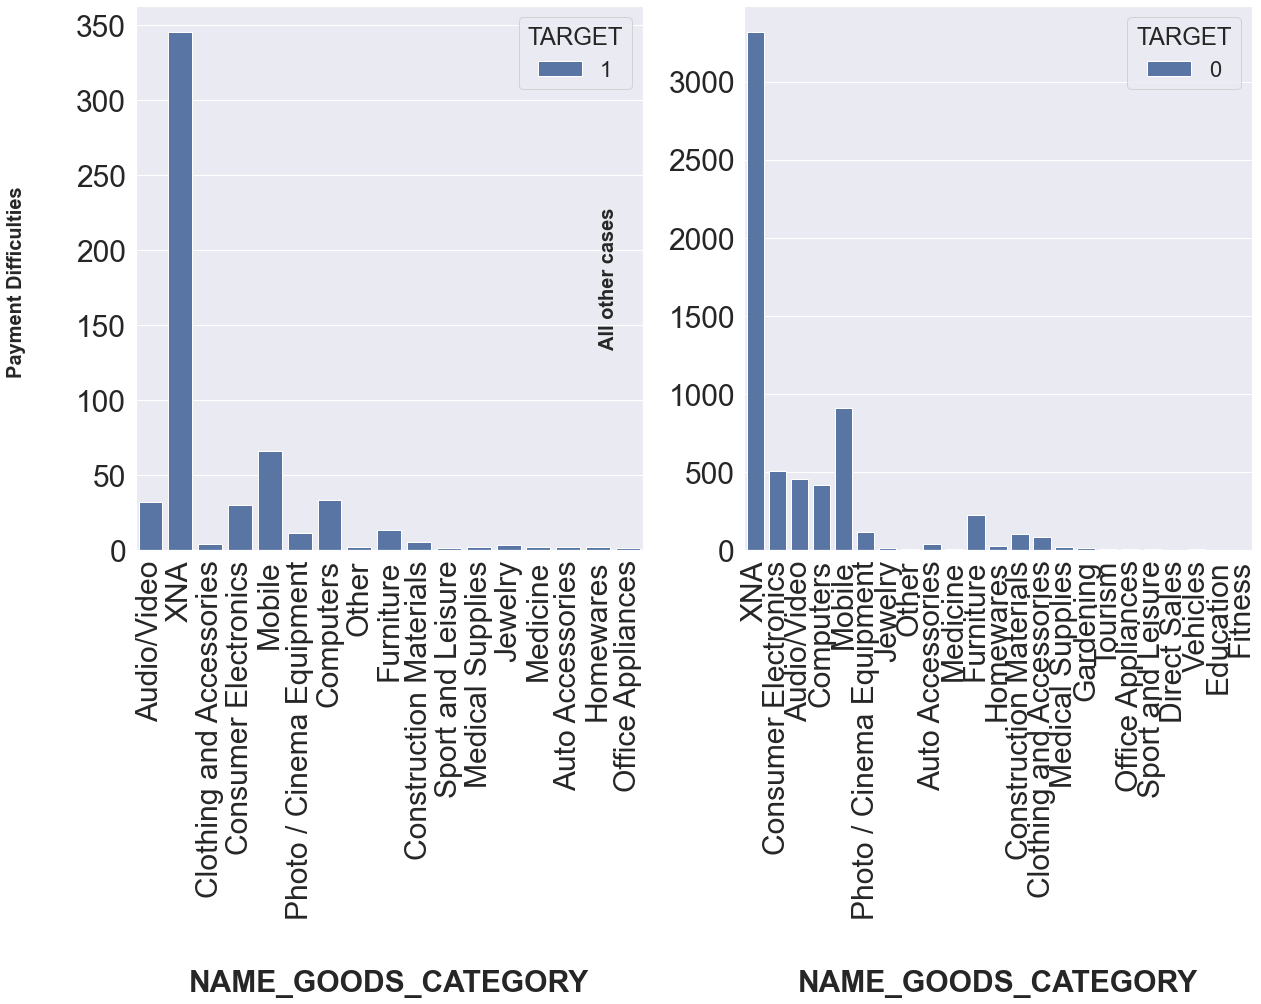

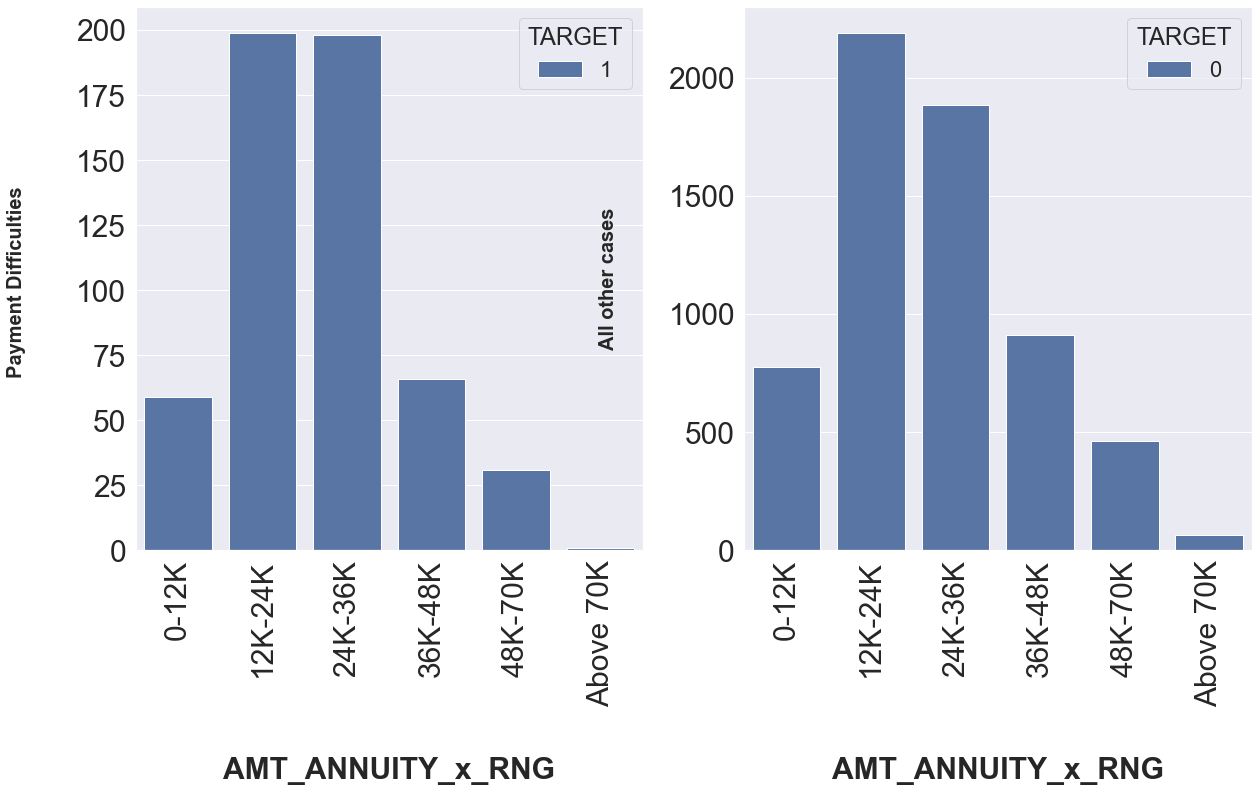

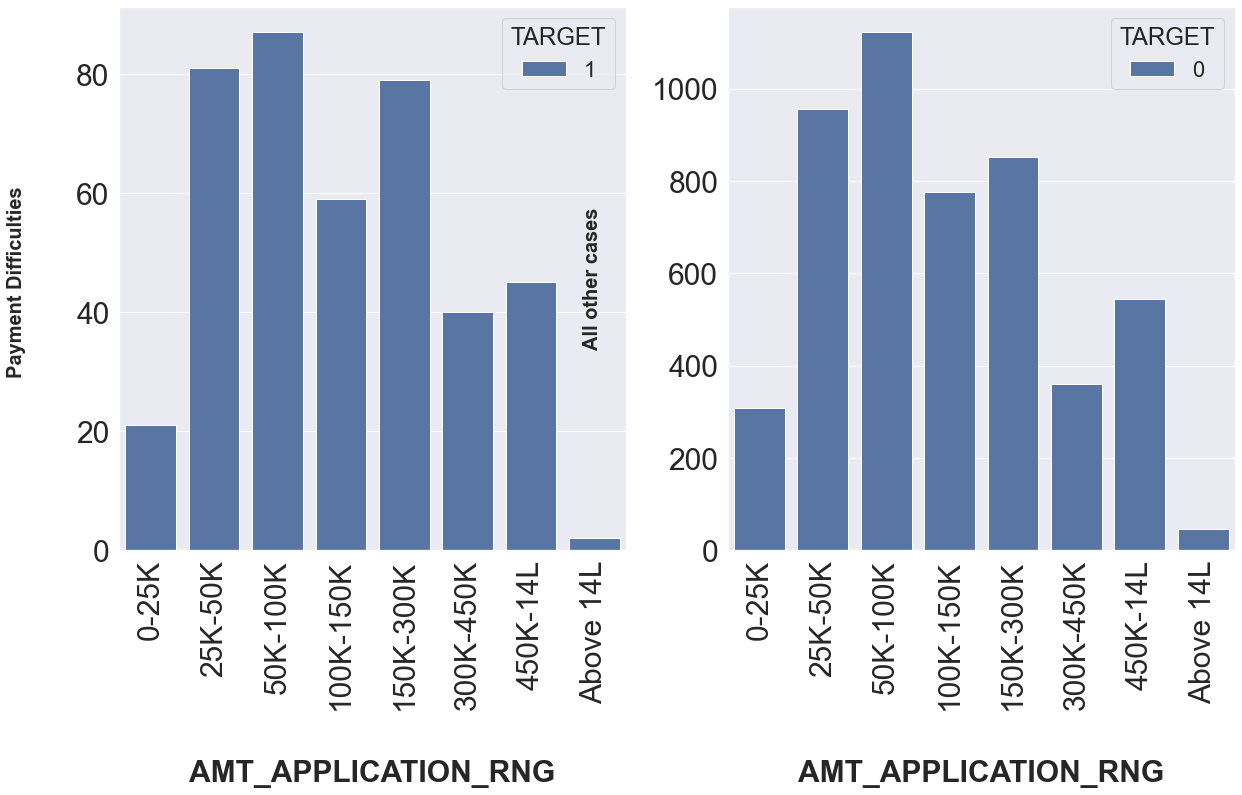

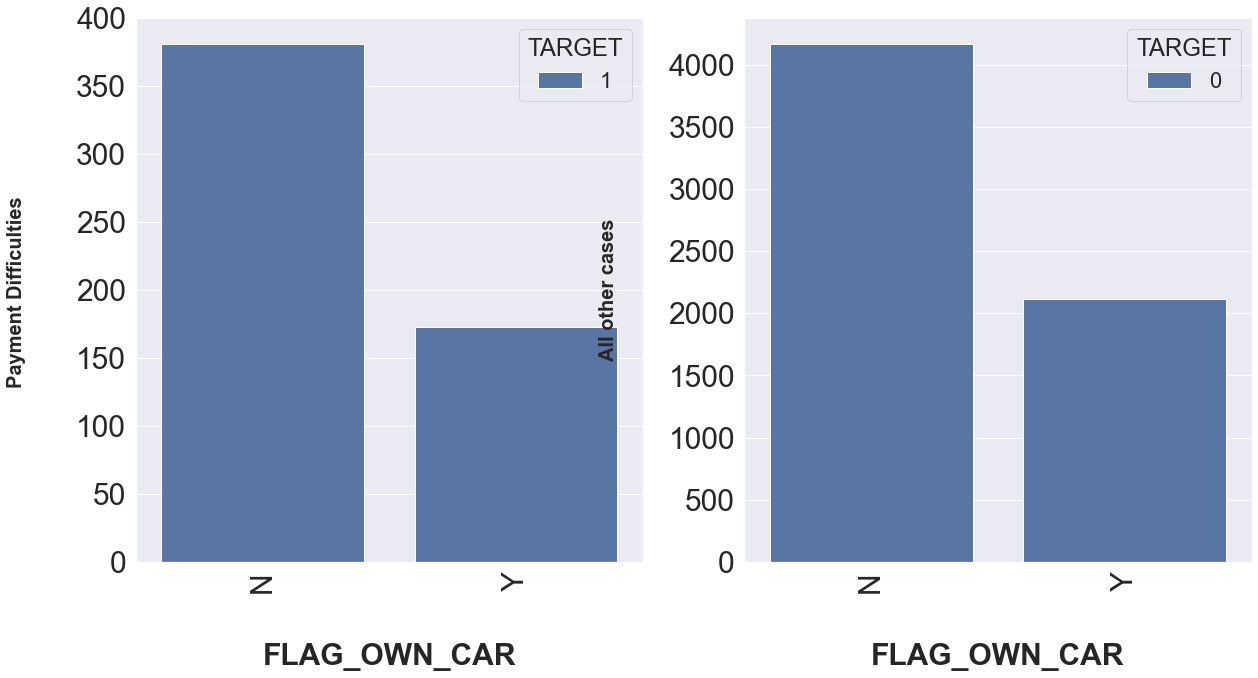

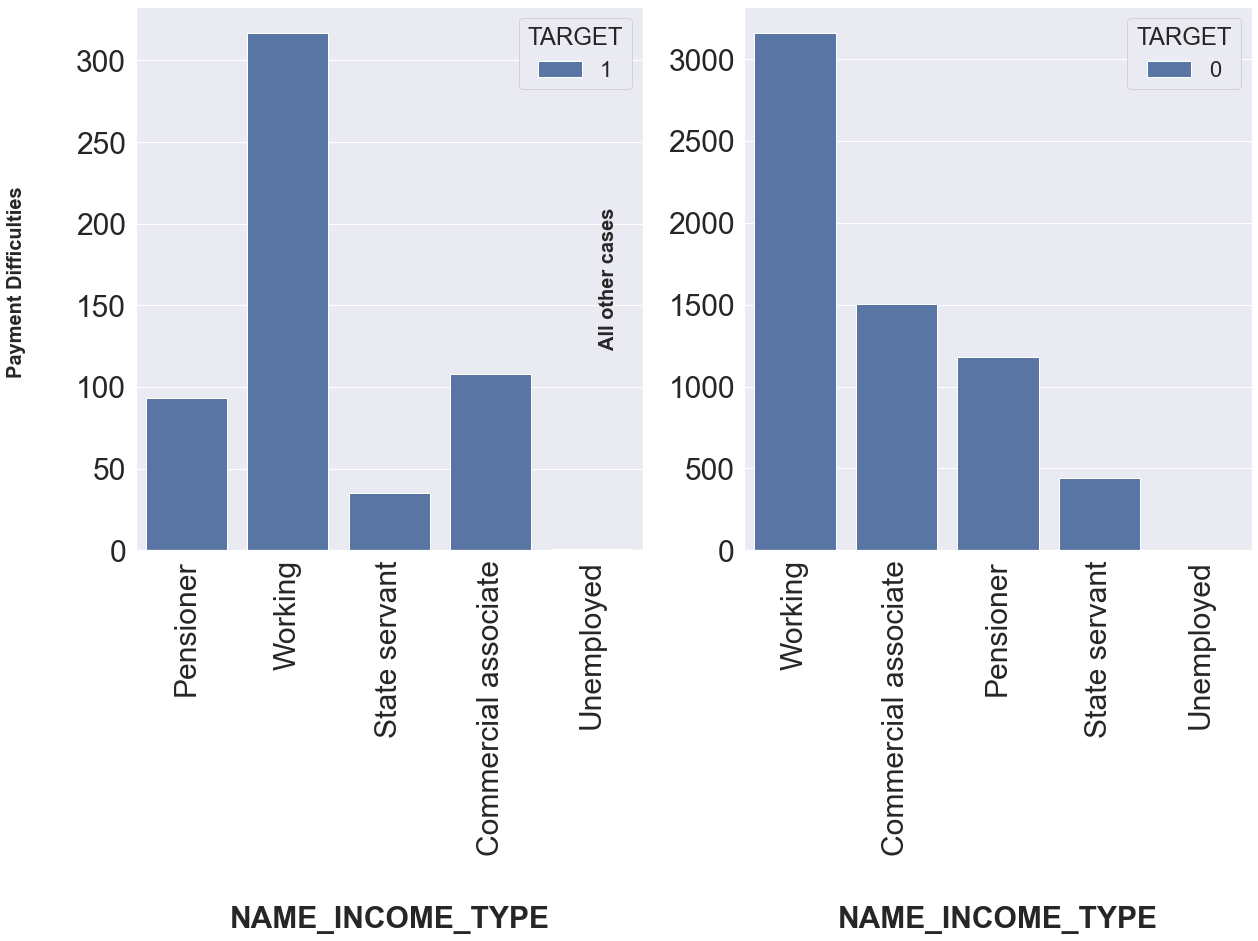

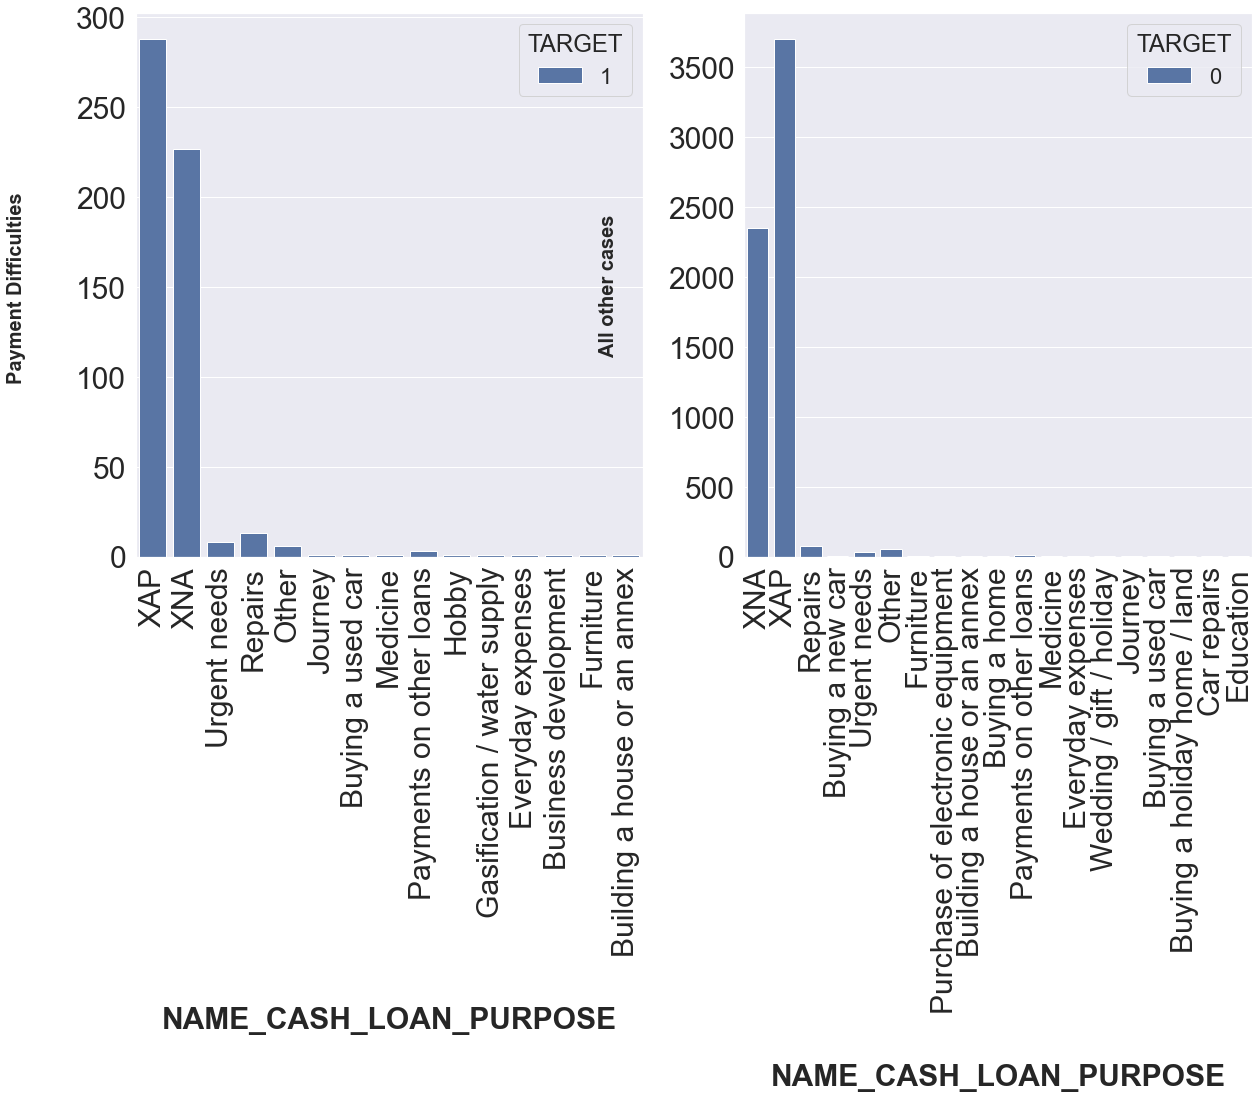

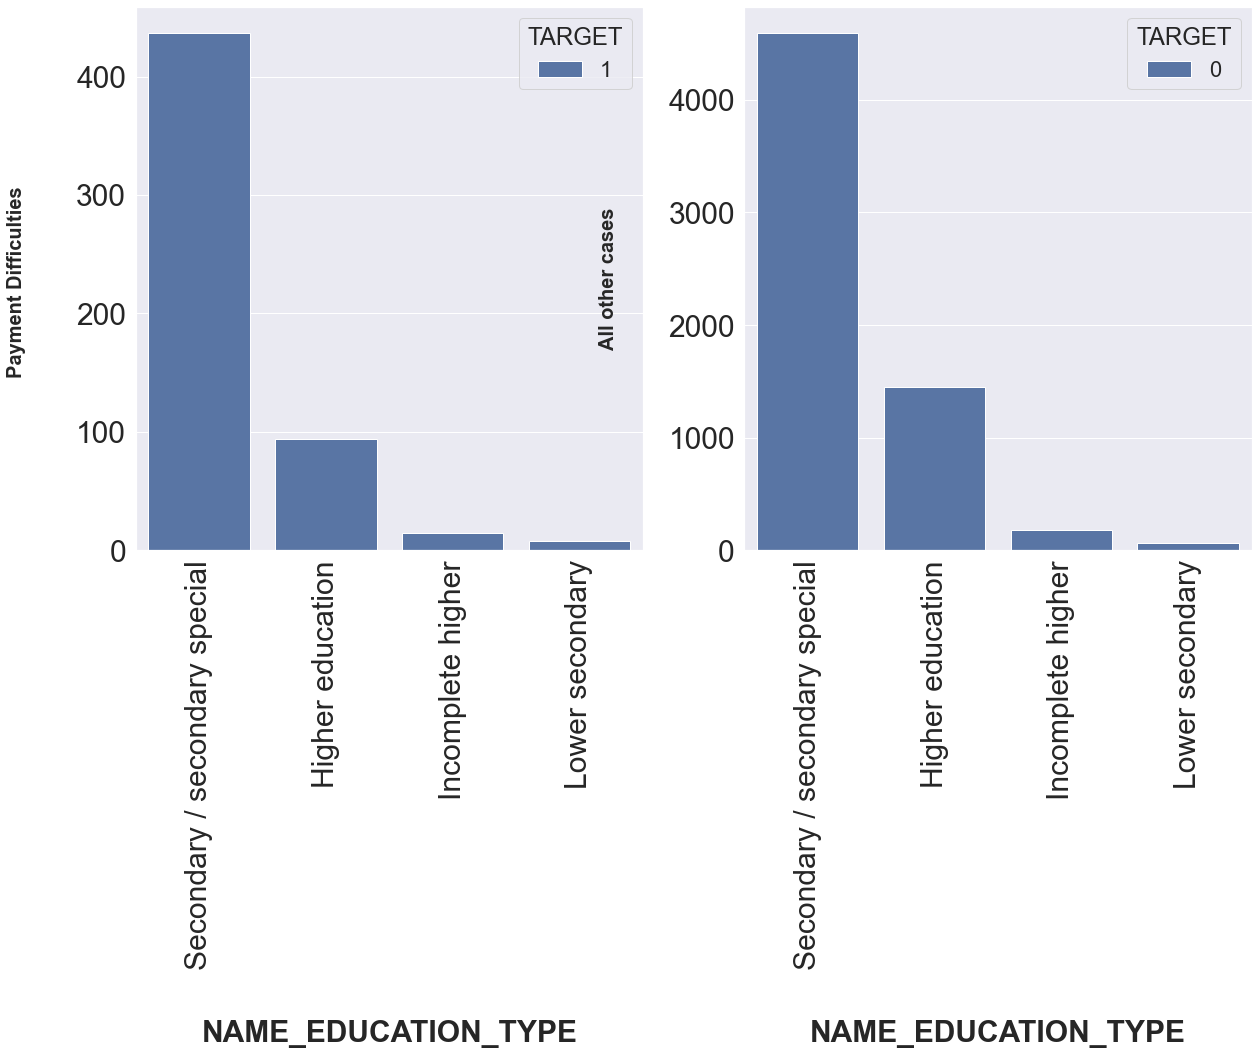

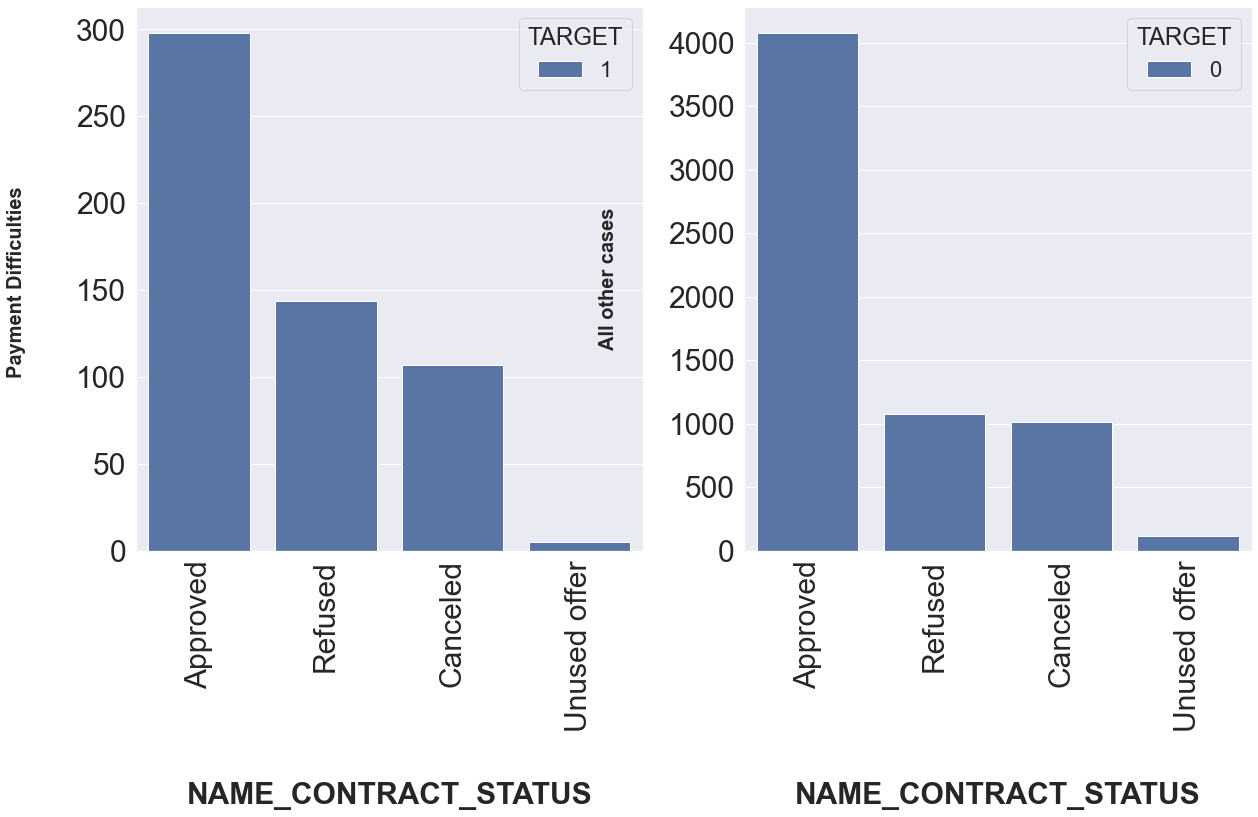

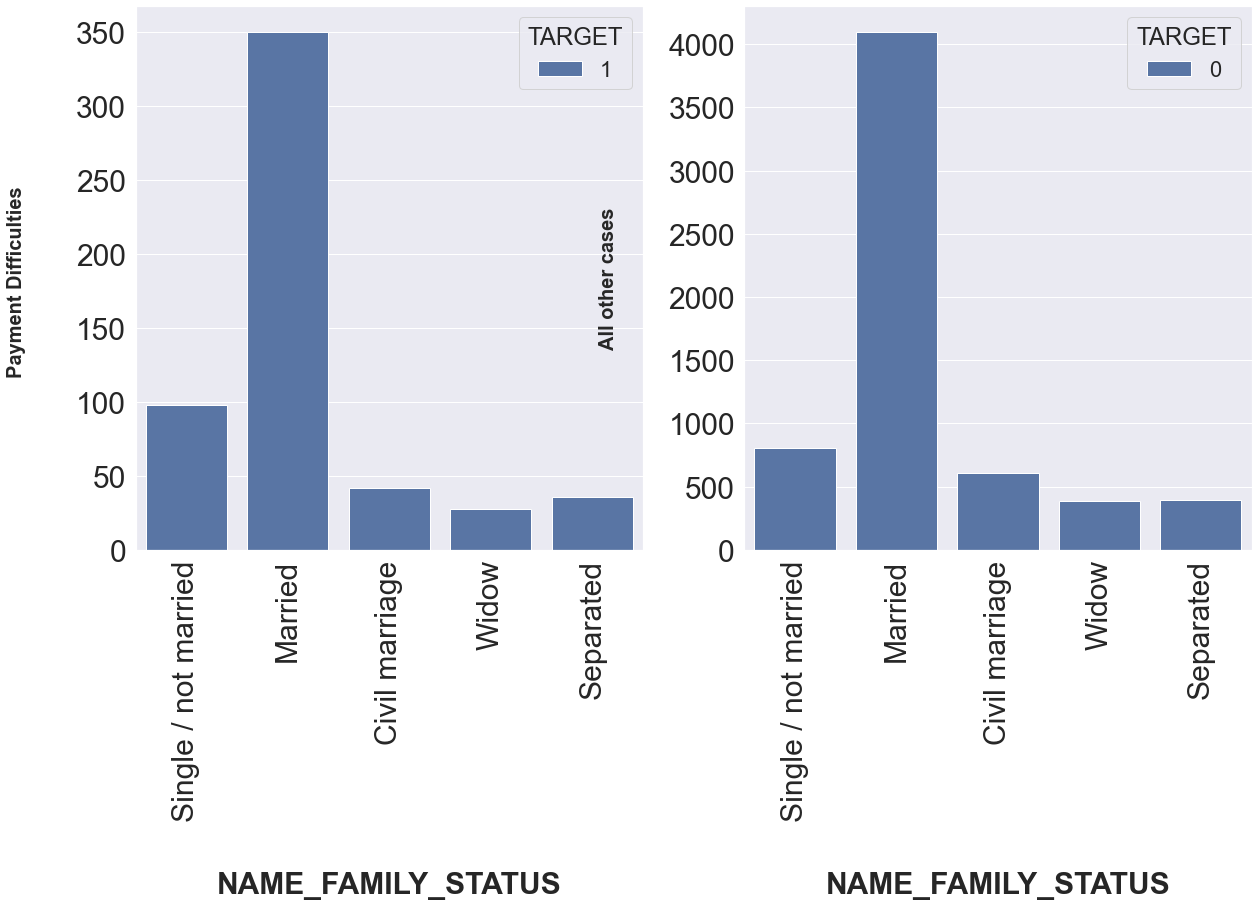

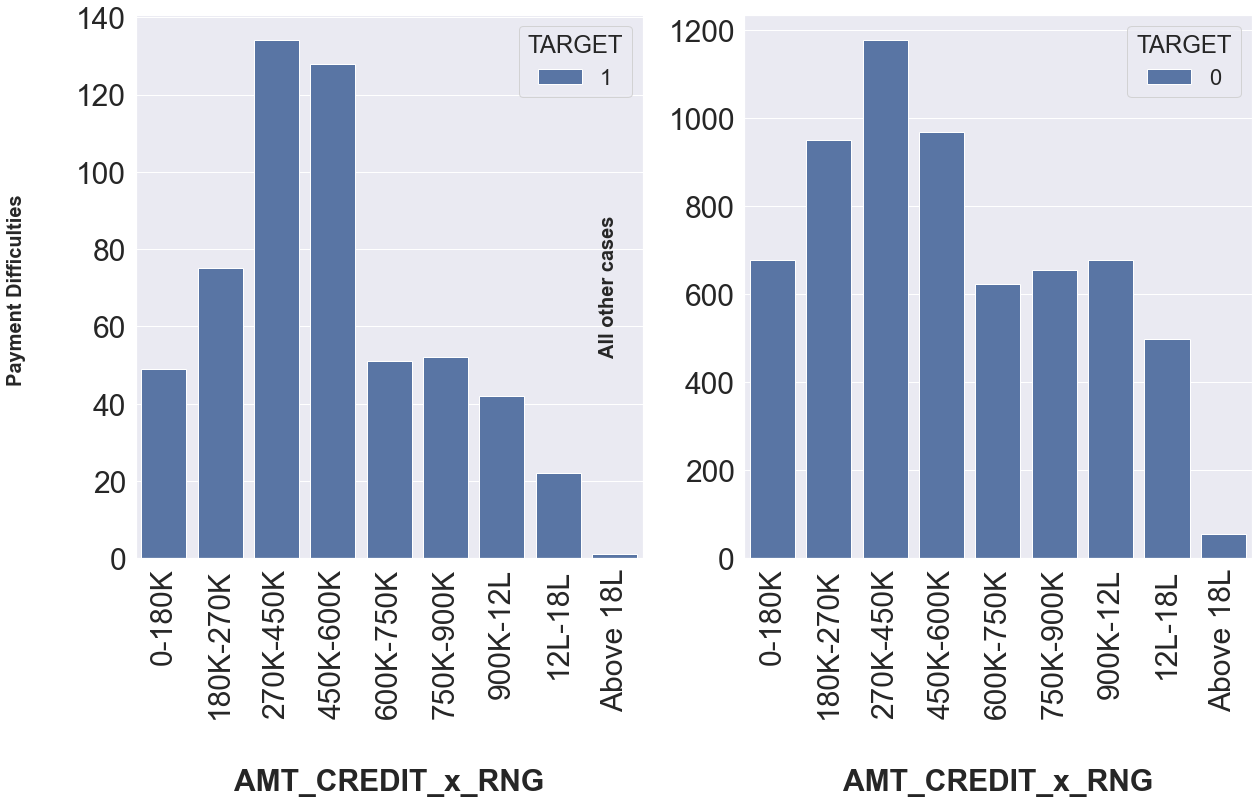

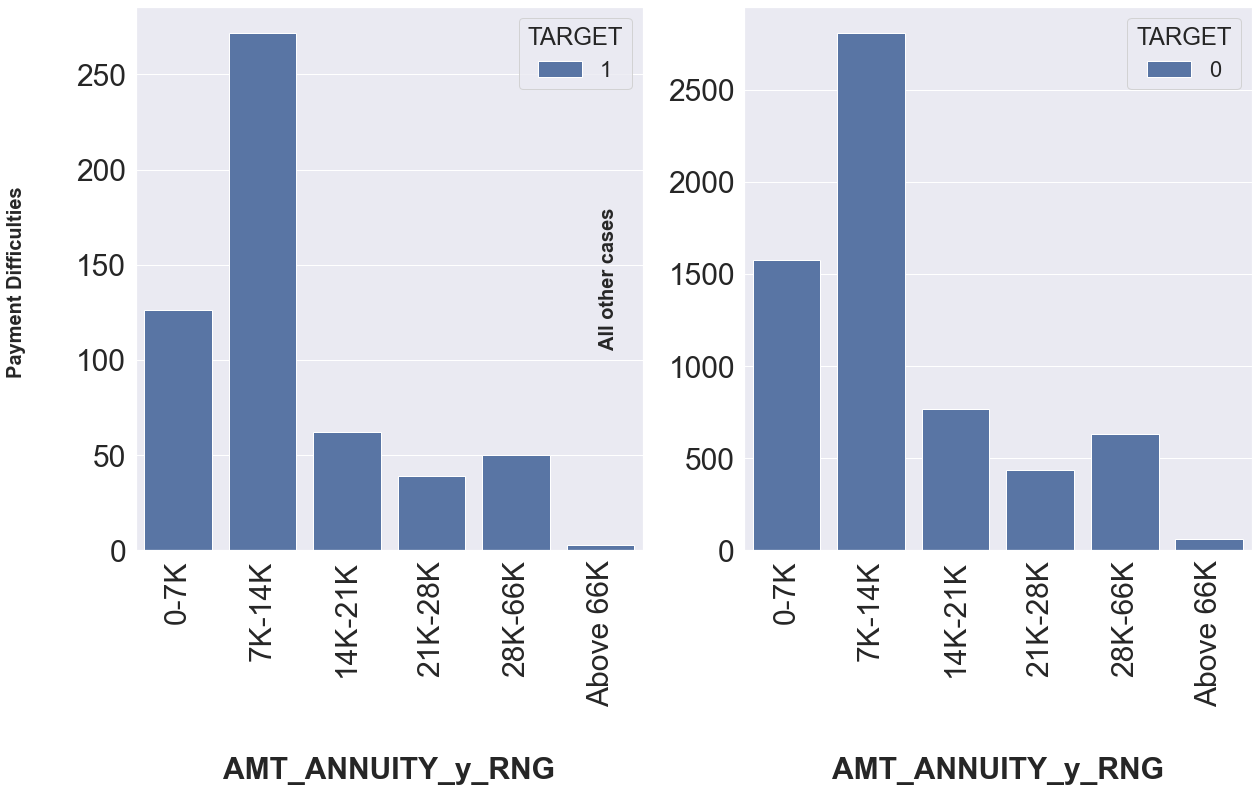

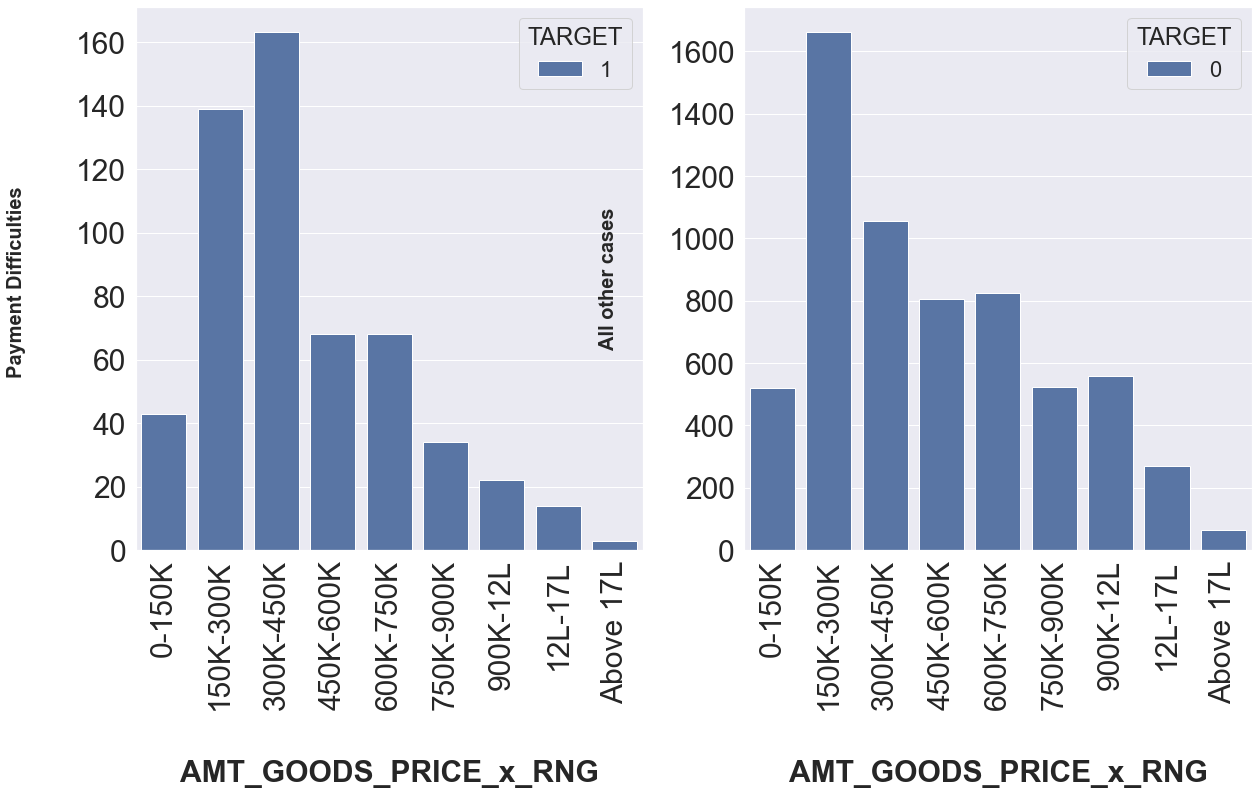

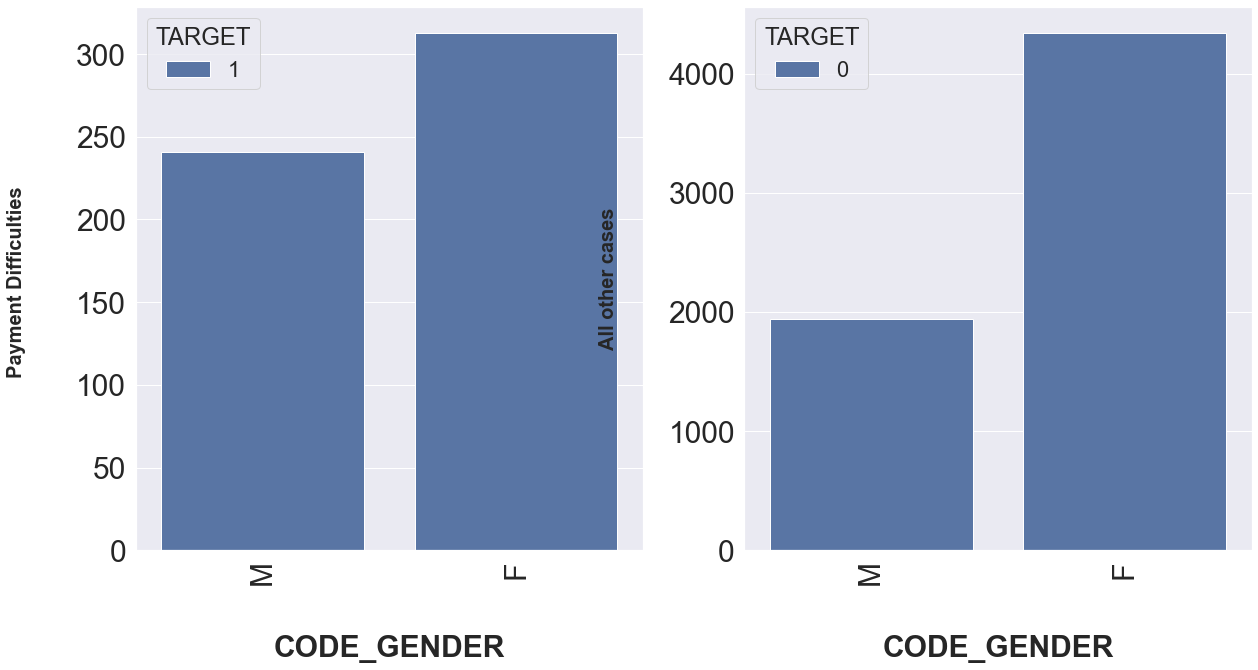

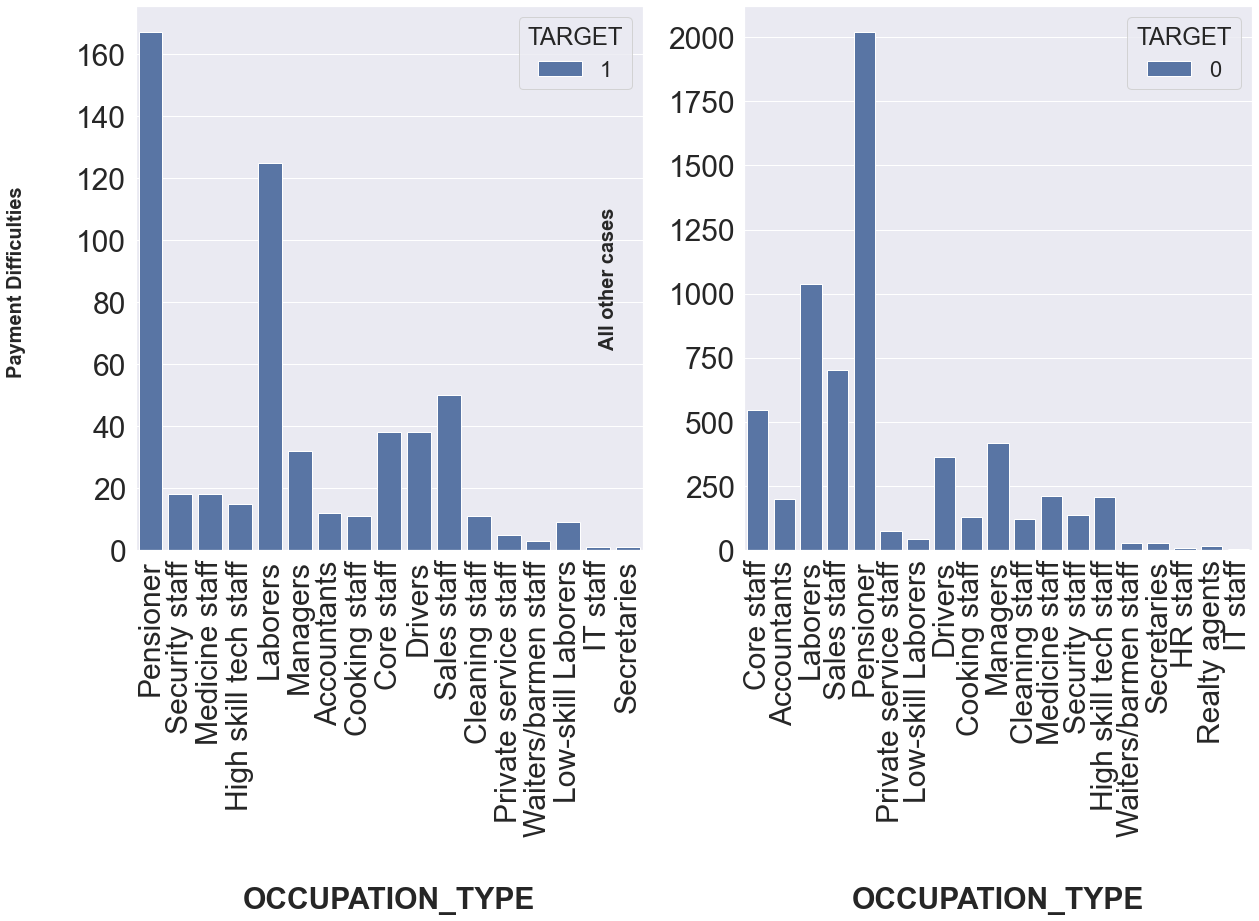

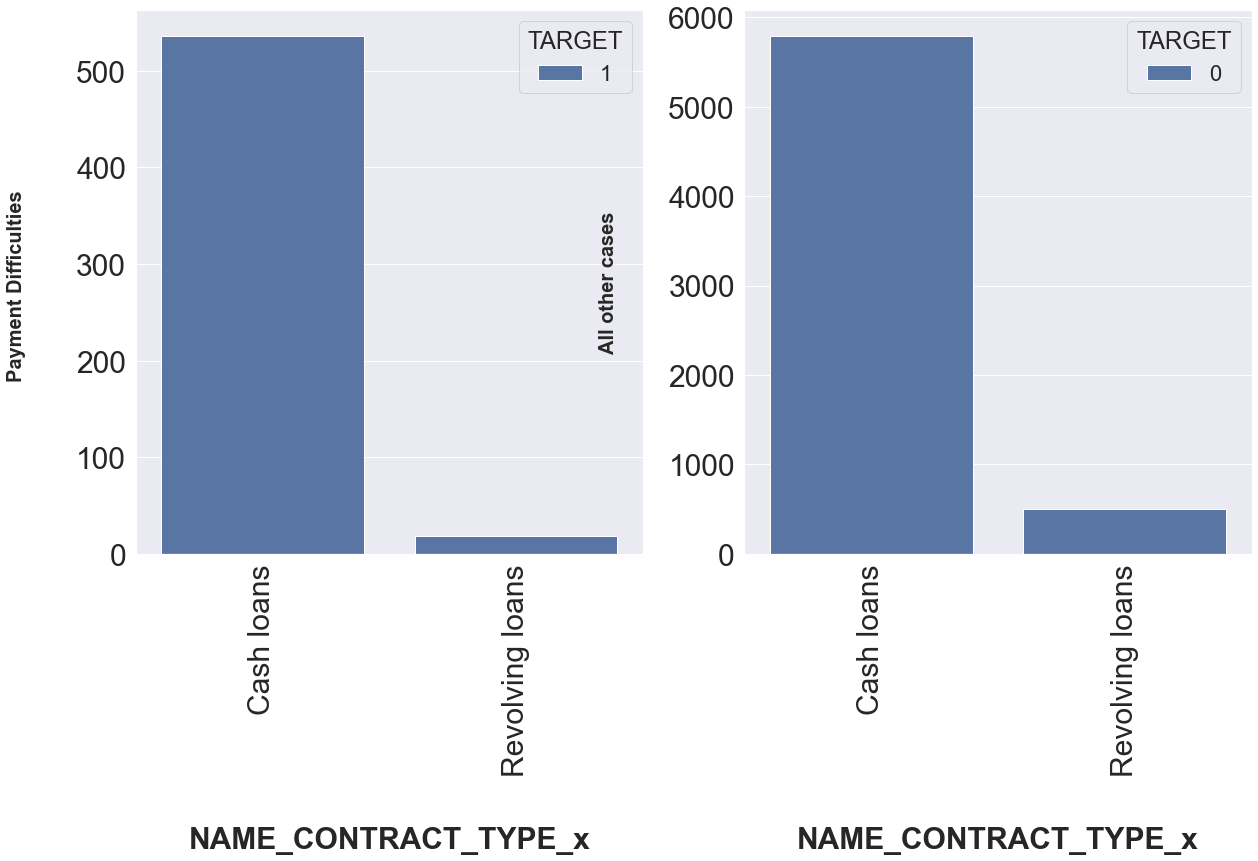

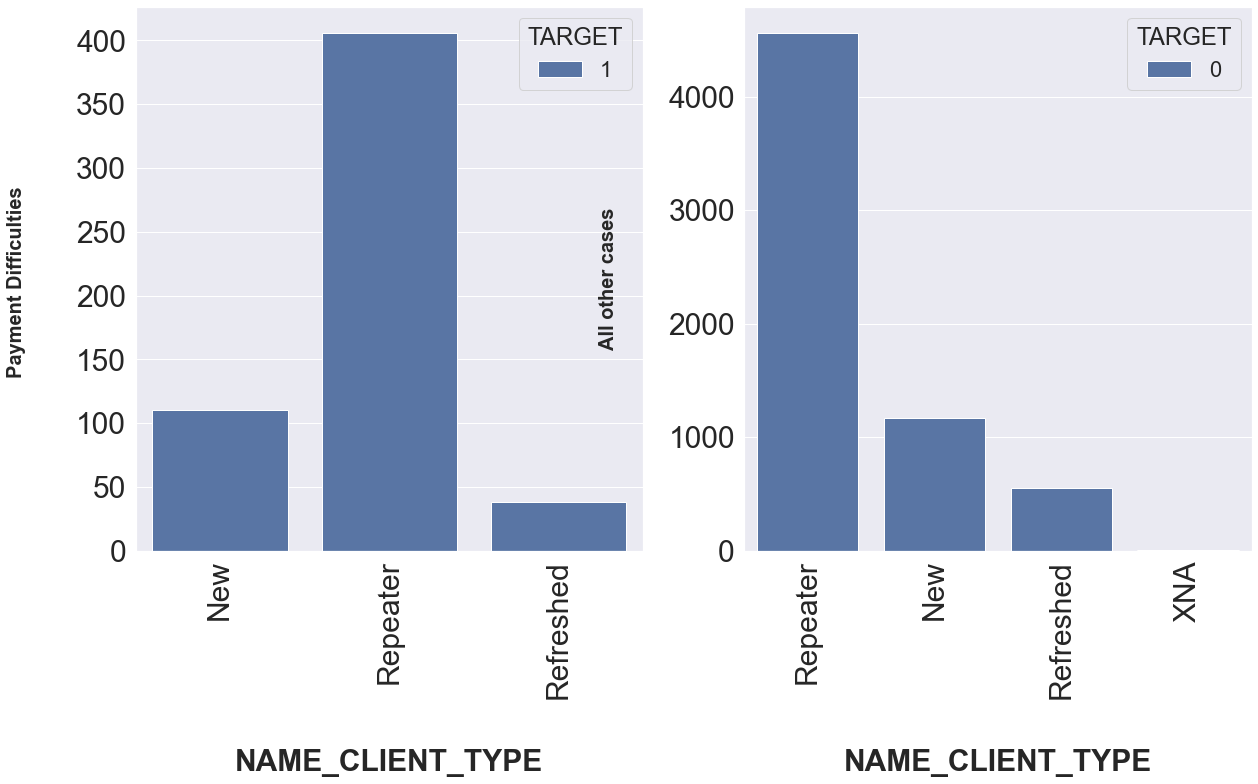

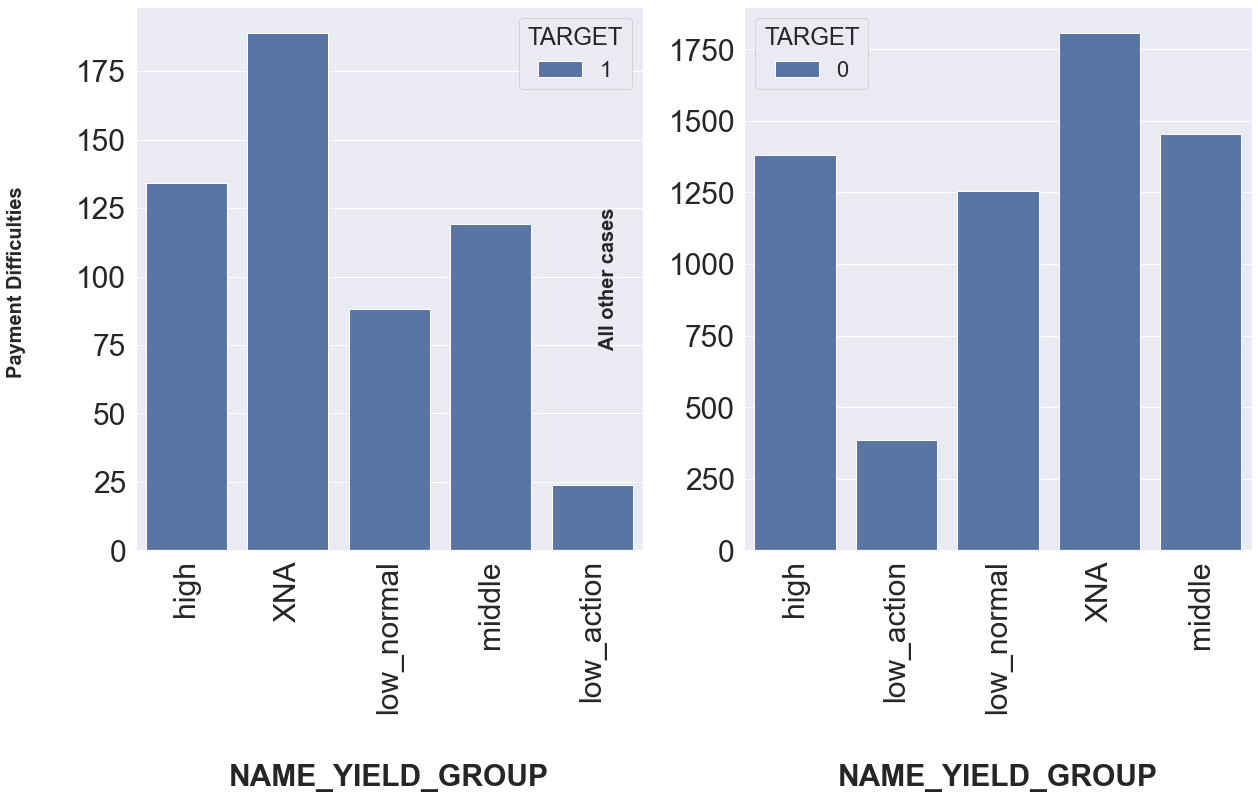

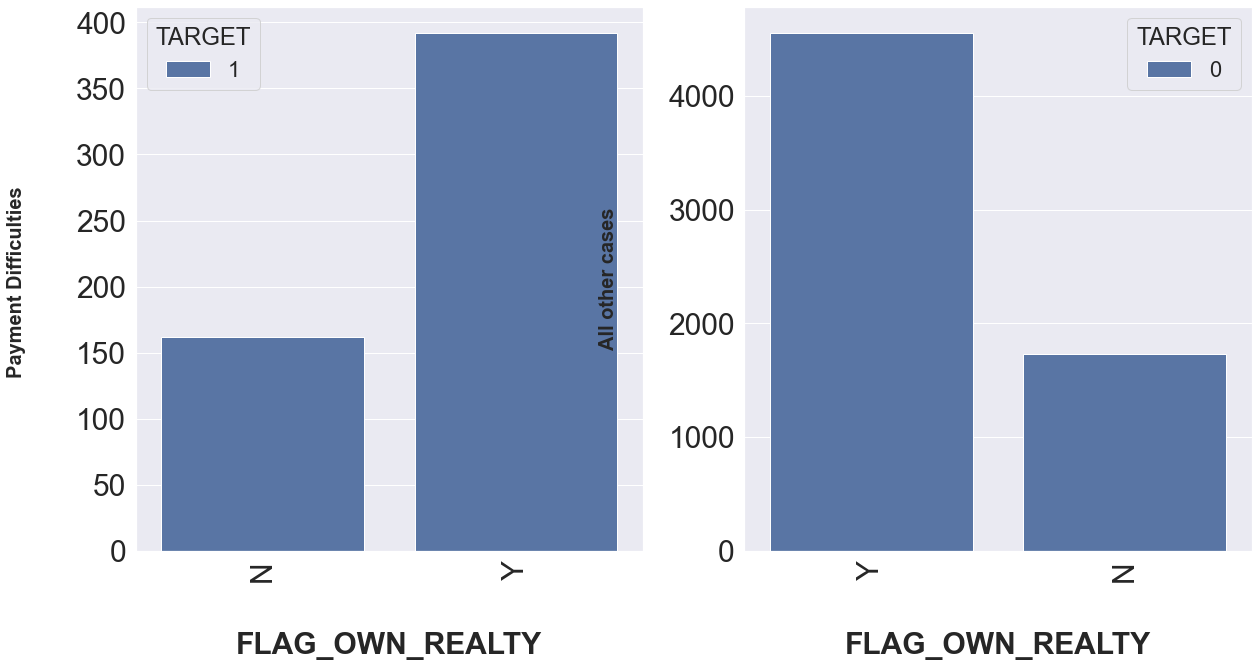

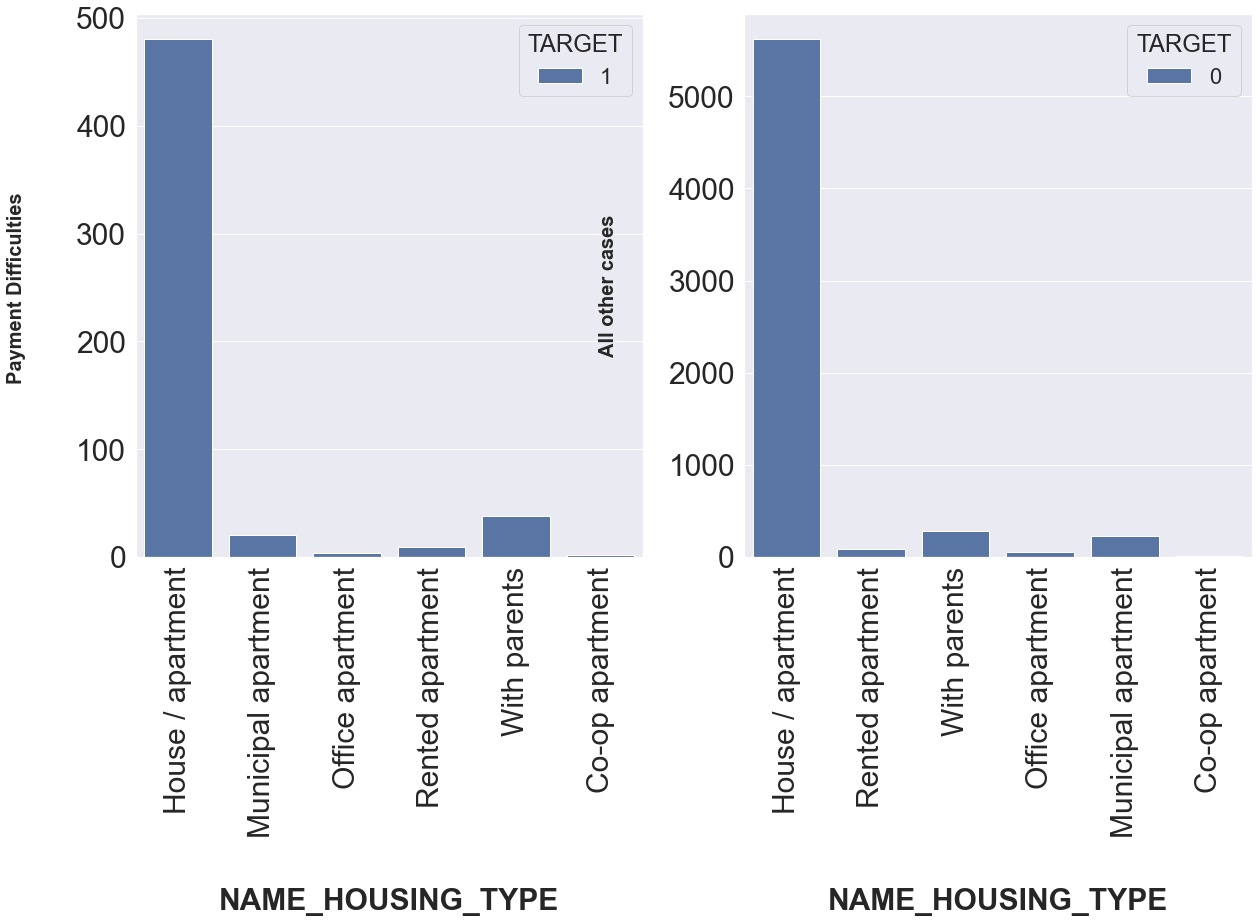

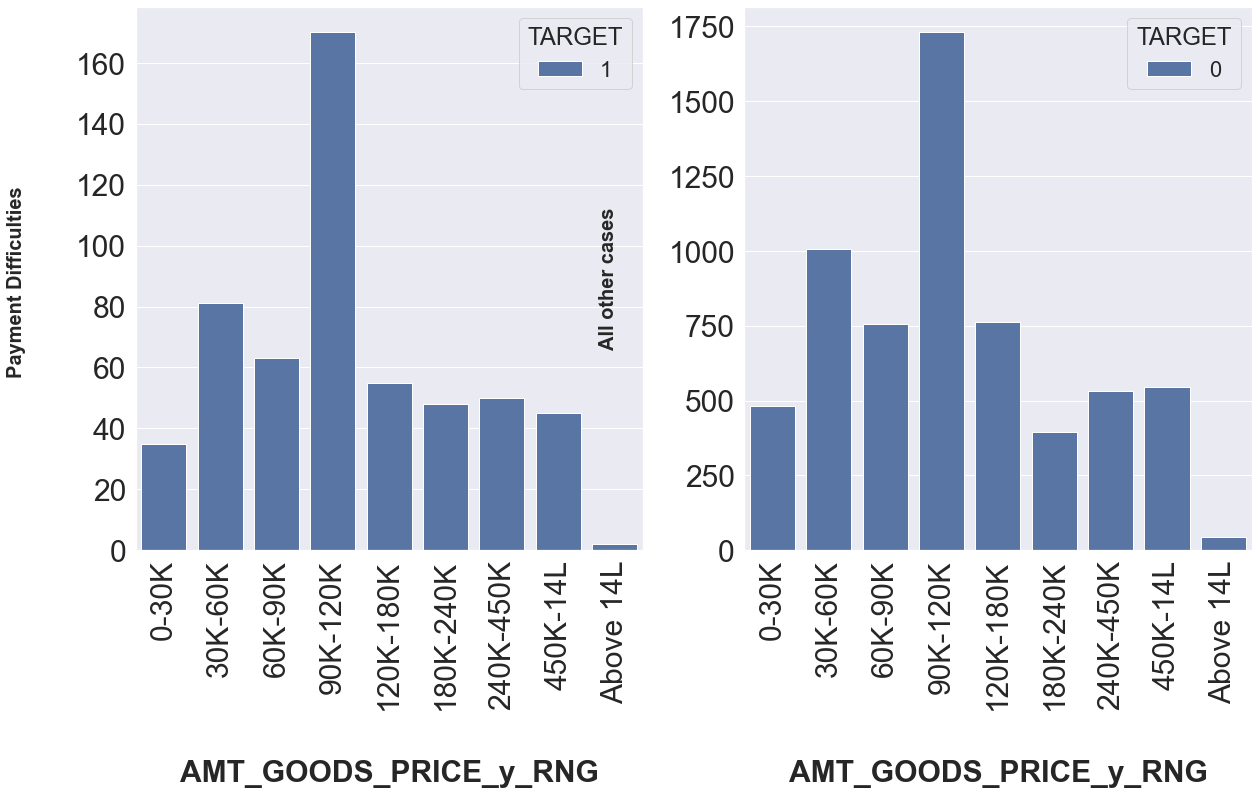

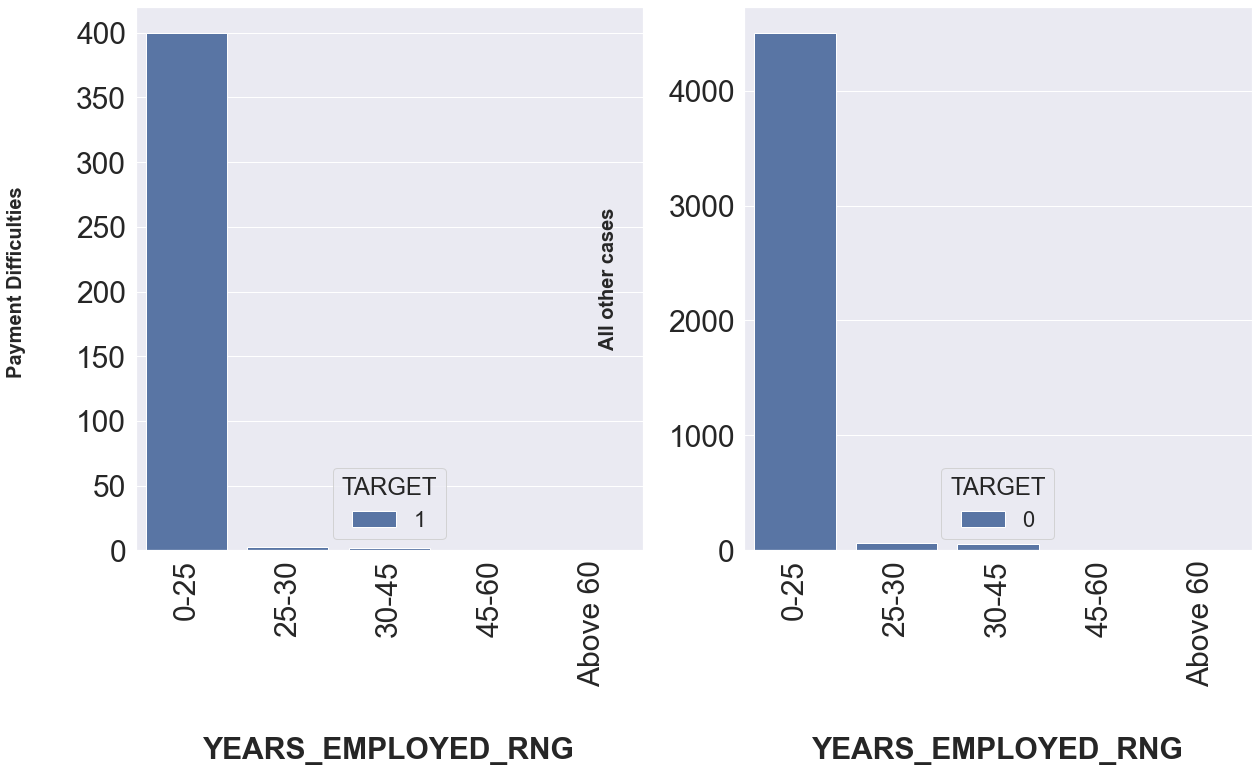

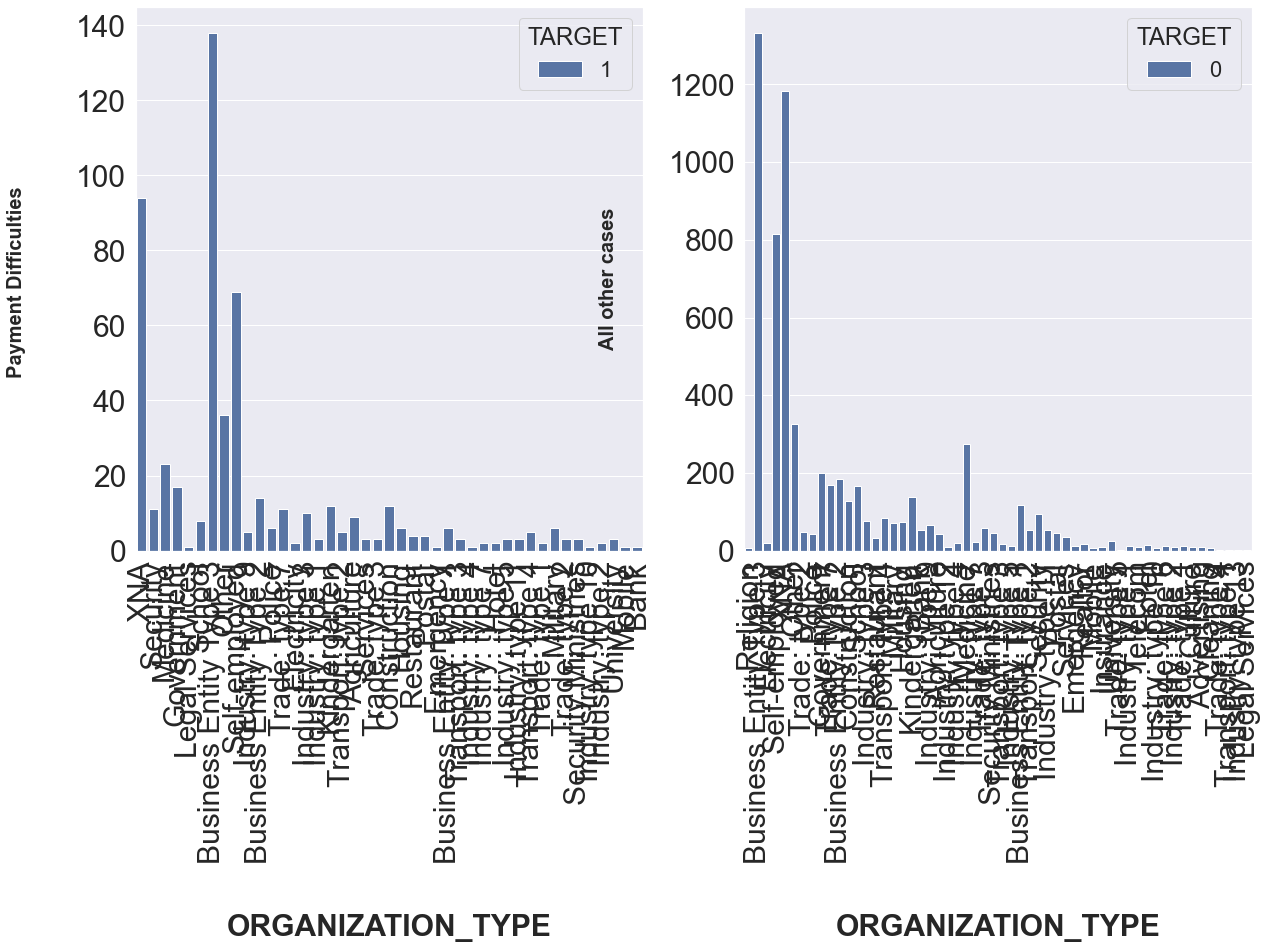

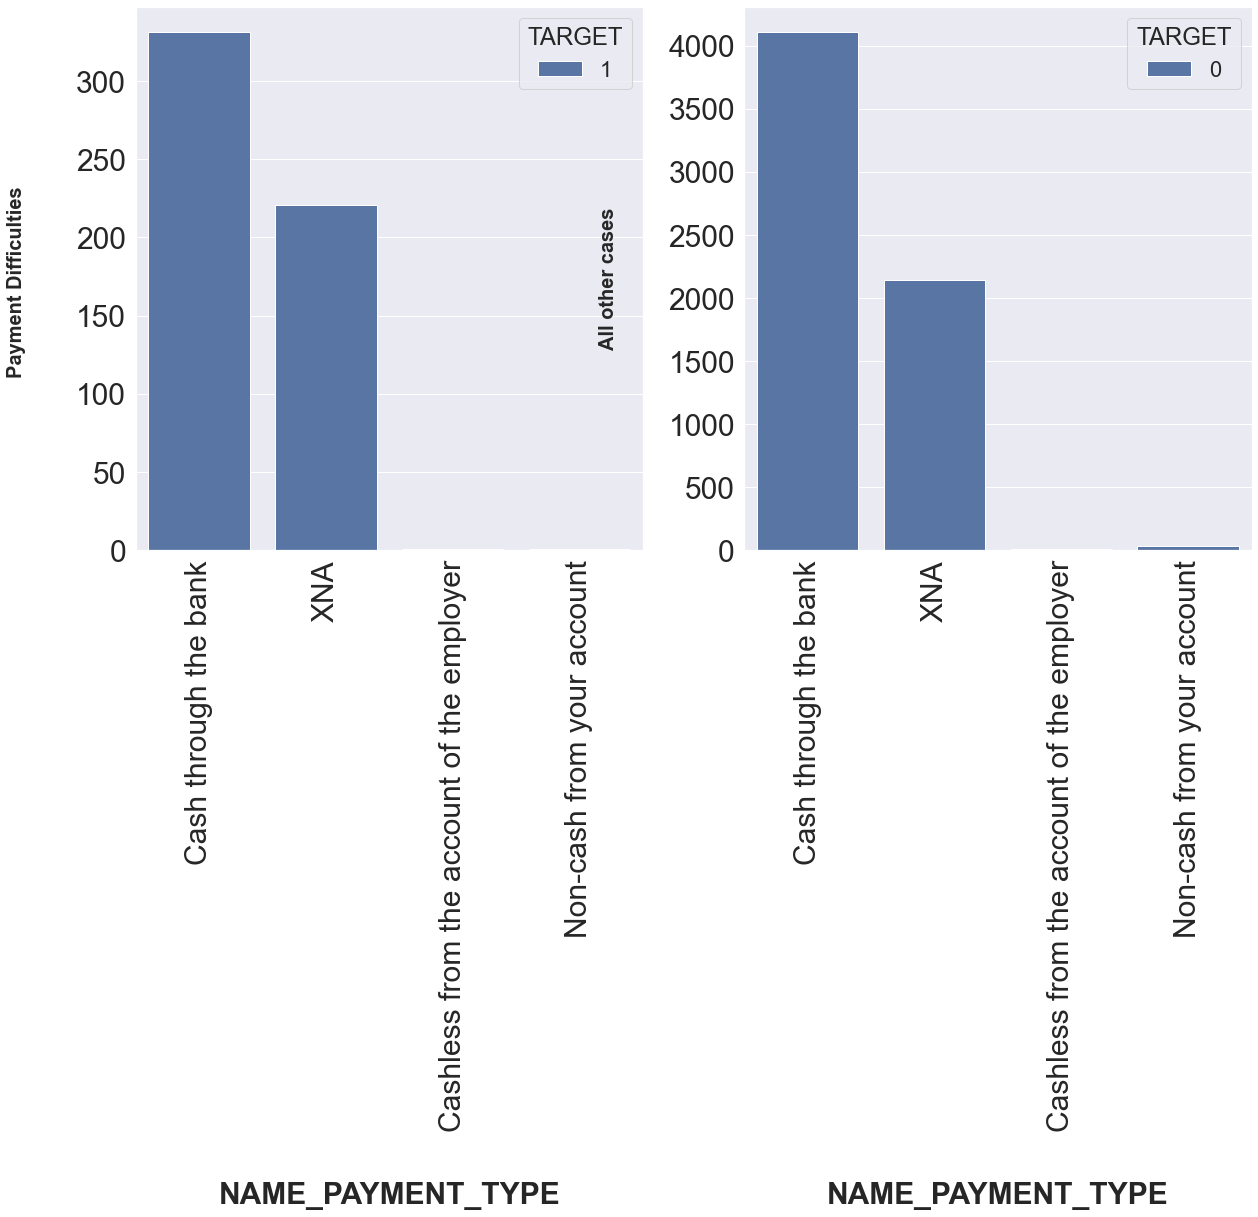

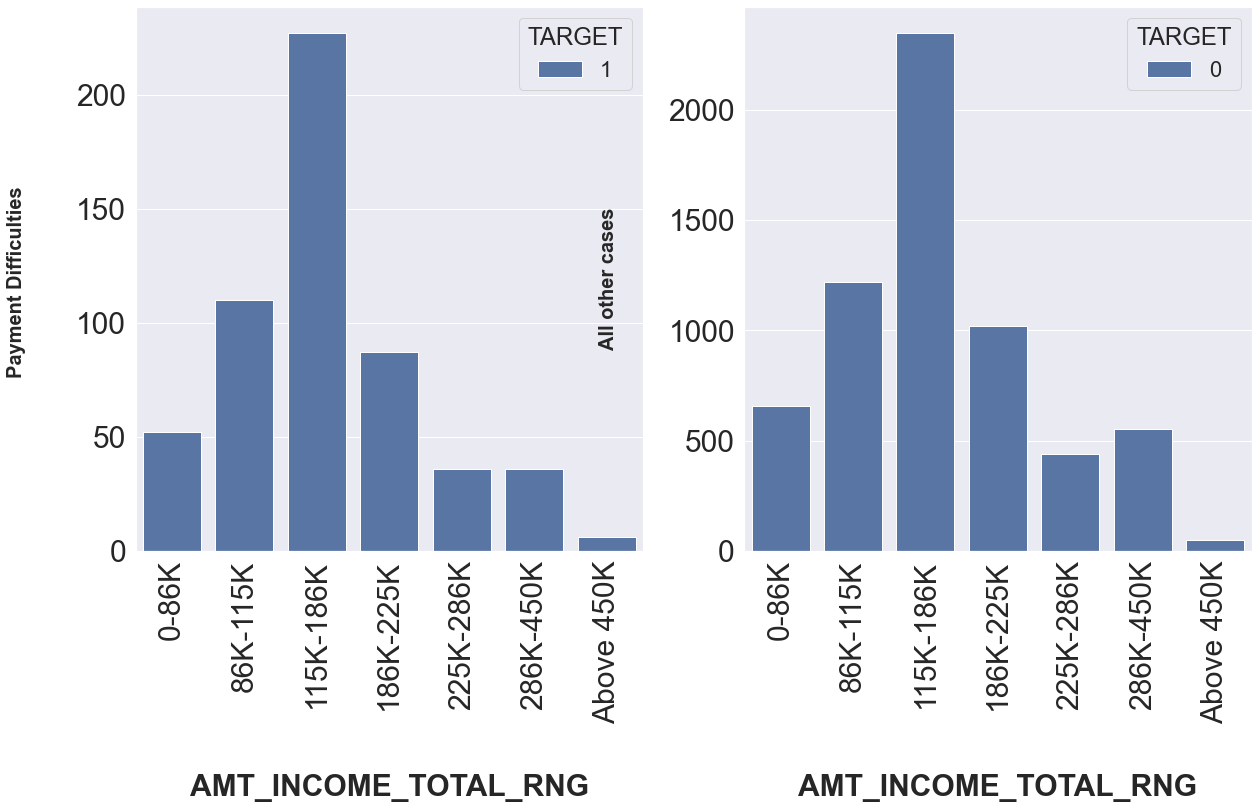

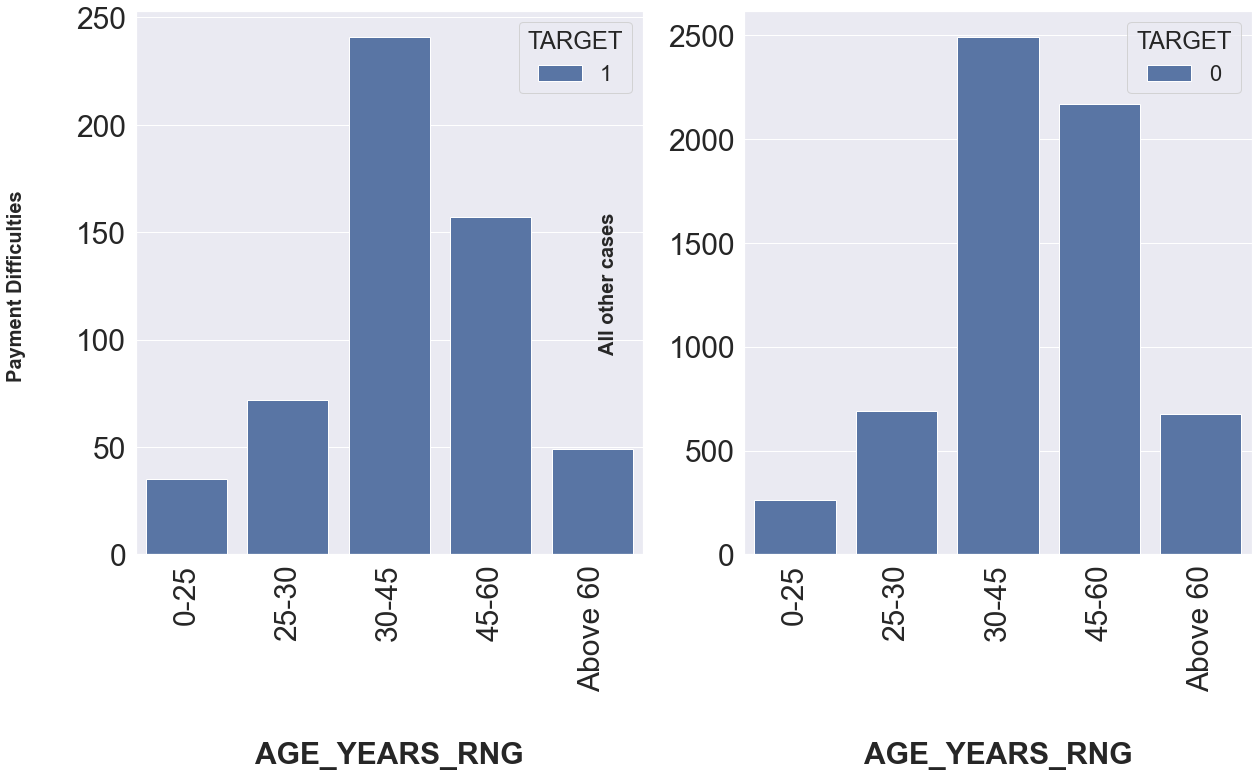

In [68]:
for i in object_dt:
    seg_plot(i)

In [69]:
#bivariate analysis

In [70]:
#Creating plot for Segmented Univarite Analysis
def bivar_plot(col):
    plt.figure(figsize=(20,10))
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 1)
    sns.countplot(col, data=target1, hue='CODE_GENDER') 
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('TARGET 1', fontsize= 20, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 2)
    sns.countplot(col, data=target0, hue='CODE_GENDER')
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel("TARGET 0", fontsize= 20, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    plt.show()

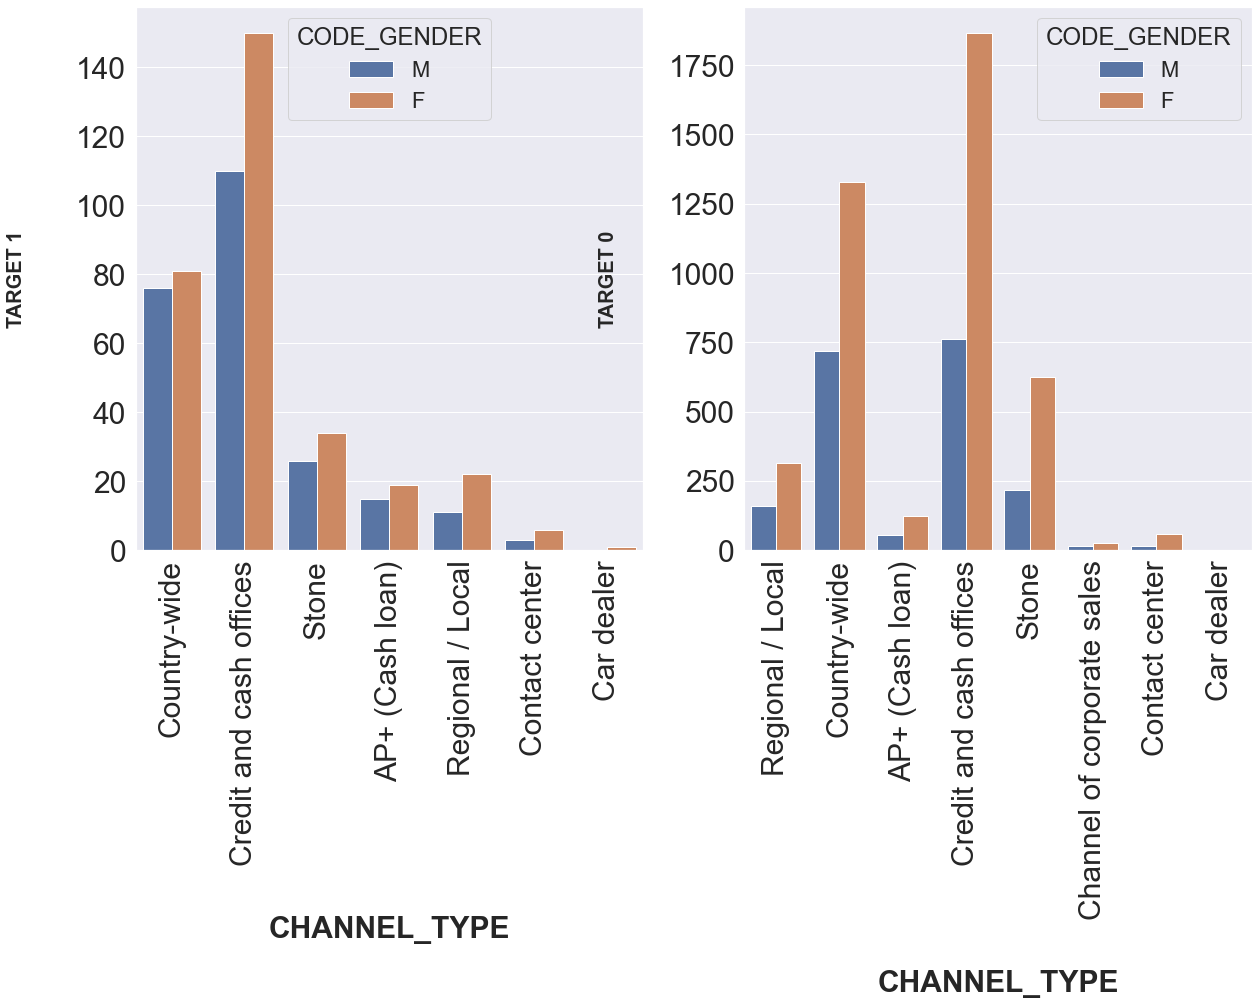

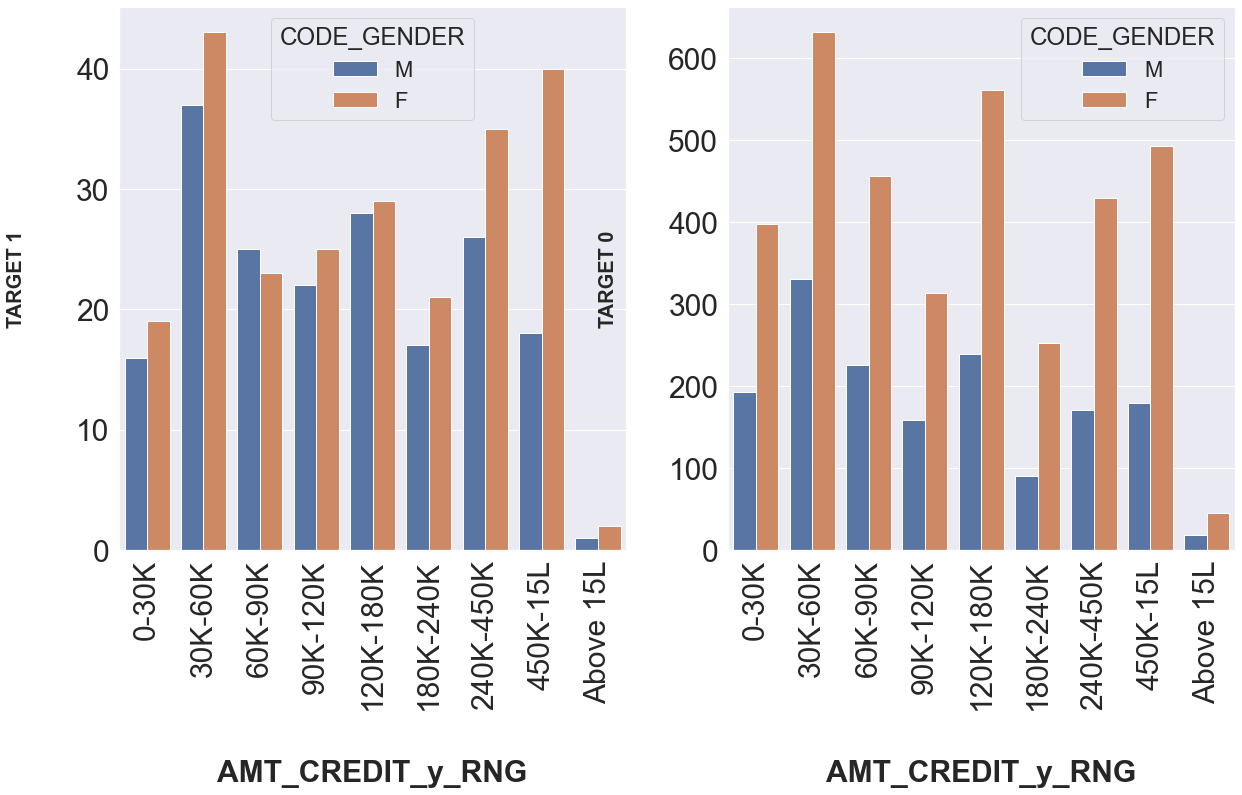

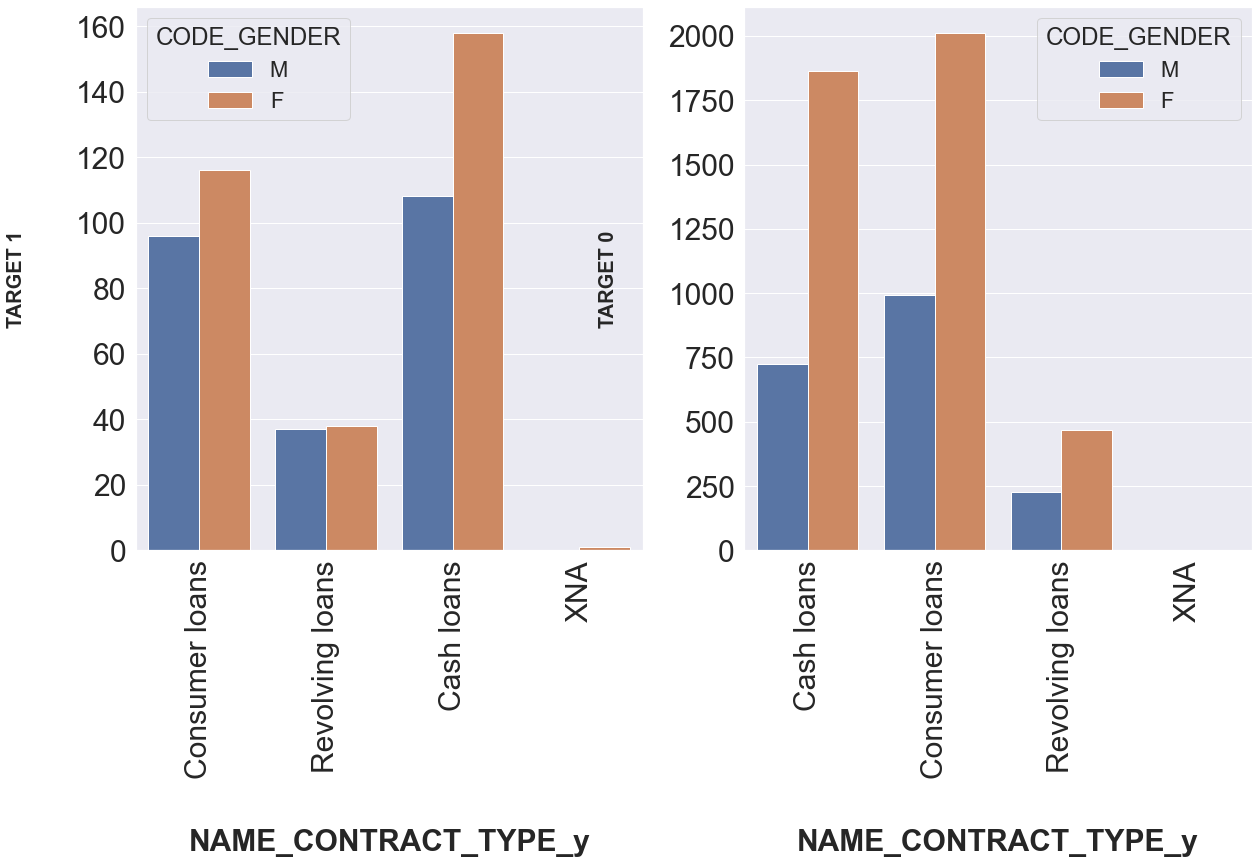

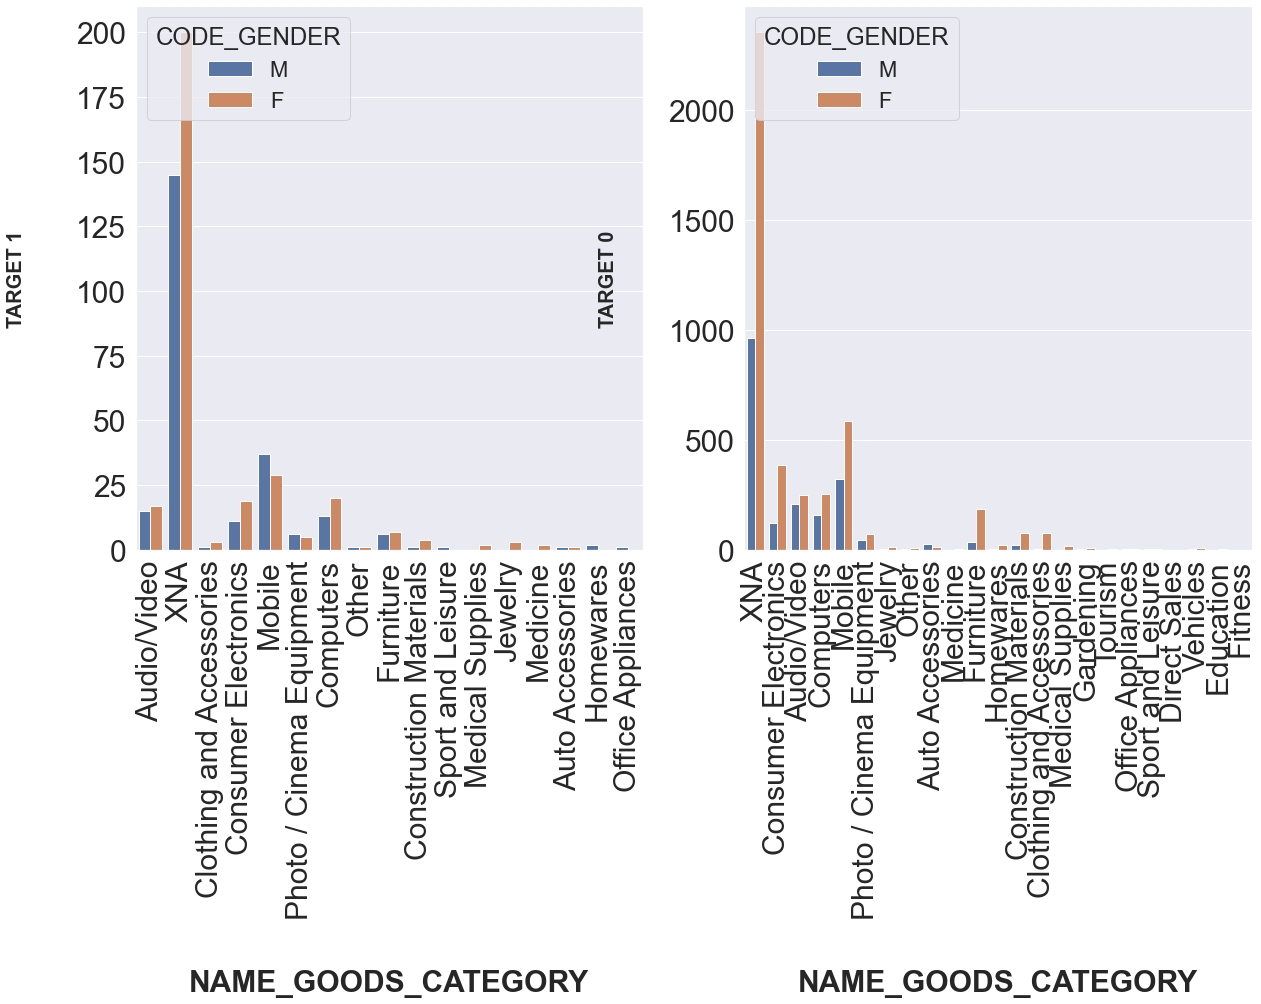

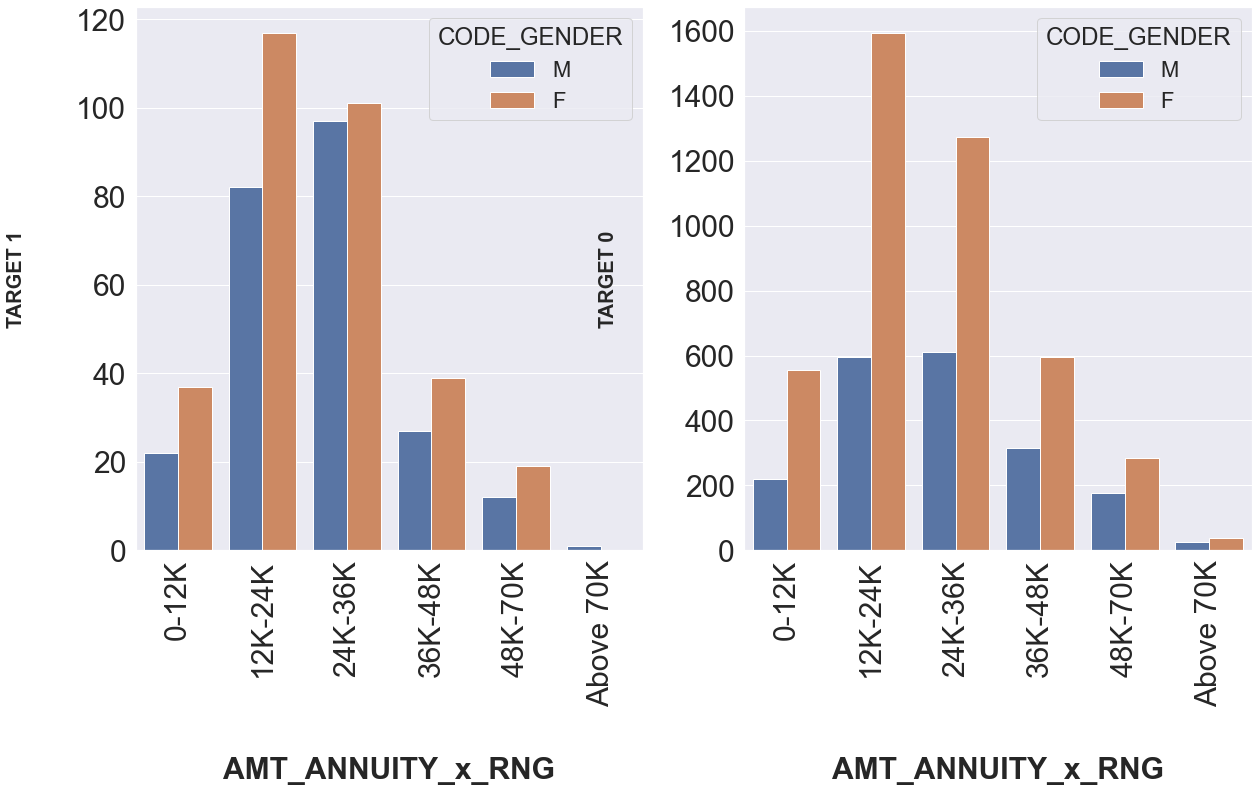

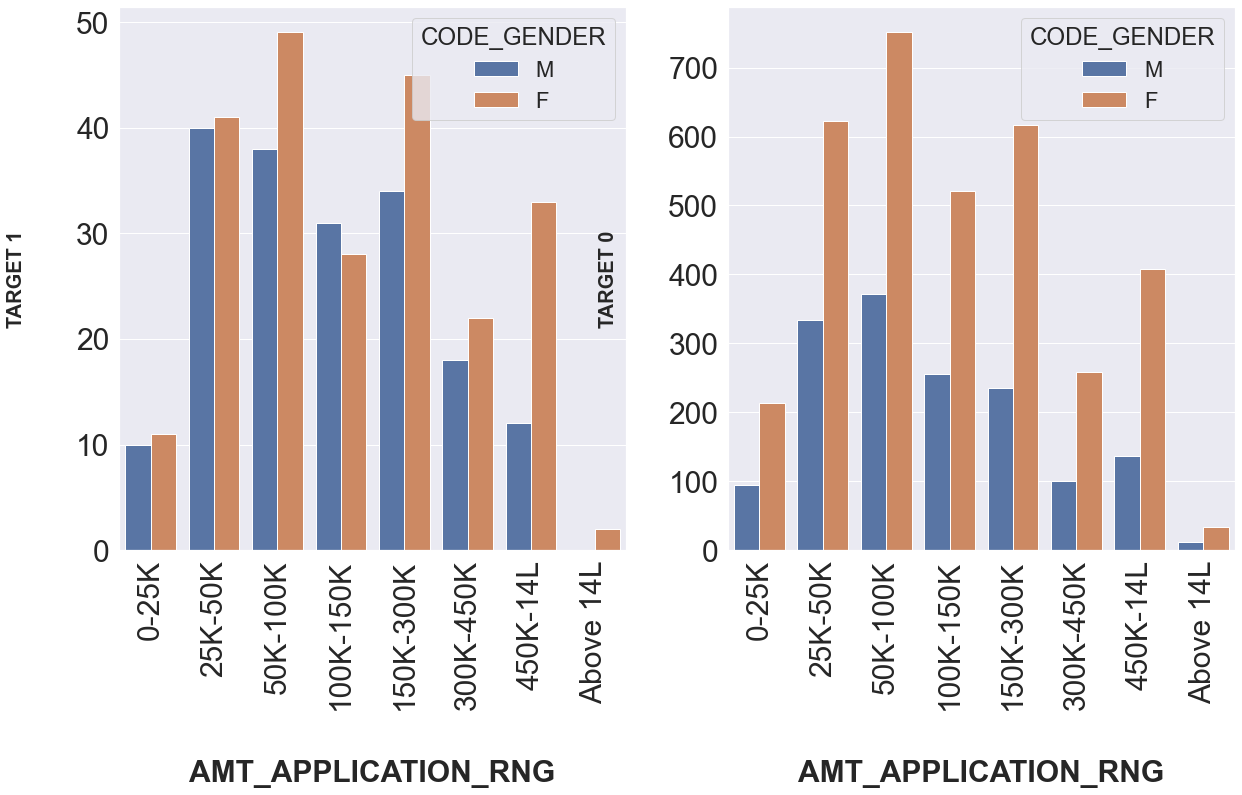

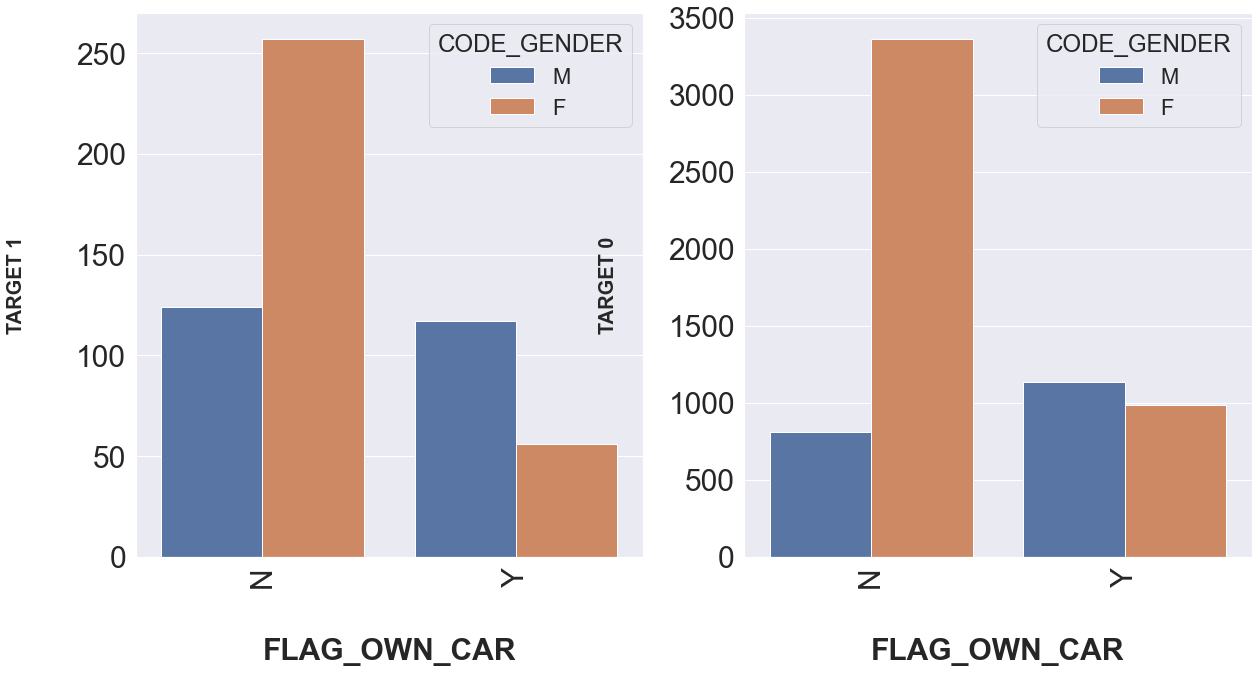

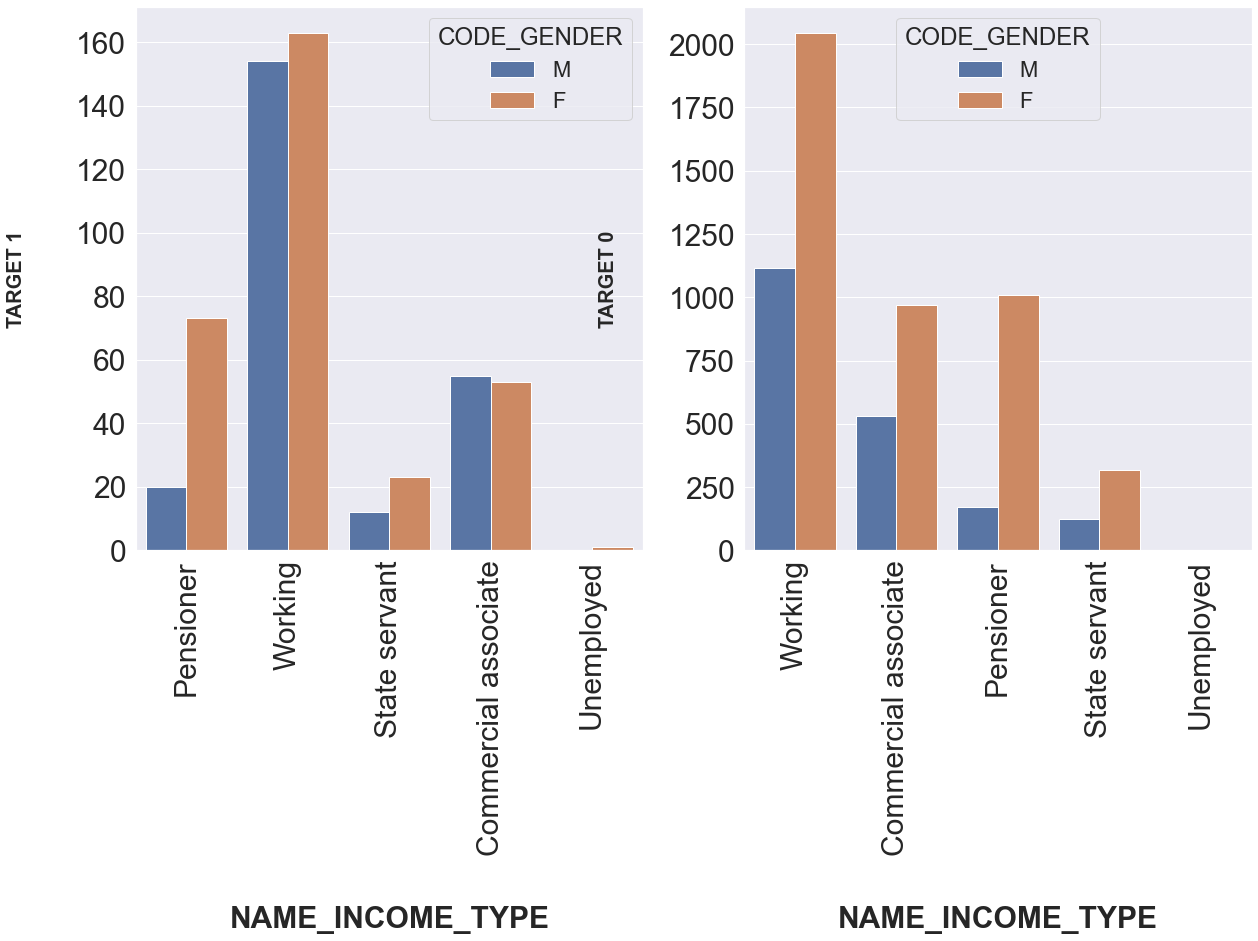

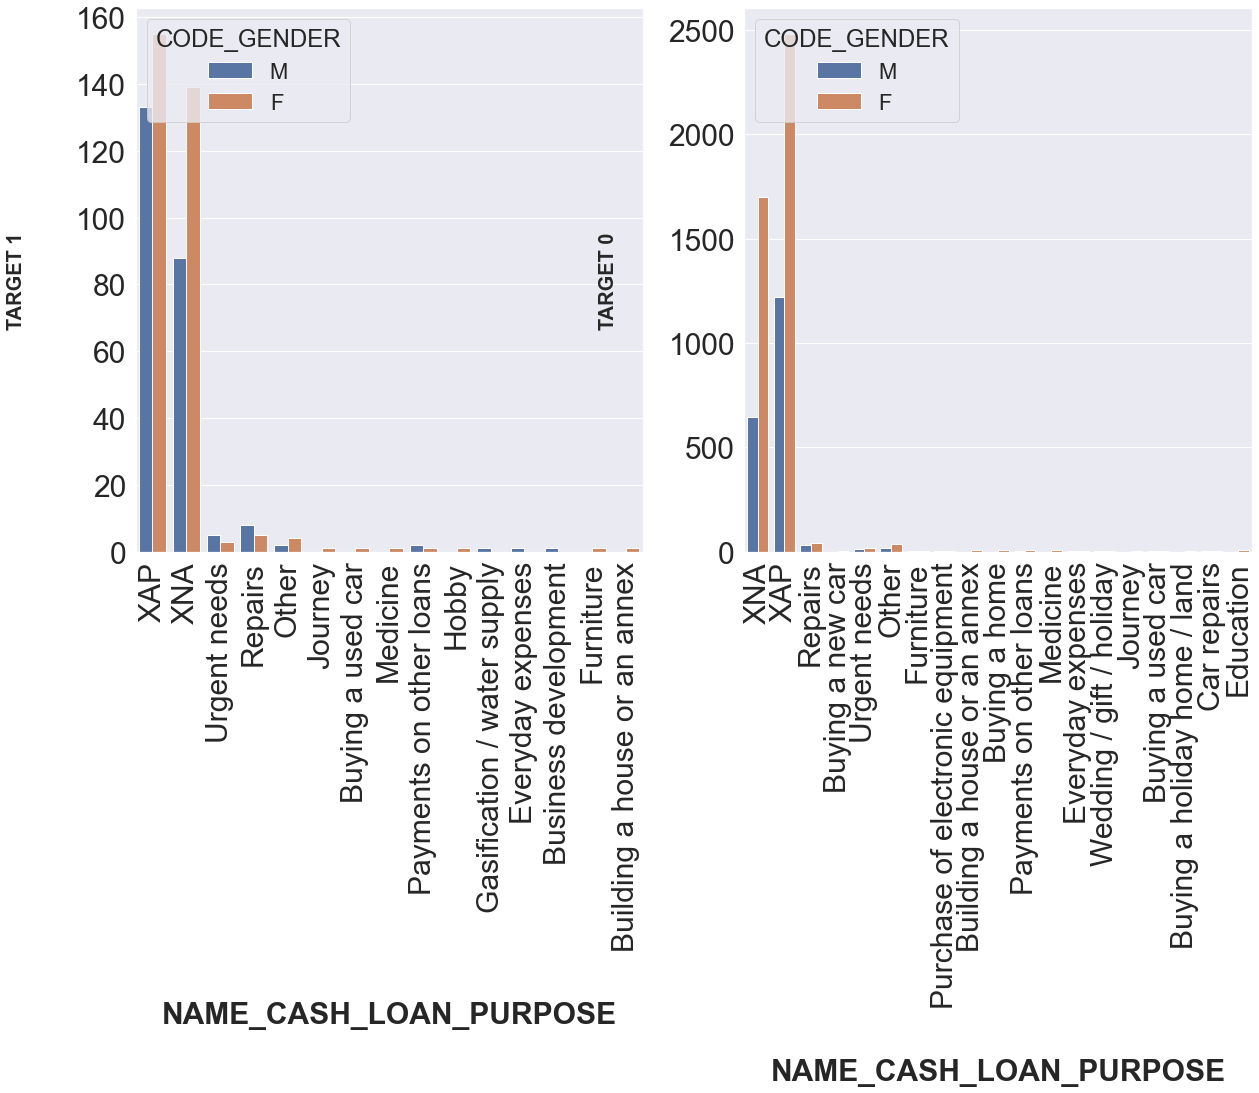

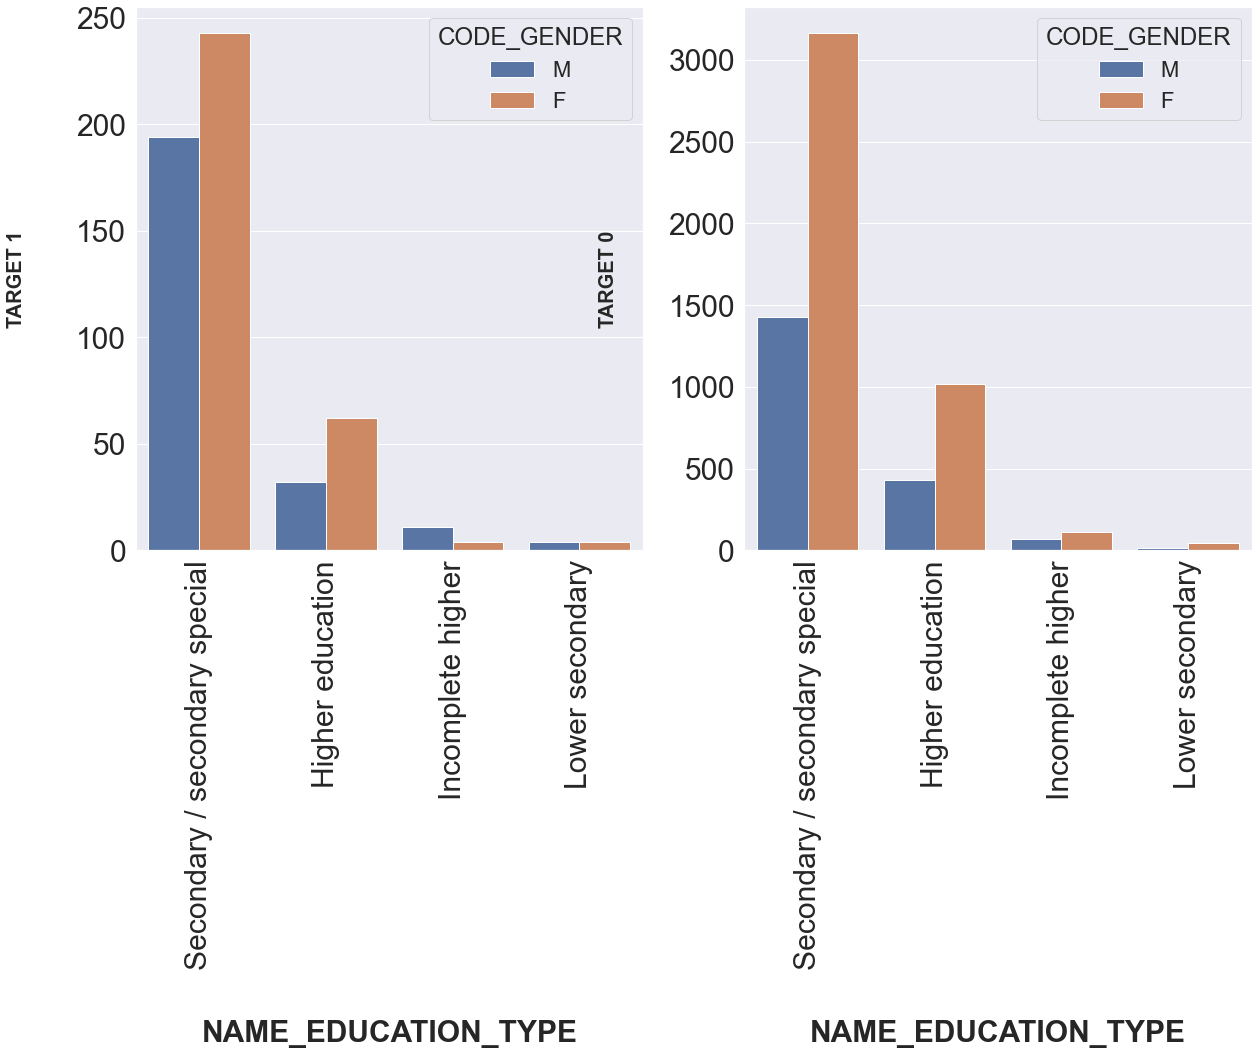

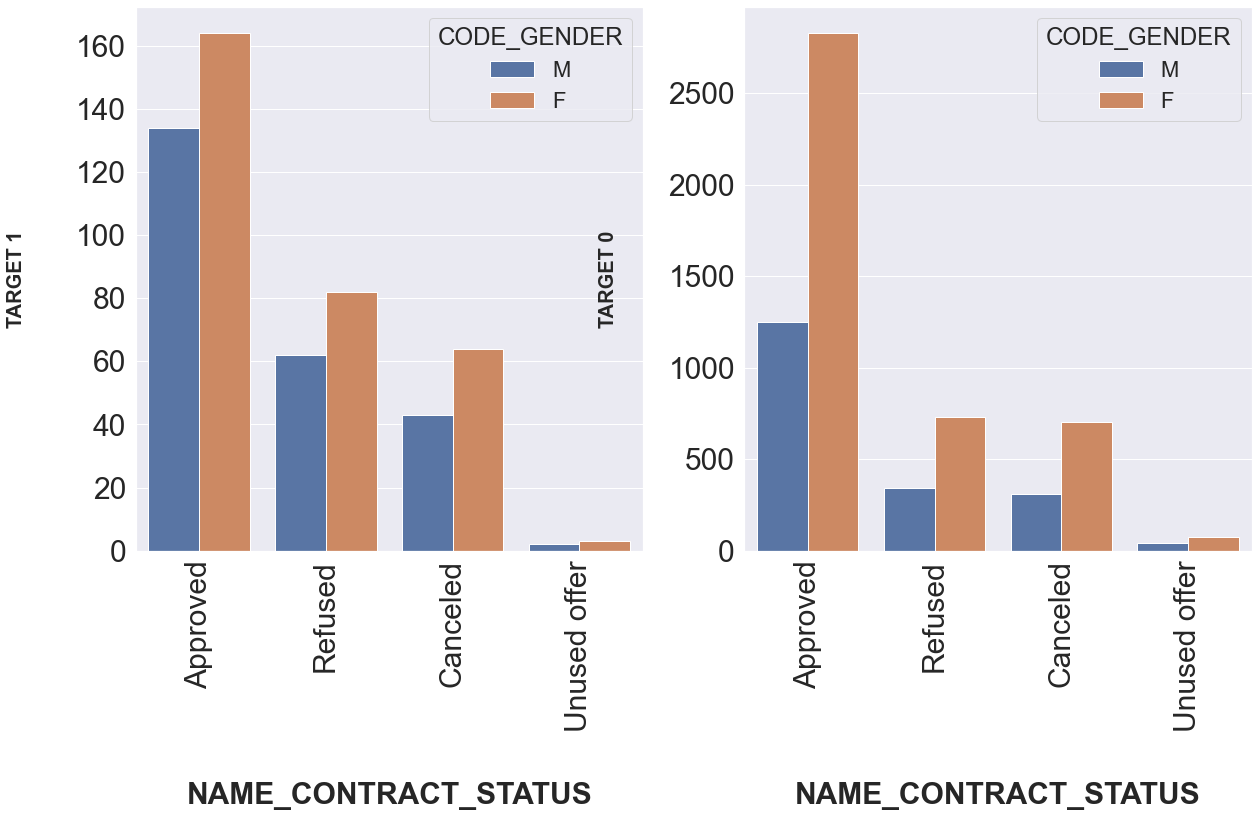

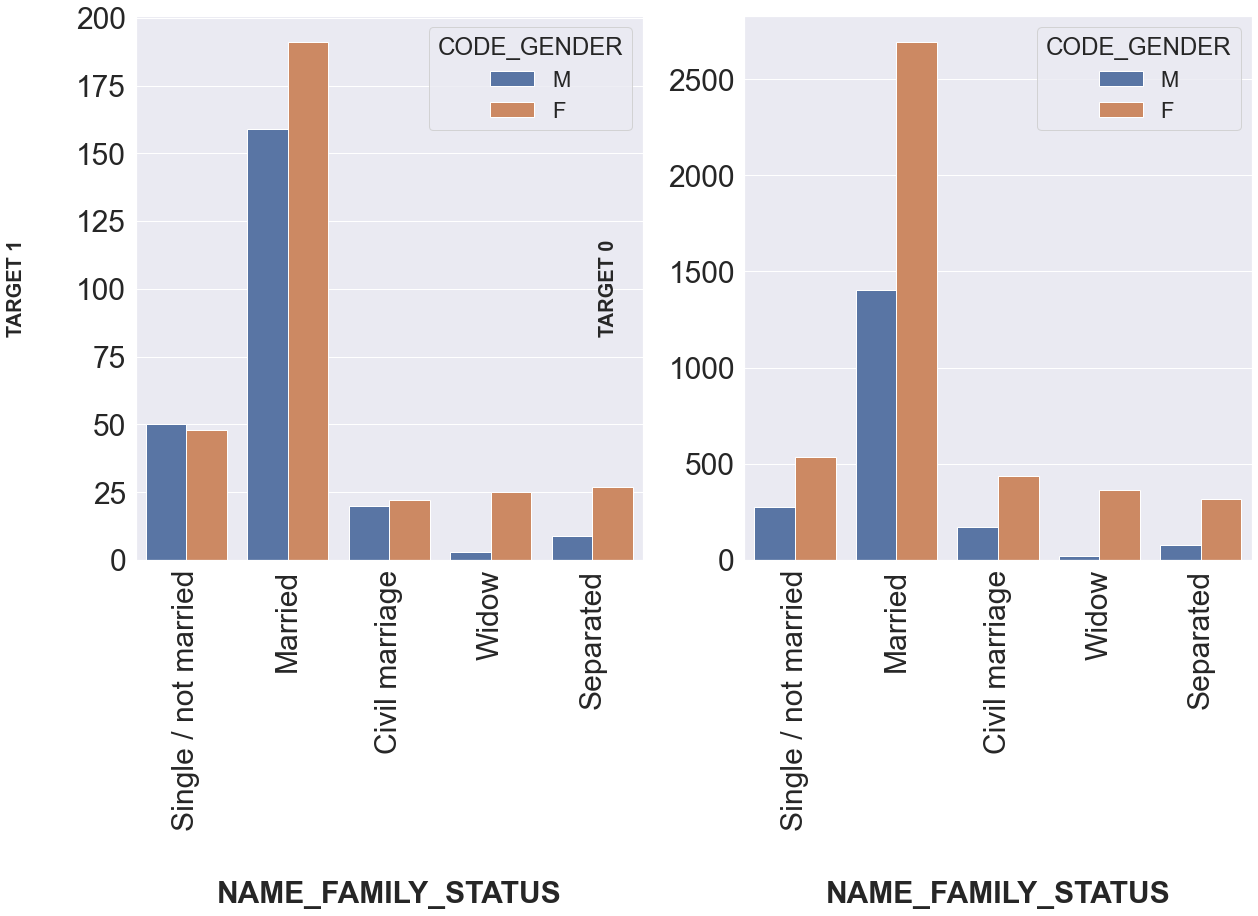

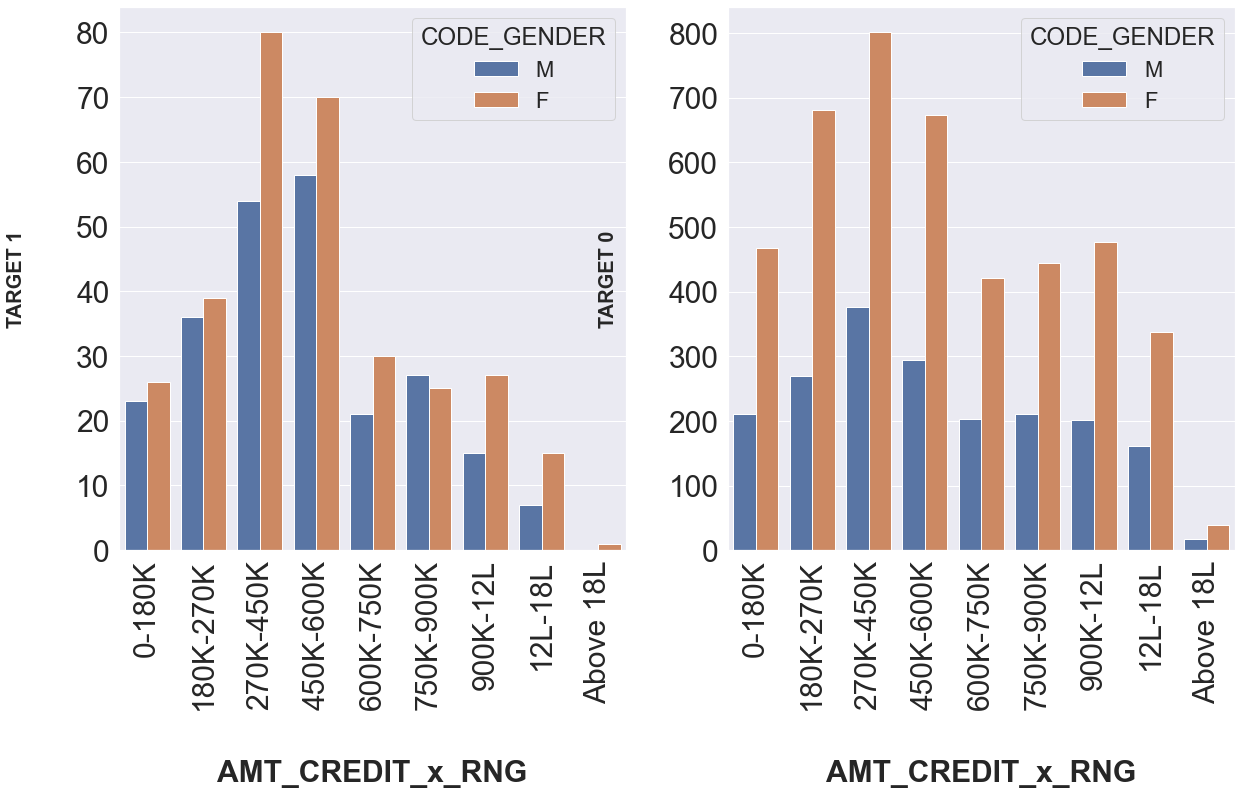

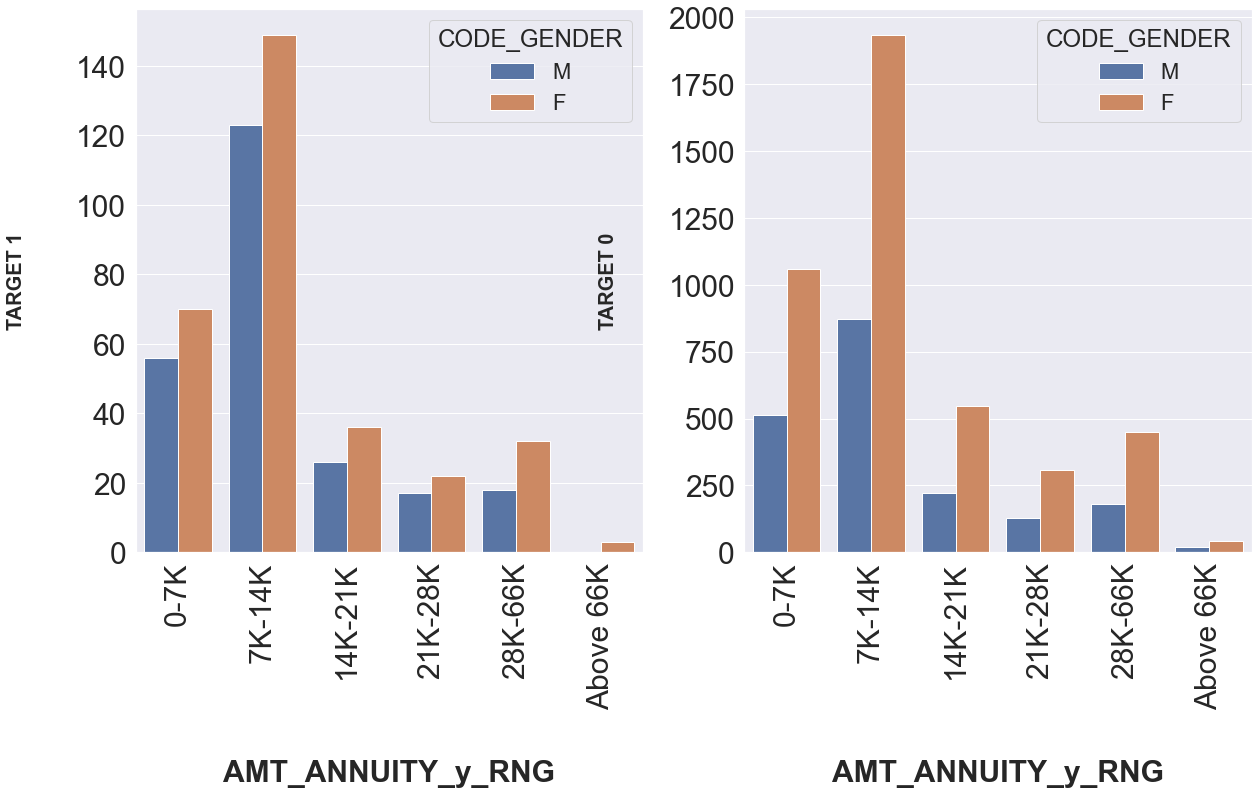

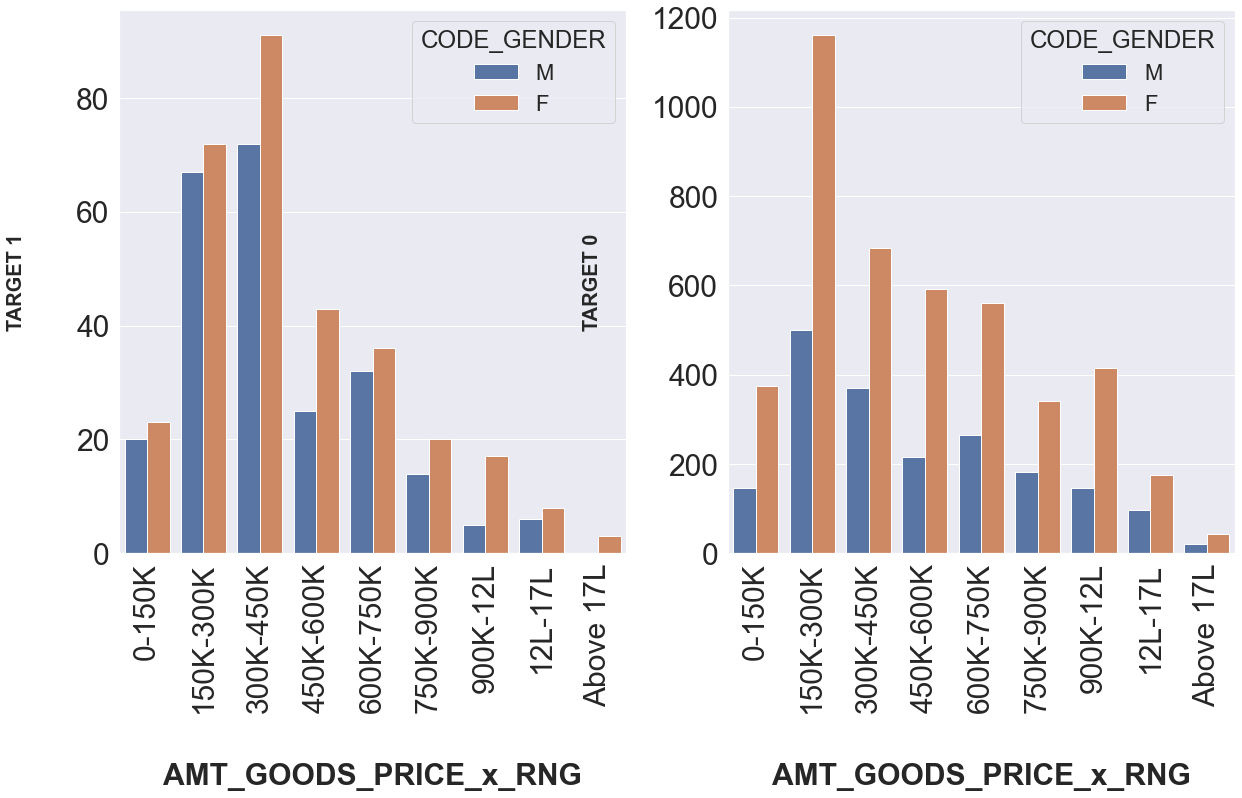

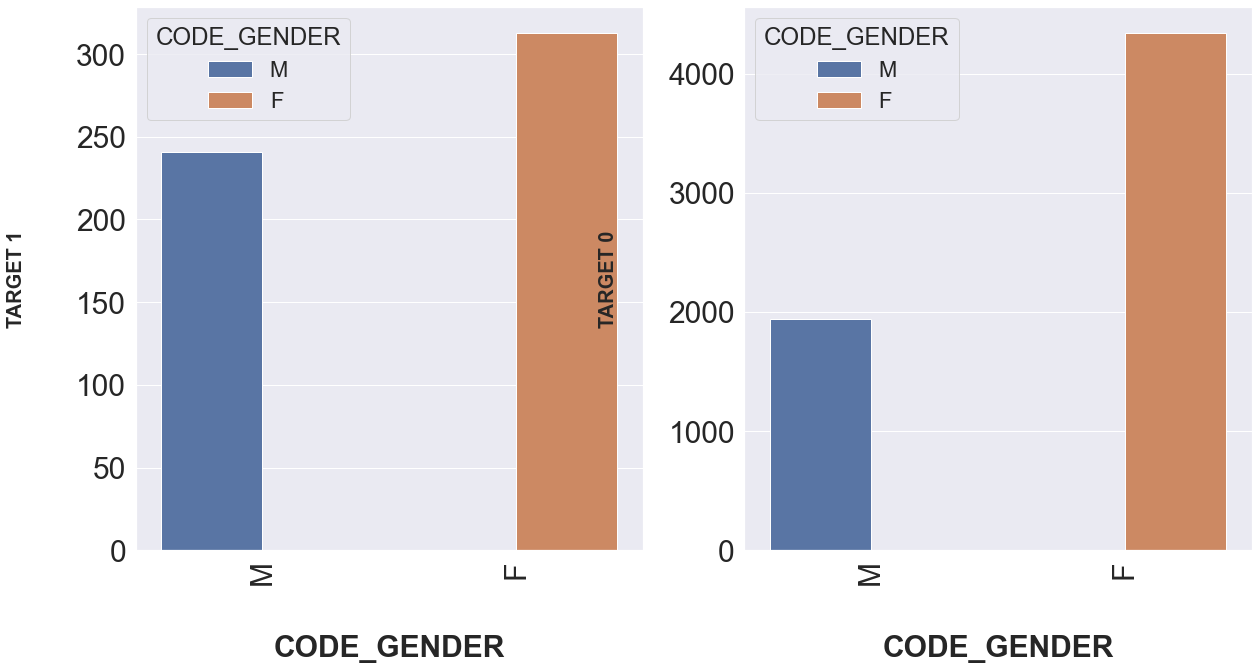

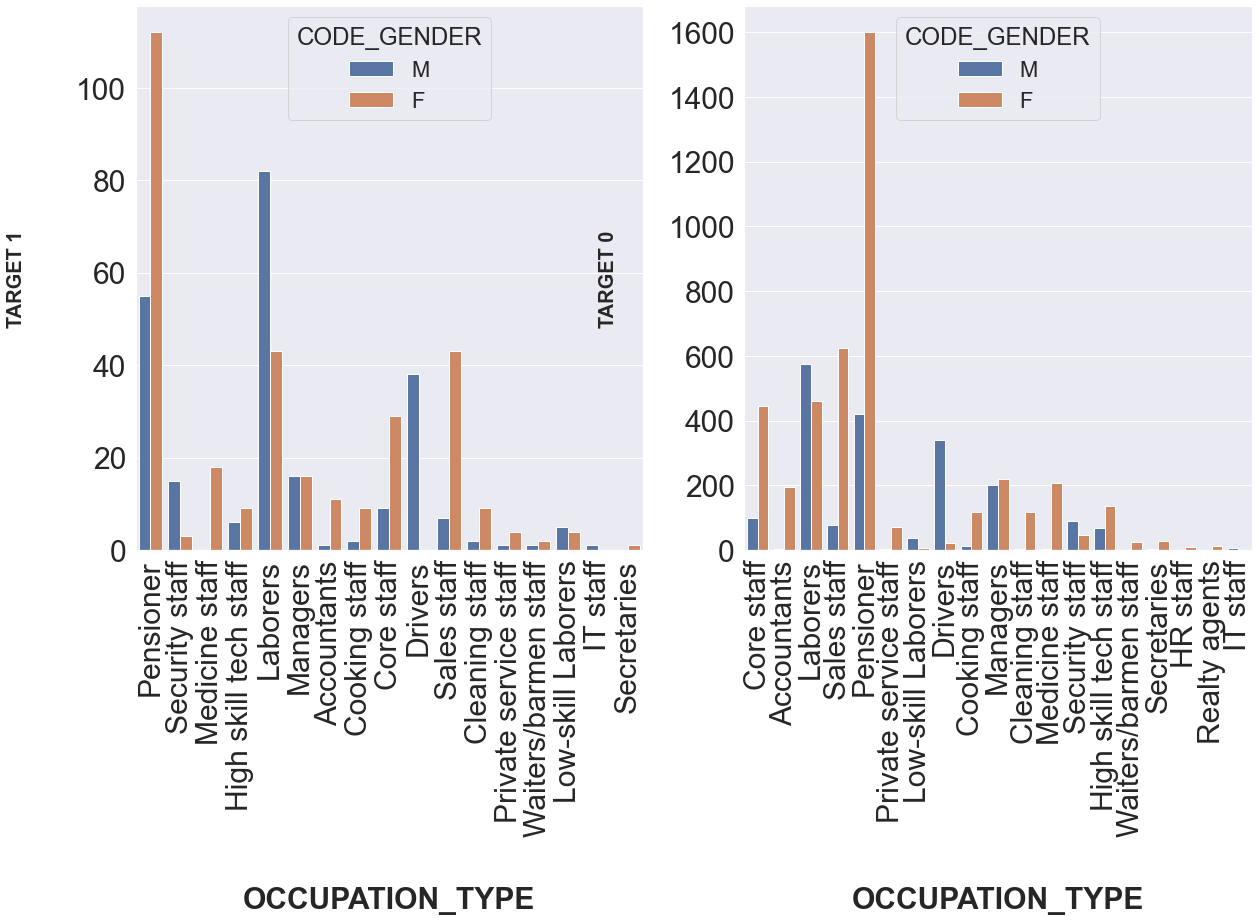

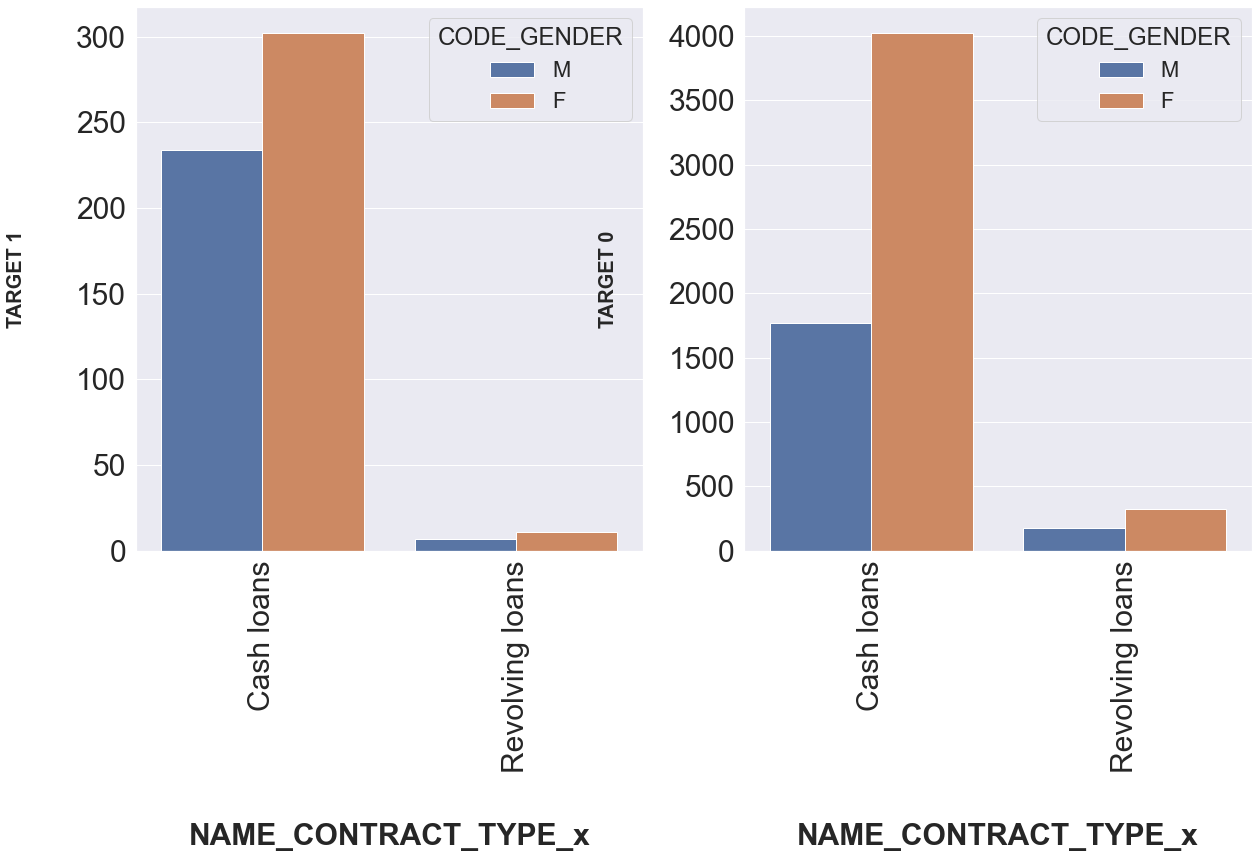

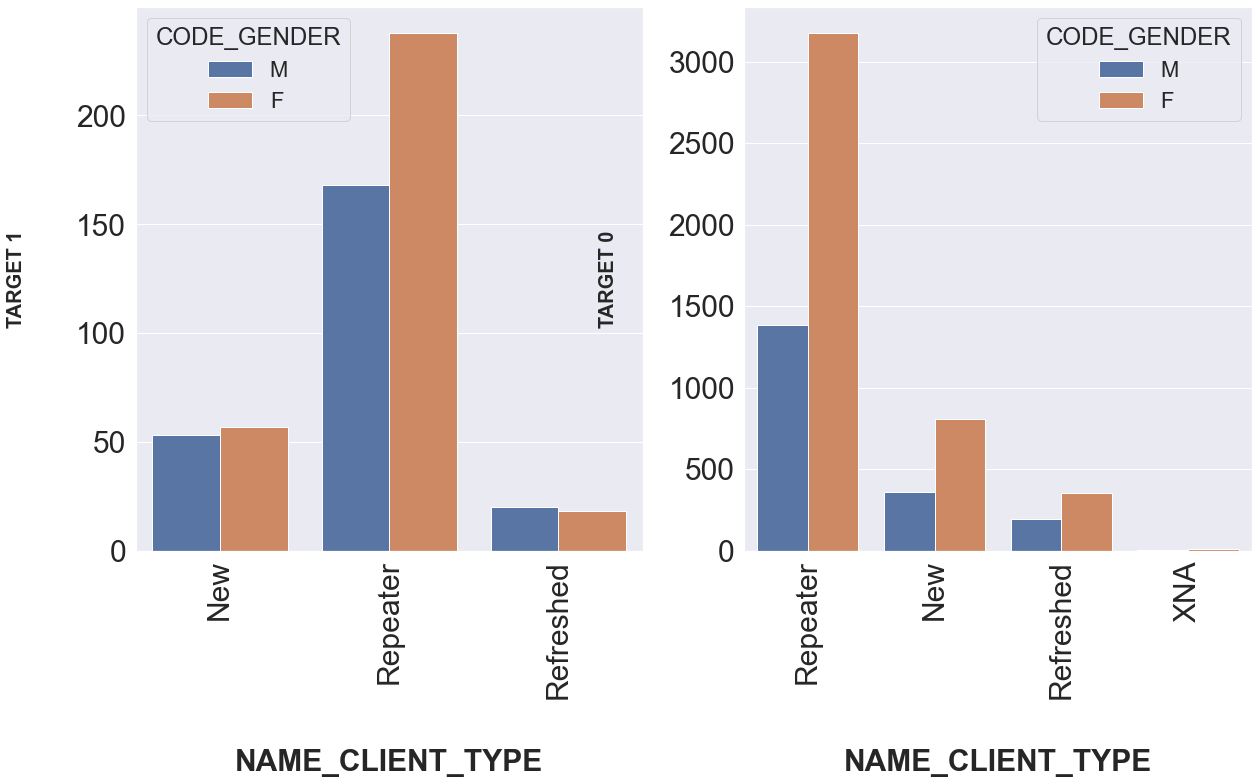

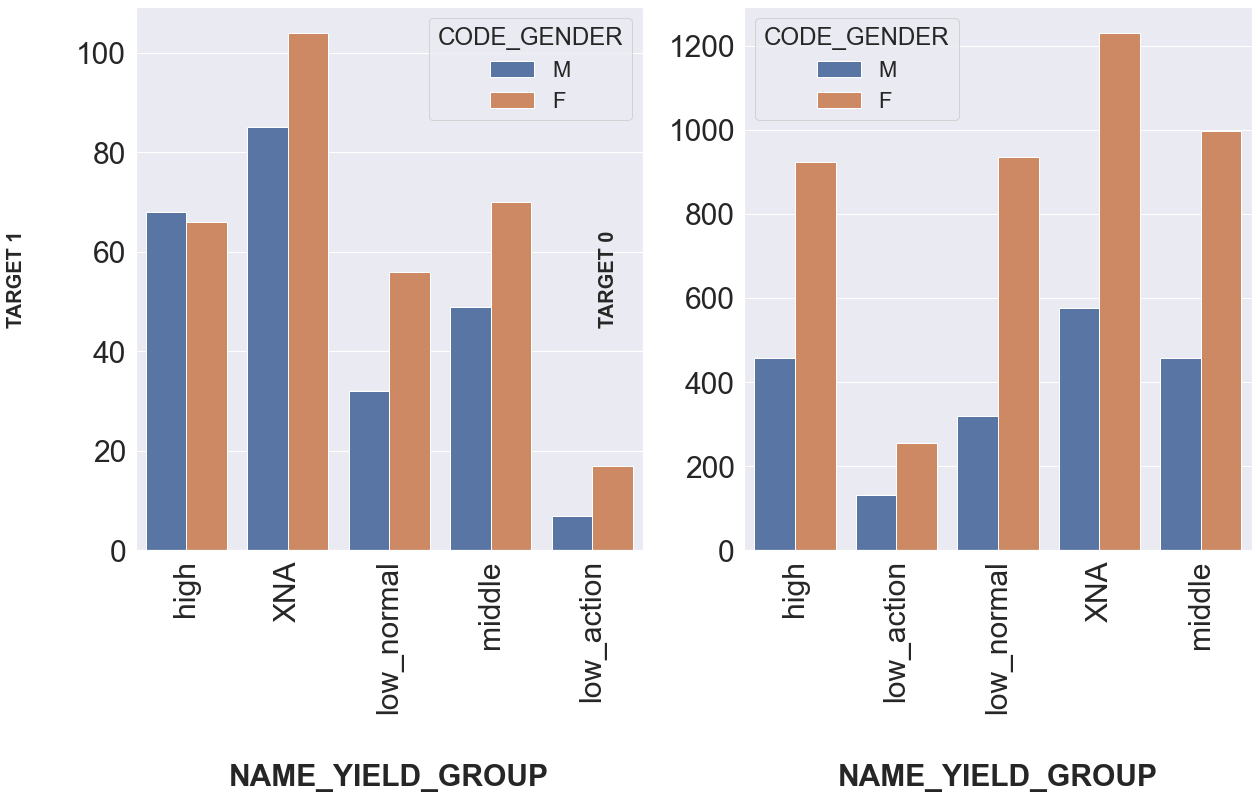

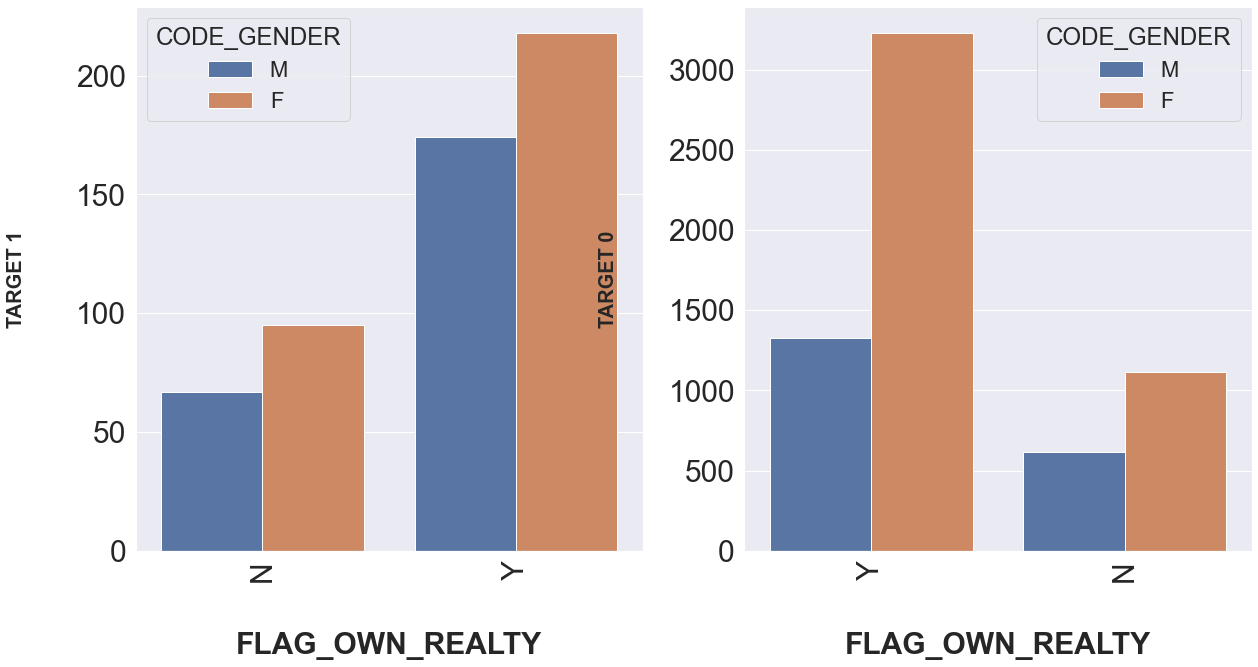

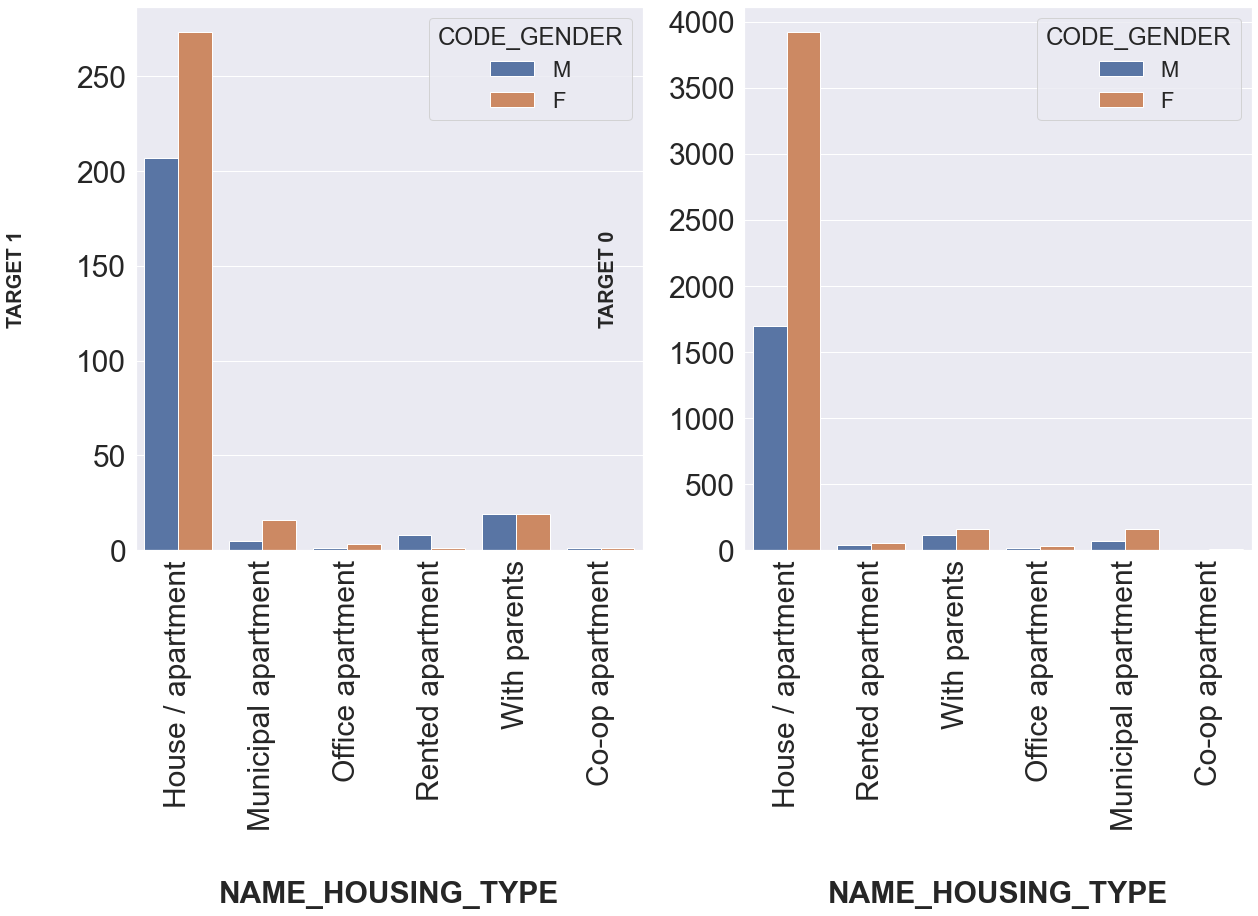

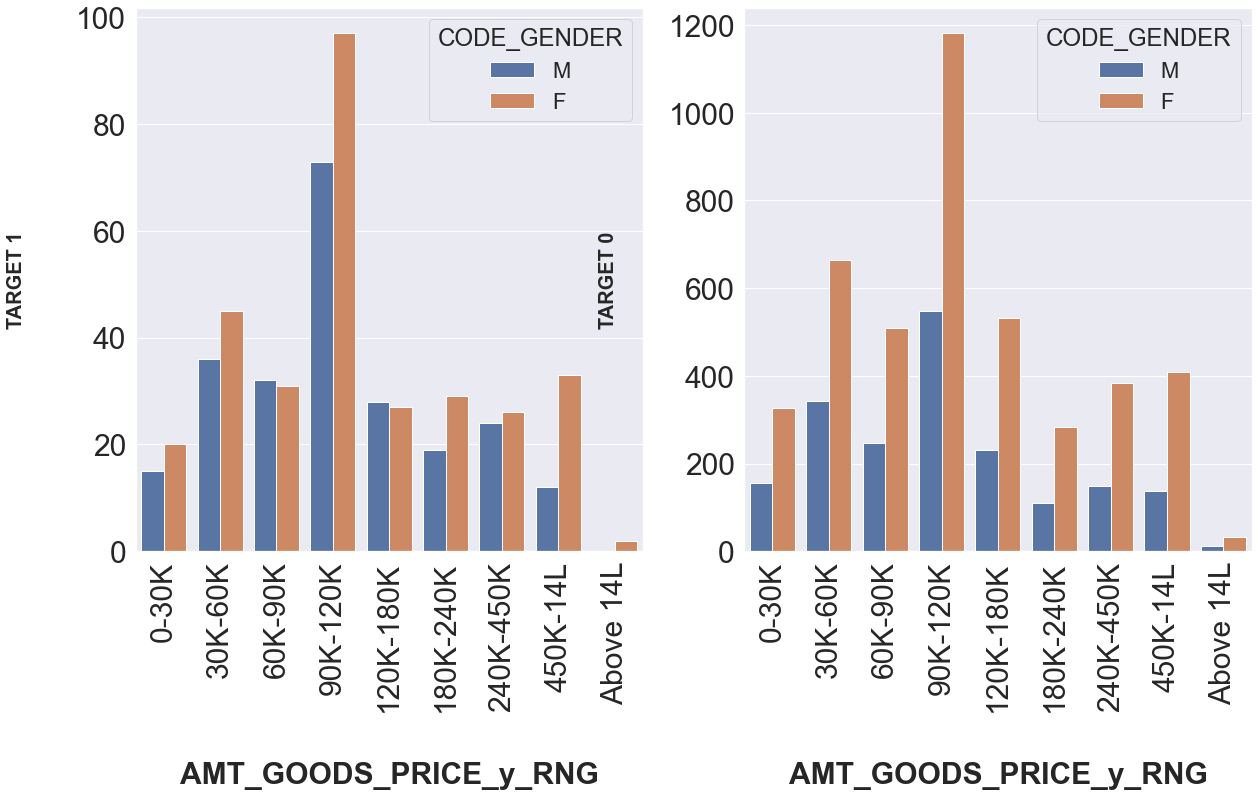

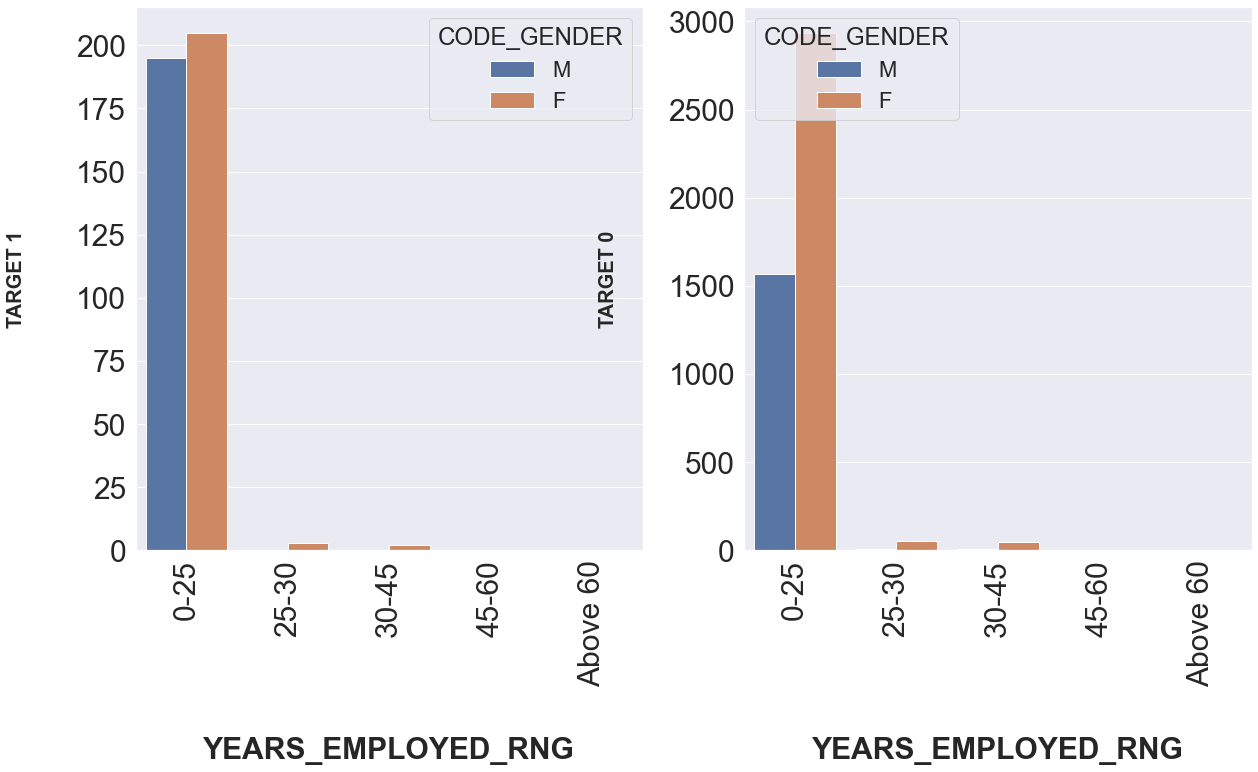

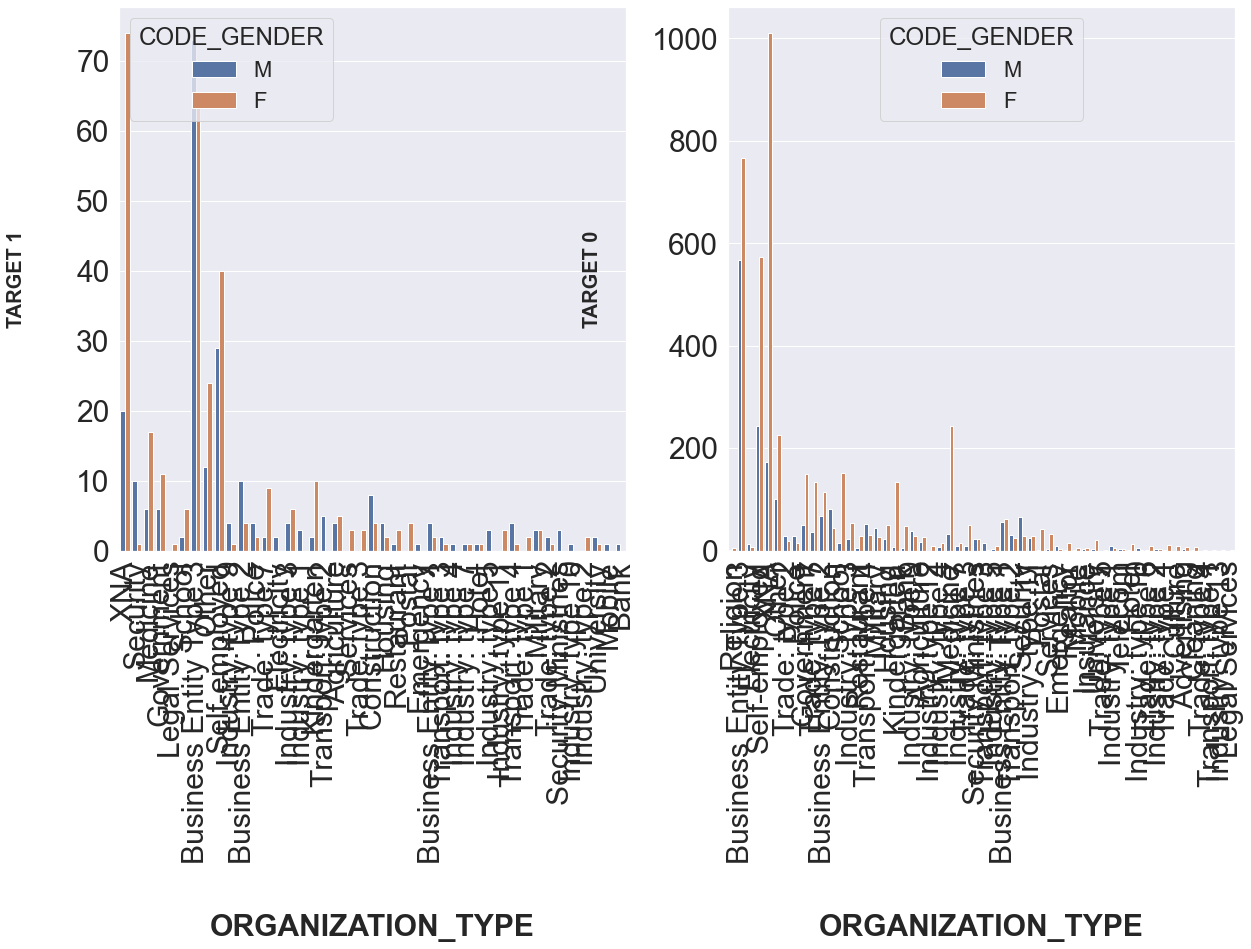

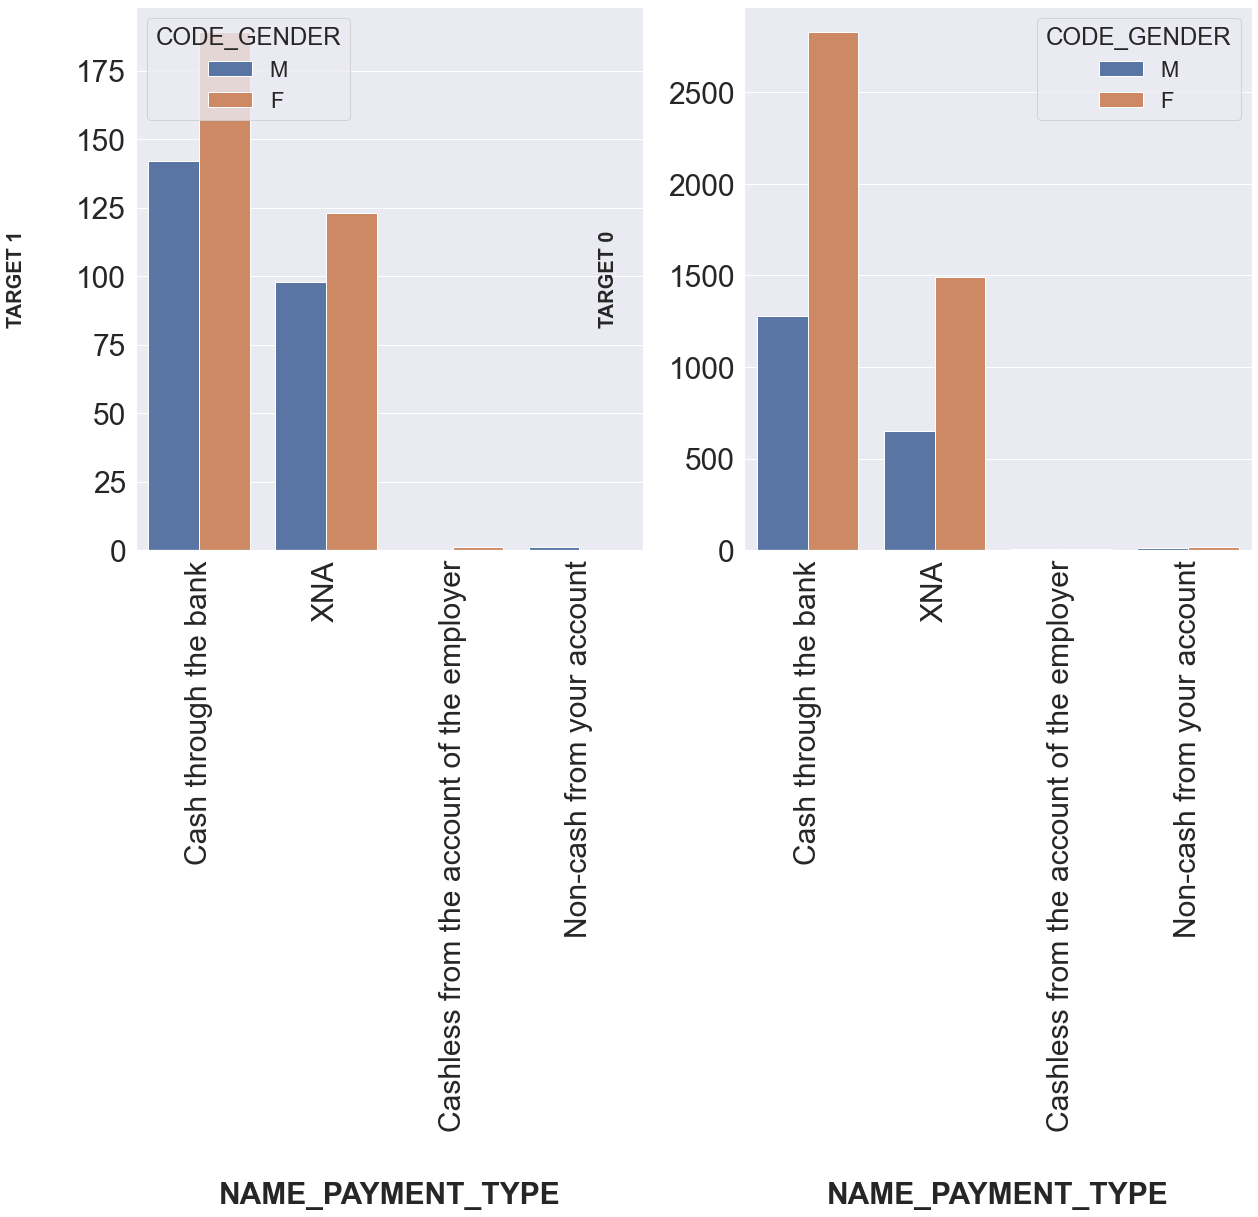

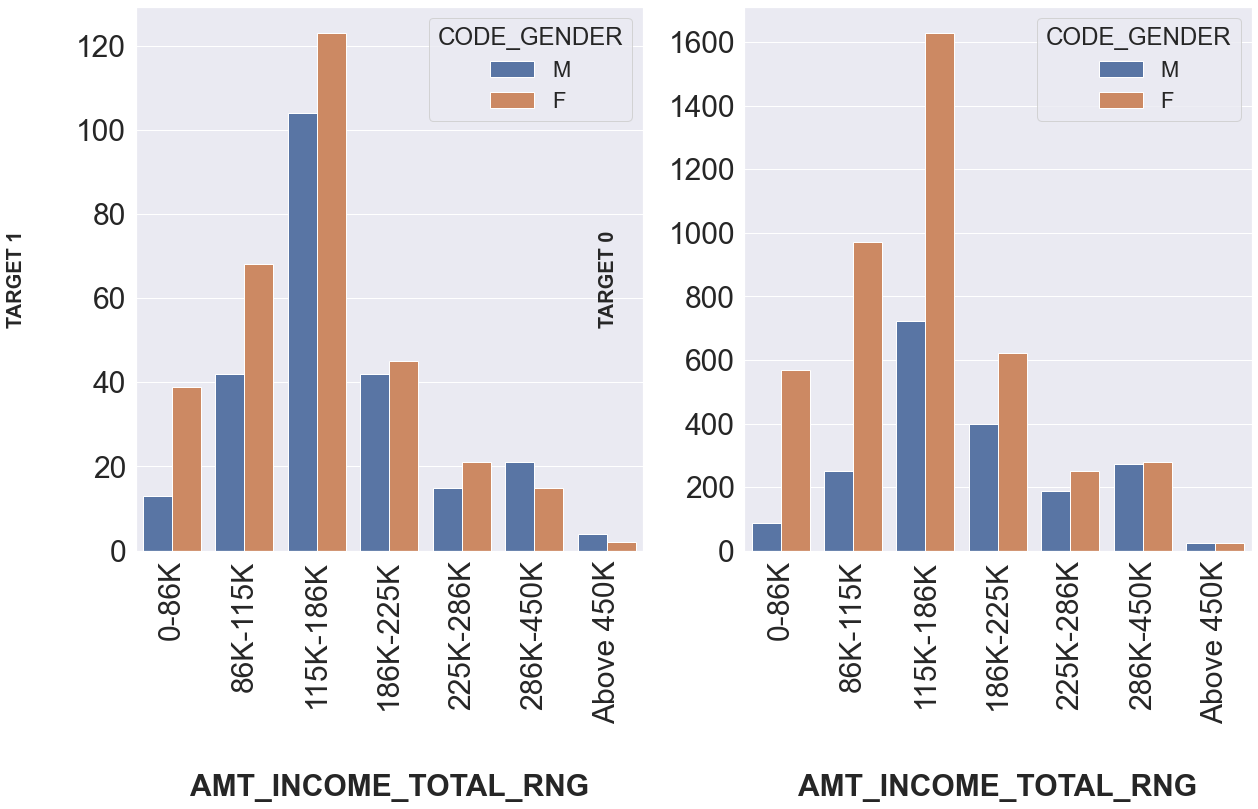

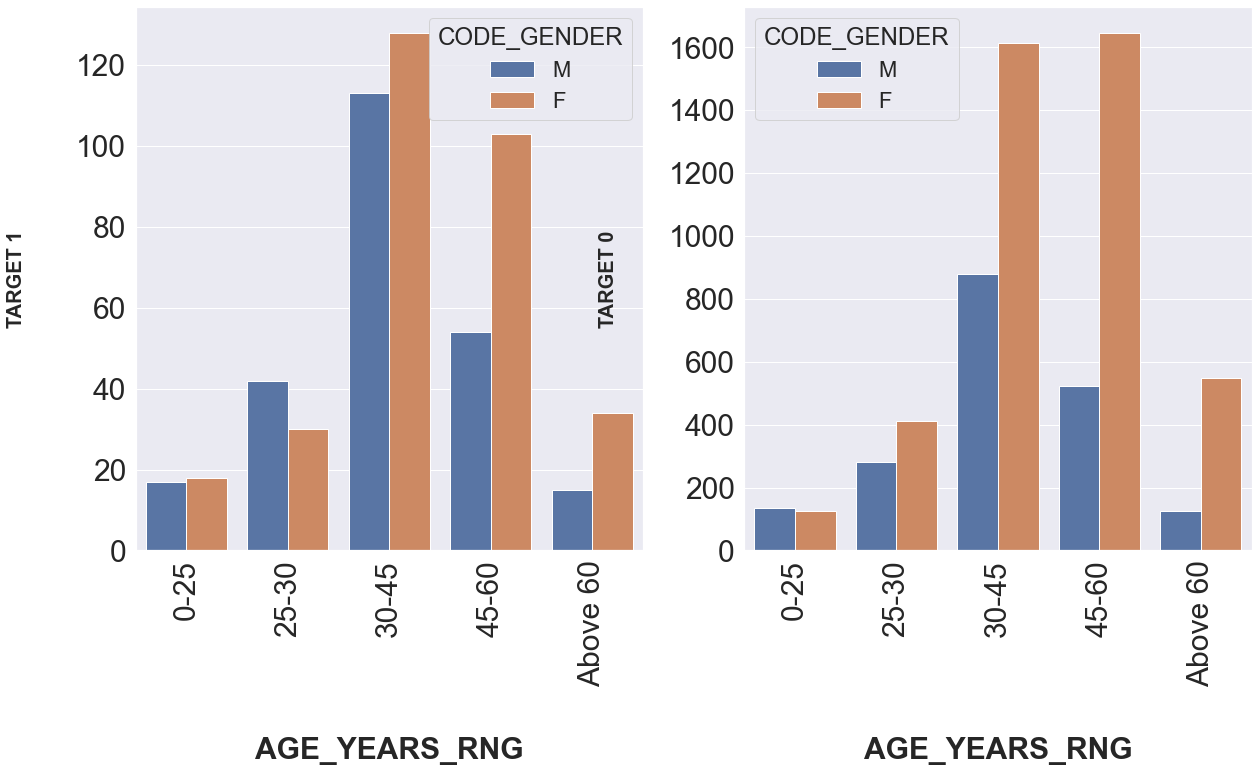

In [71]:
for i in object_dt:
    bivar_plot(i)

In [72]:
#Top 10 Correlation

In [73]:
#divide the dataset based on target variable to seperately analyse clients with payment difficulties and all other cases
target0=dfmerg[dfmerg.TARGET==0]
target1=dfmerg[dfmerg.TARGET==1]
print(target0.shape)
print(target1.shape)

(6287, 46)
(554, 46)


In [74]:
num_col=set(dfmerg.describe().columns)
num_dt=list(num_col)
num_dt.remove('index')
num_dt.remove('SK_ID_CURR')
num_dt

['AMT_INCOME_TOTAL',
 'AMT_GOODS_PRICE_x',
 'AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AGE_YEARS',
 'CNT_FAM_MEMBERS',
 'CNT_PAYMENT',
 'AMT_CREDIT_y',
 'YEARS_EMPLOYED',
 'AMT_GOODS_PRICE_y',
 'AMT_CREDIT_x',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'TARGET',
 'AMT_ANNUITY_x',
 'CNT_CHILDREN']

In [75]:
num_cols=['TARGET','AMT_GOODS_PRICE_x','AMT_GOODS_PRICE_y', 'AMT_ANNUITY_x','AMT_ANNUITY_y', 'AMT_CREDIT_x','AMT_CREDIT_y',
          'AMT_INCOME_TOTAL','AMT_APPLICATION','CNT_PAYMENT','CNT_CHILDREN','CNT_FAM_MEMBERS','YEARS_EMPLOYED','AGE_YEARS'
 ]

In [76]:
len(num_cols)

14

In [80]:
corr0=dfmerg.iloc[0:,2:]
corr1=dfmerg.iloc[0:,2:]

t0=corr0.corr(method='spearman')   # t0 - Corelations distibuted according rank wise for target 0
t1=corr1.corr(method='spearman')   # t1 - Corelations distibuted according rank wise for target 1

In [81]:
def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    
    mask= np.zeros_like(data)
    mask[np.triu_indices_from(mask)]=False
    with sns.axes_style("dark"):
        ax= sns.heatmap(data, mask=mask,cmap='RdYlGn')           

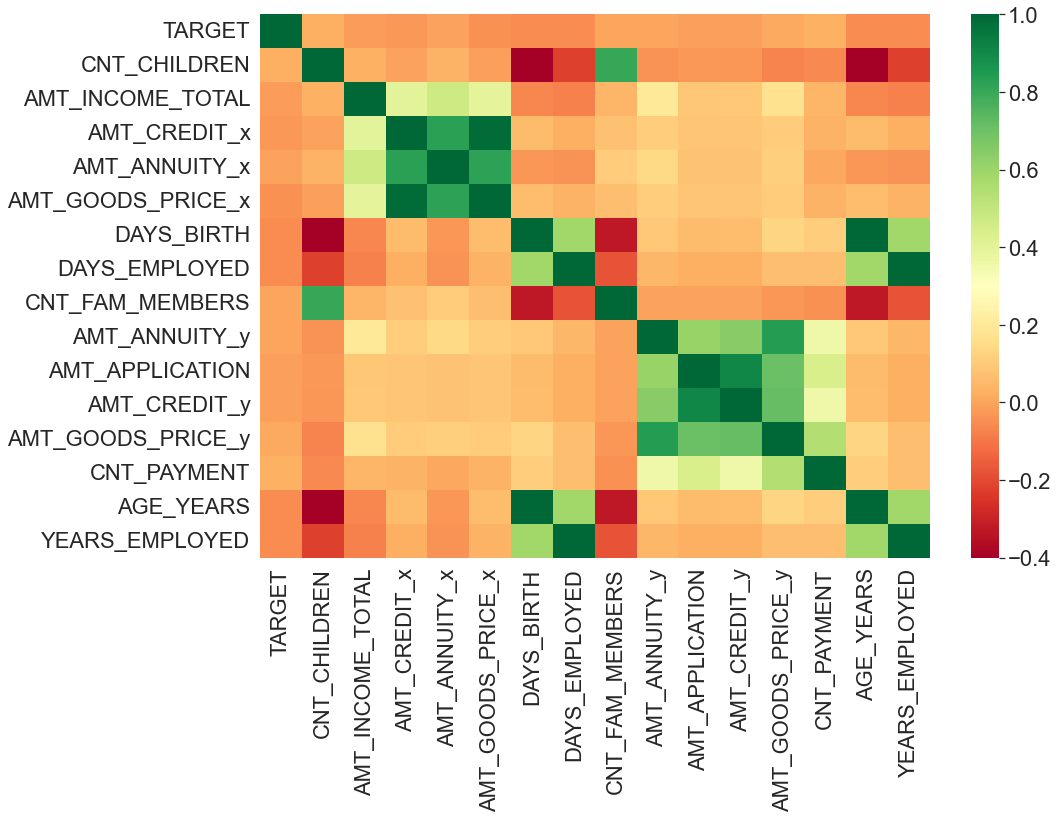

In [82]:
targets_corr(data=t0,title='Correlation for Target 0')

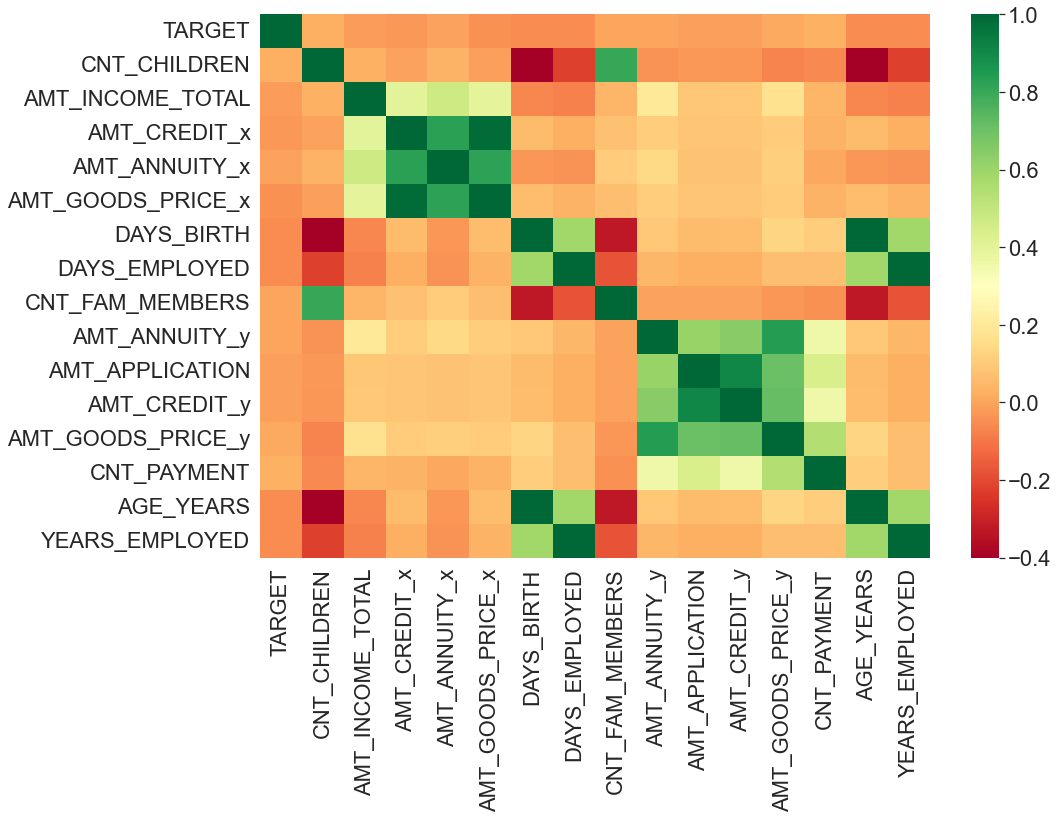

In [83]:
targets_corr(data=t1,title='Correlation for Target 1')

In [84]:
#TARGET 0
target0=target0[['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'AMT_GOODS_PRICE_x_RNG',
       'AMT_GOODS_PRICE_y_RNG', 'AMT_CREDIT_x_RNG', 'AMT_CREDIT_y_RNG',
       'AMT_ANNUITY_x_RNG', 'AMT_ANNUITY_y_RNG', 'AMT_INCOME_TOTAL_RNG',
       'AMT_APPLICATION_RNG', 'AGE_YEARS', 'YEARS_EMPLOYED', 'AGE_YEARS_RNG',
       'YEARS_EMPLOYED_RNG']]
Columns=target0.columns
Columns

Index(['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y',
       'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'AMT_GOODS_PRICE_x_RNG',
       'AMT_GOODS_PRICE_y_RNG', 'AMT_CREDIT_x_RNG', 'AMT_CREDIT_y_RNG',
       'AMT_ANNUITY_x_RNG', 'AMT_ANNUITY_y_RNG', 'AMT_INCOME_TOTAL_RNG',
       'AMT_APPLICATION_RNG', 'AGE_YEARS', 'YEARS_EMPLOYED', 'AGE_YEARS_RNG',
       'YEARS_EMPLOYED_RNG'],
      dtype='object')

In [85]:
Columns=target0.columns  #Collecting all Columns of Target0 

corr=target0[Columns].corr(method = 'pearson')                        # Finding correlations using corr() func.

corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

top10_corr0=corr.unstack().reset_index() # Top 10 Correlations

In [86]:
top10_corr0.columns = ['VAR1','VAR2','CORRELATION']  # dividing Correlated variables to Columns "var1" & "Var2"

top10_corr0.dropna(subset=['CORRELATION'],inplace=True)

top10_corr0['CORR_ABS']=top10_corr0['CORRELATION'].abs()

top10_corr0.sort_values('CORR_ABS', ascending=False).head(10)

VAR1             VAR2  CORRELATION  CORR_ABS
247     YEARS_EMPLOYED    DAYS_EMPLOYED     1.000000  1.000000
230          AGE_YEARS       DAYS_BIRTH     0.999702  0.999702
202  AMT_GOODS_PRICE_y  AMT_APPLICATION     0.989047  0.989047
83   AMT_GOODS_PRICE_x     AMT_CREDIT_x     0.986664  0.986664
186       AMT_CREDIT_y  AMT_APPLICATION     0.974410  0.974410
203  AMT_GOODS_PRICE_y     AMT_CREDIT_y     0.972064  0.972064
129    CNT_FAM_MEMBERS     CNT_CHILDREN     0.879420  0.879420
201  AMT_GOODS_PRICE_y    AMT_ANNUITY_y     0.828543  0.828543
185       AMT_CREDIT_y    AMT_ANNUITY_y     0.825461  0.825461
169    AMT_APPLICATION    AMT_ANNUITY_y     0.818092  0.818092

In [87]:
#TARGET 1

In [88]:
target1=target1[['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'CHANNEL_TYPE',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'AMT_GOODS_PRICE_x_RNG',
       'AMT_GOODS_PRICE_y_RNG', 'AMT_CREDIT_x_RNG', 'AMT_CREDIT_y_RNG',
       'AMT_ANNUITY_x_RNG', 'AMT_ANNUITY_y_RNG', 'AMT_INCOME_TOTAL_RNG',
       'AMT_APPLICATION_RNG', 'AGE_YEARS', 'YEARS_EMPLOYED', 'AGE_YEARS_RNG',
       'YEARS_EMPLOYED_RNG']]

In [89]:
Columns=target1.columns   #Collecting all Columns of Target0 

corr1=target1[Columns].corr(method = 'pearson')
corr1=corr1.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))             # Finding correlations using corr() func


top10_corr1=corr1.unstack().reset_index()   # Top 10 Correlations   

In [90]:
top10_corr1.columns = ['VAR1','VAR2','CORRELATION']     # dividing Correlated variables to Columns "var1" & "Var2"

top10_corr1.dropna(subset=['CORRELATION'],inplace=True)

top10_corr1['CORR_ABS']=top10_corr0['CORRELATION'].abs()

top10_corr1.sort_values('CORR_ABS', ascending=False).head(10)


VAR1             VAR2  CORRELATION  CORR_ABS
247     YEARS_EMPLOYED    DAYS_EMPLOYED     1.000000  1.000000
230          AGE_YEARS       DAYS_BIRTH     0.999708  0.999702
202  AMT_GOODS_PRICE_y  AMT_APPLICATION     0.986720  0.989047
83   AMT_GOODS_PRICE_x     AMT_CREDIT_x     0.979949  0.986664
186       AMT_CREDIT_y  AMT_APPLICATION     0.973956  0.974410
203  AMT_GOODS_PRICE_y     AMT_CREDIT_y     0.966819  0.972064
129    CNT_FAM_MEMBERS     CNT_CHILDREN     0.885949  0.879420
201  AMT_GOODS_PRICE_y    AMT_ANNUITY_y     0.795789  0.828543
185       AMT_CREDIT_y    AMT_ANNUITY_y     0.789420  0.825461
169    AMT_APPLICATION    AMT_ANNUITY_y     0.780680  0.818092